In [1]:
#import Regression_variables from same directory
from regression_variable_morgan_comparison import *
from sklearn.model_selection import cross_val_score
from optuna.samplers import TPESampler

# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

# compounds is the name of the data frame

/home/alex/miniforge3/envs/my-rdkit-env-covid/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-05 11:48:50.287634: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-05 11:48:50.318146: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



Assign cluster ID

Assign cluster ID


  0%|          | 0/595 [00:00<?, ?it/s][11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPRECATION WARNING: please use MorganGenerator
[11:49:07] DEPREC

# Comparing maccs vs morgan2 as our compound representation #

### Using Maccs ###

In [2]:
rfr_rand = RandomForestRegressor(random_state=SEED)
rfr_strat = RandomForestRegressor(random_state=SEED)
rfr_hi = RandomForestRegressor(random_state=SEED)
rfr_noise = RandomForestRegressor(random_state=SEED)
rfr_fur = RandomForestRegressor(random_state=SEED)

rfr_rand.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)
rfr_strat.fit(np.array(list((x_train_strat))).astype(float), y_train_strat)
rfr_hi.fit(np.array(list((x_train_hi))).astype(float), y_train_hi)
rfr_noise.fit(np.array(list((x_train_noise))).astype(float), y_train_noise)
rfr_fur.fit(np.array(list((x_train_fur))).astype(float), y_train_fur)

y_pred_rfr_rand = rfr_rand.predict(np.array(list((x_test_rand))).astype(float))
y_pred_rfr_strat = rfr_strat.predict(np.array(list((x_test_strat))).astype(float))
y_pred_rfr_hi = rfr_hi.predict(np.array(list((x_test_hi))).astype(float))
y_pred_rfr_noise = rfr_noise.predict(np.array(list((x_test_noise))).astype(float))
y_pred_rfr_fur = rfr_fur.predict(np.array(list((x_test_fur))).astype(float))

mae_rfr_rand = mean_absolute_error(y_test_rand, y_pred_rfr_rand)
mse_rfr_rand = mean_squared_error(y_test_rand, y_pred_rfr_rand)
r2_rfr_rand = r2_score(y_test_rand, y_pred_rfr_rand)

mae_rfr_strat = mean_absolute_error(y_test_strat, y_pred_rfr_strat)
mse_rfr_strat = mean_squared_error(y_test_strat, y_pred_rfr_strat)
r2_rfr_strat = r2_score(y_test_strat, y_pred_rfr_strat)

mae_rfr_hi = mean_absolute_error(y_test_hi, y_pred_rfr_hi)
mse_rfr_hi = mean_squared_error(y_test_hi, y_pred_rfr_hi)
r2_rfr_hi = r2_score(y_test_hi, y_pred_rfr_hi)

mae_rfr_noise = mean_absolute_error(y_test_noise, y_pred_rfr_noise)
mse_rfr_noise = mean_squared_error(y_test_noise, y_pred_rfr_noise)
r2_rfr_noise = r2_score(y_test_noise, y_pred_rfr_noise)

mae_rfr_fur = mean_absolute_error(y_test_fur, y_pred_rfr_fur)
mse_rfr_fur = mean_squared_error(y_test_fur, y_pred_rfr_fur)
r2_rfr_fur = r2_score(y_test_fur, y_pred_rfr_fur)

### Using morgan2 ###

In [3]:
rfr_rand_m2 = RandomForestRegressor(random_state=SEED)
rfr_strat_m2 = RandomForestRegressor(random_state=SEED)
rfr_hi_m2 = RandomForestRegressor(random_state=SEED)
rfr_noise_m2 = RandomForestRegressor(random_state=SEED)
rfr_fur_m2 = RandomForestRegressor(random_state=SEED)

rfr_rand_m2.fit(np.array(list((x_train_rand_m2))).astype(float), y_train_rand_m2)
rfr_strat_m2.fit(np.array(list((x_train_strat_m2))).astype(float), y_train_strat_m2)
rfr_hi_m2.fit(np.array(list((x_train_hi_m2))).astype(float), y_train_hi_m2)
rfr_noise_m2.fit(np.array(list((x_train_noise_m2))).astype(float), y_train_noise_m2)
rfr_fur_m2.fit(np.array(list((x_train_fur_m2))).astype(float), y_train_fur_m2)

y_pred_rfr_rand_m2 = rfr_rand_m2.predict(np.array(list((x_test_rand_m2))).astype(float))
y_pred_rfr_strat_m2 = rfr_strat_m2.predict(np.array(list((x_test_strat_m2))).astype(float))
y_pred_rfr_hi_m2 = rfr_hi_m2.predict(np.array(list((x_test_hi_m2))).astype(float))
y_pred_rfr_noise_m2 = rfr_noise_m2.predict(np.array(list((x_test_noise_m2))).astype(float))
y_pred_rfr_fur_m2 = rfr_fur_m2.predict(np.array(list((x_test_fur_m2))).astype(float))

mae_rfr_rand_m2 = mean_absolute_error(y_test_rand_m2, y_pred_rfr_rand_m2)
mse_rfr_rand_m2 = mean_squared_error(y_test_rand_m2, y_pred_rfr_rand_m2)
r2_rfr_rand_m2 = r2_score(y_test_rand_m2, y_pred_rfr_rand_m2)

mae_rfr_strat_m2 = mean_absolute_error(y_test_strat_m2, y_pred_rfr_strat_m2)
mse_rfr_strat_m2 = mean_squared_error(y_test_strat_m2, y_pred_rfr_strat_m2)
r2_rfr_strat_m2 = r2_score(y_test_strat_m2, y_pred_rfr_strat_m2)

mae_rfr_hi_m2 = mean_absolute_error(y_test_hi_m2, y_pred_rfr_hi_m2)
mse_rfr_hi_m2 = mean_squared_error(y_test_hi_m2, y_pred_rfr_hi_m2)
r2_rfr_hi_m2 = r2_score(y_test_hi_m2, y_pred_rfr_hi_m2)

mae_rfr_noise_m2 = mean_absolute_error(y_test_noise_m2, y_pred_rfr_noise_m2)
mse_rfr_noise_m2 = mean_squared_error(y_test_noise_m2, y_pred_rfr_noise_m2)
r2_rfr_noise_m2 = r2_score(y_test_noise_m2, y_pred_rfr_noise_m2)

mae_rfr_fur_m2 = mean_absolute_error(y_test_fur_m2, y_pred_rfr_fur_m2)
mse_rfr_fur_m2 = mean_squared_error(y_test_fur_m2, y_pred_rfr_fur_m2)
r2_rfr_fur_m2 = r2_score(y_test_fur_m2, y_pred_rfr_fur_m2)

In [4]:
#Create a table that shows the performance of the random forest regressor on the different splits displaying mae, mse and r2 values
#display and save variable values to 3sf

split_scores_rfr_initial_maccs_vs_morgan2 = {'Split': ['Random', 'Stratified pIC50', 'Hierarchical Clustering', 'UMAP Noise', 'UMAP Furthest Cluster'],
        'maccs MAE': [mae_rfr_rand, mae_rfr_strat, mae_rfr_hi, mae_rfr_noise, mae_rfr_fur],
        'maccs MSE': [mse_rfr_rand, mse_rfr_strat, mse_rfr_hi, mse_rfr_noise, mse_rfr_fur],
        'maccs R2': [r2_rfr_rand, r2_rfr_strat, r2_rfr_hi, r2_rfr_noise, r2_rfr_fur],
        'morgan2 MAE': [mae_rfr_rand_m2, mae_rfr_strat_m2, mae_rfr_hi_m2, mae_rfr_noise_m2, mae_rfr_fur_m2],
        'morgan2 MSE': [mse_rfr_rand_m2, mse_rfr_strat_m2, mse_rfr_hi_m2, mse_rfr_noise_m2, mse_rfr_fur_m2],
        'morgan2 R2': [r2_rfr_rand_m2, r2_rfr_strat_m2, r2_rfr_hi_m2, r2_rfr_noise_m2, r2_rfr_fur_m2]}

split_scores_rfr_initial_maccs_vs_morgan2_df = pd.DataFrame(split_scores_rfr_initial_maccs_vs_morgan2)
split_scores_rfr_initial_maccs_vs_morgan2_df.set_index("Split", inplace=True)
# Round the values to 3 significant figures
split_scores_rfr_initial_maccs_vs_morgan2_df = split_scores_rfr_initial_maccs_vs_morgan2_df.applymap(lambda x: round(x, 3))
#save df to csv in data file
split_scores_rfr_initial_maccs_vs_morgan2_df.to_csv(DATA / "split_scores_rfr_initial_maccs_vs_morgan2.csv")
print(split_scores_rfr_initial_maccs_vs_morgan2_df)

                         maccs MAE  maccs MSE  maccs R2  morgan2 MAE  \
Split                                                                  
Random                       0.383      0.309     0.580        0.328   
Stratified pIC50             0.462      0.423     0.517        0.320   
Hierarchical Clustering      0.675      0.705     0.324        0.650   
UMAP Noise                   0.737      0.772    -0.040        0.735   
UMAP Furthest Cluster        0.708      0.696     0.061        0.691   

                         morgan2 MSE  morgan2 R2  
Split                                             
Random                         0.252       0.657  
Stratified pIC50               0.247       0.706  
Hierarchical Clustering        0.835       0.200  
UMAP Noise                     0.948      -0.239  
UMAP Furthest Cluster          0.911      -0.201  


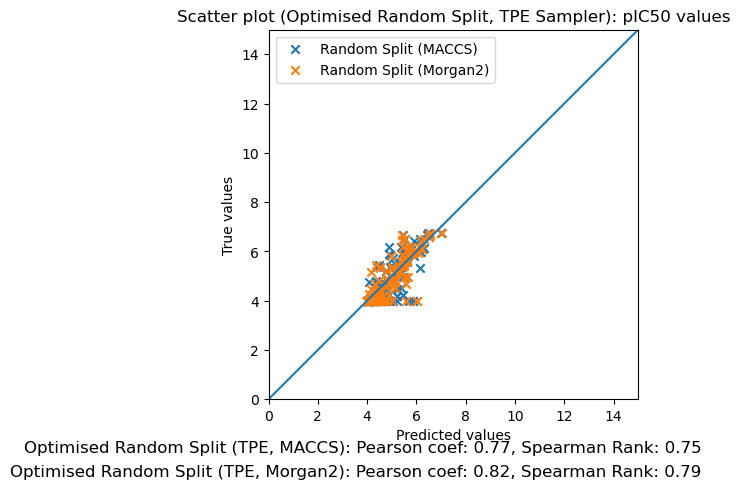

In [20]:
# Scatter plot
limits = 0, 15
fig, ax = plt.subplots()
ax.scatter(y_pred_rfr_rand, y_test_rand, marker="x", label="Random Split (MACCS)")
ax.scatter(y_pred_rfr_rand_m2, y_test_rand_m2, marker="x", label="Random Split (Morgan2)")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot (Optimised Random Split, TPE Sampler): pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)

pearsoncoef_rfr_rand_MACCS = np.corrcoef(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand_MACCS = spearmanr(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand_m2 = np.corrcoef(y_pred_rfr_rand_m2.flatten(), y_test_rand_m2.values.flatten())[0,1]
spearmancoef_rfr_rand_m2 = spearmanr(y_pred_rfr_rand_m2.flatten(), y_test_rand_m2.values.flatten()).correlation
fig.text(0.9, 0, f"Optimised Random Split (TPE, MACCS): Pearson coef: {pearsoncoef_rfr_rand_MACCS:.2f}, Spearman Rank: {spearmancoef_rfr_rand_MACCS:.2f}", horizontalalignment='right', fontsize=12)
fig.text(0.9, -0.05, f"Optimised Random Split (TPE, Morgan2): Pearson coef: {pearsoncoef_rfr_rand_m2:.2f}, Spearman Rank: {spearmancoef_rfr_rand_m2:.2f}", horizontalalignment='right', fontsize=12)

fig.savefig(DATA / "scatter_plot_rfr_rand.png")
ax.legend()
plt.show();

## Hyper-parameter tuning for random split ##

In [21]:
study_name_TPE_m2 = "random_forest_study_TPE_m2_v2"  # Unique identifier of the study
storage_name_TPE_m2 = f"sqlite:///example_TPE_m2.db"  # SQLite database URL

study_rand_TPE_m2 = optuna.create_study(study_name=study_name_TPE_m2, storage=storage_name_TPE_m2, load_if_exists=True)

[I 2024-08-05 12:10:45,881] A new study created in RDB with name: random_forest_study_TPE_m2_v2


In [22]:
def objective(trial, X_train, y_train):
    n_estimators = trial.suggest_int("n_estimators", 50, 750)
    max_depth = trial.suggest_int("max_depth", 4, 8)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    return score

In [23]:
def save_best_trial(study, trial):
    if study.best_trial == trial:
        print(f"New best trial found: {trial.number}")
        print(f"Value: {trial.value}")
        print(f"Params: {trial.params}")


In [24]:
study_rand_TPE_m2.optimize(lambda trial: objective(trial, np.array(list(x_train_rand_m2)).astype(float), y_train_rand_m2), 
                    n_trials=1500, 
                    show_progress_bar=True, 
                    callbacks=[save_best_trial])

Best trial: 0. Best value: -0.430831:   0%|          | 1/1500 [00:07<3:09:47,  7.60s/it]

[I 2024-08-05 12:11:09,571] Trial 0 finished with value: -0.4308307436902591 and parameters: {'n_estimators': 369, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: -0.4308307436902591.
New best trial found: 0
Value: -0.4308307436902591
Params: {'n_estimators': 369, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 3}


Best trial: 1. Best value: -0.495203:   0%|          | 2/1500 [00:10<1:55:11,  4.61s/it]

[I 2024-08-05 12:11:12,099] Trial 1 finished with value: -0.49520260279395395 and parameters: {'n_estimators': 140, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 1 with value: -0.49520260279395395.
New best trial found: 1
Value: -0.49520260279395395
Params: {'n_estimators': 140, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 1}


Best trial: 1. Best value: -0.495203:   0%|          | 3/1500 [00:12<1:25:25,  3.42s/it]

[I 2024-08-05 12:11:14,106] Trial 2 finished with value: -0.4298404851363844 and parameters: {'n_estimators': 70, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 1 with value: -0.49520260279395395.


Best trial: 1. Best value: -0.495203:   0%|          | 4/1500 [00:20<2:11:42,  5.28s/it]

[I 2024-08-05 12:11:22,238] Trial 3 finished with value: -0.4677120473472103 and parameters: {'n_estimators': 523, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 1 with value: -0.49520260279395395.


Best trial: 4. Best value: -0.54194:   0%|          | 5/1500 [00:21<1:35:53,  3.85s/it] 

[I 2024-08-05 12:11:23,542] Trial 4 finished with value: -0.5419400021375498 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 4 with value: -0.5419400021375498.
New best trial found: 4
Value: -0.5419400021375498
Params: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 10}


Best trial: 4. Best value: -0.54194:   0%|          | 6/1500 [00:24<1:28:54,  3.57s/it]

[I 2024-08-05 12:11:26,574] Trial 5 finished with value: -0.494254192402961 and parameters: {'n_estimators': 217, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 7}. Best is trial 4 with value: -0.5419400021375498.


Best trial: 4. Best value: -0.54194:   0%|          | 7/1500 [00:30<1:48:08,  4.35s/it]

[I 2024-08-05 12:11:32,519] Trial 6 finished with value: -0.4503899073186899 and parameters: {'n_estimators': 372, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 4 with value: -0.5419400021375498.


Best trial: 4. Best value: -0.54194:   1%|          | 8/1500 [00:32<1:33:06,  3.74s/it]

[I 2024-08-05 12:11:34,972] Trial 7 finished with value: -0.4920131931617725 and parameters: {'n_estimators': 159, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 7}. Best is trial 4 with value: -0.5419400021375498.


Best trial: 4. Best value: -0.54194:   1%|          | 9/1500 [00:45<2:41:12,  6.49s/it]

[I 2024-08-05 12:11:47,490] Trial 8 finished with value: -0.4158603060769311 and parameters: {'n_estimators': 685, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 4 with value: -0.5419400021375498.


Best trial: 4. Best value: -0.54194:   1%|          | 10/1500 [00:55<3:11:18,  7.70s/it]

[I 2024-08-05 12:11:57,920] Trial 9 finished with value: -0.4880927399218681 and parameters: {'n_estimators': 686, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 8}. Best is trial 4 with value: -0.5419400021375498.


Best trial: 4. Best value: -0.54194:   1%|          | 11/1500 [00:59<2:40:51,  6.48s/it]

[I 2024-08-05 12:12:01,630] Trial 10 finished with value: -0.5416442140808528 and parameters: {'n_estimators': 286, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 4 with value: -0.5419400021375498.


Best trial: 4. Best value: -0.54194:   1%|          | 12/1500 [01:02<2:16:00,  5.48s/it]

[I 2024-08-05 12:12:04,834] Trial 11 finished with value: -0.5399279946162068 and parameters: {'n_estimators': 254, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 4 with value: -0.5419400021375498.


Best trial: 12. Best value: -0.543272:   1%|          | 13/1500 [01:06<2:01:00,  4.88s/it]

[I 2024-08-05 12:12:08,331] Trial 12 finished with value: -0.543271698543656 and parameters: {'n_estimators': 285, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 12 with value: -0.543271698543656.
New best trial found: 12
Value: -0.543271698543656
Params: {'n_estimators': 285, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 10}


Best trial: 12. Best value: -0.543272:   1%|          | 14/1500 [01:13<2:16:14,  5.50s/it]

[I 2024-08-05 12:12:15,262] Trial 13 finished with value: -0.5185490678051011 and parameters: {'n_estimators': 530, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 12 with value: -0.543271698543656.


Best trial: 12. Best value: -0.543272:   1%|          | 15/1500 [01:14<1:42:33,  4.14s/it]

[I 2024-08-05 12:12:16,260] Trial 14 finished with value: -0.504737821978406 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 12 with value: -0.543271698543656.


Best trial: 12. Best value: -0.543272:   1%|          | 16/1500 [01:20<1:56:08,  4.70s/it]

[I 2024-08-05 12:12:22,238] Trial 15 finished with value: -0.5055164271334478 and parameters: {'n_estimators': 457, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 12 with value: -0.543271698543656.


Best trial: 16. Best value: -0.544922:   1%|          | 17/1500 [01:23<1:48:06,  4.37s/it]

[I 2024-08-05 12:12:25,862] Trial 16 finished with value: -0.5449215739963058 and parameters: {'n_estimators': 298, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 16 with value: -0.5449215739963058.
New best trial found: 16
Value: -0.5449215739963058
Params: {'n_estimators': 298, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 10}


Best trial: 16. Best value: -0.544922:   1%|          | 18/1500 [01:28<1:50:02,  4.46s/it]

[I 2024-08-05 12:12:30,507] Trial 17 finished with value: -0.48625168464977575 and parameters: {'n_estimators': 306, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 6}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 16. Best value: -0.544922:   1%|▏         | 19/1500 [01:35<2:05:10,  5.07s/it]

[I 2024-08-05 12:12:37,013] Trial 18 finished with value: -0.5070228932947639 and parameters: {'n_estimators': 456, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 16. Best value: -0.544922:   1%|▏         | 20/1500 [01:37<1:45:14,  4.27s/it]

[I 2024-08-05 12:12:39,407] Trial 19 finished with value: -0.5346677408898 and parameters: {'n_estimators': 191, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 16. Best value: -0.544922:   1%|▏         | 21/1500 [01:43<1:55:04,  4.67s/it]

[I 2024-08-05 12:12:45,011] Trial 20 finished with value: -0.4460842403046731 and parameters: {'n_estimators': 329, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 16. Best value: -0.544922:   1%|▏         | 22/1500 [01:44<1:32:17,  3.75s/it]

[I 2024-08-05 12:12:46,609] Trial 21 finished with value: -0.541618010181027 and parameters: {'n_estimators': 116, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 16. Best value: -0.544922:   2%|▏         | 23/1500 [01:47<1:26:56,  3.53s/it]

[I 2024-08-05 12:12:49,640] Trial 22 finished with value: -0.5271491892373109 and parameters: {'n_estimators': 236, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 16. Best value: -0.544922:   2%|▏         | 24/1500 [01:53<1:43:26,  4.20s/it]

[I 2024-08-05 12:12:55,412] Trial 23 finished with value: -0.529482235971657 and parameters: {'n_estimators': 435, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 16. Best value: -0.544922:   2%|▏         | 25/1500 [01:59<2:00:42,  4.91s/it]

[I 2024-08-05 12:13:01,967] Trial 24 finished with value: -0.5350398931520747 and parameters: {'n_estimators': 553, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 16. Best value: -0.544922:   2%|▏         | 26/1500 [02:04<1:59:19,  4.86s/it]

[I 2024-08-05 12:13:06,704] Trial 25 finished with value: -0.4989611058829917 and parameters: {'n_estimators': 344, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 16. Best value: -0.544922:   2%|▏         | 27/1500 [02:08<1:50:16,  4.49s/it]

[I 2024-08-05 12:13:10,341] Trial 26 finished with value: -0.5441690335615642 and parameters: {'n_estimators': 273, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 16. Best value: -0.544922:   2%|▏         | 28/1500 [02:12<1:48:04,  4.41s/it]

[I 2024-08-05 12:13:14,543] Trial 27 finished with value: -0.5055136701268979 and parameters: {'n_estimators': 275, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 16. Best value: -0.544922:   2%|▏         | 29/1500 [02:17<1:53:44,  4.64s/it]

[I 2024-08-05 12:13:19,730] Trial 28 finished with value: -0.5378049257096849 and parameters: {'n_estimators': 402, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 16. Best value: -0.544922:   2%|▏         | 30/1500 [02:20<1:39:24,  4.06s/it]

[I 2024-08-05 12:13:22,429] Trial 29 finished with value: -0.5088063349083576 and parameters: {'n_estimators': 194, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 16. Best value: -0.544922:   2%|▏         | 31/1500 [02:26<1:52:29,  4.59s/it]

[I 2024-08-05 12:13:28,277] Trial 30 finished with value: -0.5147463888378551 and parameters: {'n_estimators': 381, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 16. Best value: -0.544922:   2%|▏         | 32/1500 [02:30<1:48:30,  4.44s/it]

[I 2024-08-05 12:13:32,342] Trial 31 finished with value: -0.5413241607104426 and parameters: {'n_estimators': 304, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 16. Best value: -0.544922:   2%|▏         | 33/1500 [02:32<1:29:46,  3.67s/it]

[I 2024-08-05 12:13:34,230] Trial 32 finished with value: -0.5344008488082939 and parameters: {'n_estimators': 129, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 16 with value: -0.5449215739963058.


Best trial: 33. Best value: -0.545848:   2%|▏         | 34/1500 [02:33<1:13:42,  3.02s/it]

[I 2024-08-05 12:13:35,719] Trial 33 finished with value: -0.5458478621144194 and parameters: {'n_estimators': 105, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 33 with value: -0.5458478621144194.
New best trial found: 33
Value: -0.5458478621144194
Params: {'n_estimators': 105, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 10}


Best trial: 33. Best value: -0.545848:   2%|▏         | 35/1500 [02:36<1:10:17,  2.88s/it]

[I 2024-08-05 12:13:38,278] Trial 34 finished with value: -0.5227935824175064 and parameters: {'n_estimators': 168, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 33 with value: -0.5458478621144194.


Best trial: 33. Best value: -0.545848:   2%|▏         | 36/1500 [02:39<1:11:30,  2.93s/it]

[I 2024-08-05 12:13:41,330] Trial 35 finished with value: -0.5278629208756348 and parameters: {'n_estimators': 239, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 33 with value: -0.5458478621144194.


Best trial: 33. Best value: -0.545848:   2%|▏         | 37/1500 [02:41<1:02:46,  2.57s/it]

[I 2024-08-05 12:13:43,074] Trial 36 finished with value: -0.5185049175602603 and parameters: {'n_estimators': 108, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 33 with value: -0.5458478621144194.


Best trial: 33. Best value: -0.545848:   3%|▎         | 38/1500 [02:45<1:14:32,  3.06s/it]

[I 2024-08-05 12:13:47,263] Trial 37 finished with value: -0.4989575980103657 and parameters: {'n_estimators': 333, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 33 with value: -0.5458478621144194.


Best trial: 33. Best value: -0.545848:   3%|▎         | 39/1500 [02:48<1:13:46,  3.03s/it]

[I 2024-08-05 12:13:50,224] Trial 38 finished with value: -0.4960841603073137 and parameters: {'n_estimators': 203, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 33 with value: -0.5458478621144194.


Best trial: 33. Best value: -0.545848:   3%|▎         | 40/1500 [02:54<1:40:35,  4.13s/it]

[I 2024-08-05 12:13:56,932] Trial 39 finished with value: -0.5435155481915405 and parameters: {'n_estimators': 584, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 33 with value: -0.5458478621144194.


Best trial: 33. Best value: -0.545848:   3%|▎         | 41/1500 [03:02<2:07:44,  5.25s/it]

[I 2024-08-05 12:14:04,800] Trial 40 finished with value: -0.515509268585818 and parameters: {'n_estimators': 613, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 33 with value: -0.5458478621144194.


Best trial: 33. Best value: -0.545848:   3%|▎         | 42/1500 [03:10<2:22:07,  5.85s/it]

[I 2024-08-05 12:14:12,037] Trial 41 finished with value: -0.5444433885913151 and parameters: {'n_estimators': 635, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 33 with value: -0.5458478621144194.


Best trial: 33. Best value: -0.545848:   3%|▎         | 43/1500 [03:17<2:32:15,  6.27s/it]

[I 2024-08-05 12:14:19,292] Trial 42 finished with value: -0.5440657563925969 and parameters: {'n_estimators': 633, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 33 with value: -0.5458478621144194.


Best trial: 33. Best value: -0.545848:   3%|▎         | 44/1500 [03:24<2:38:23,  6.53s/it]

[I 2024-08-05 12:14:26,417] Trial 43 finished with value: -0.5453562241934519 and parameters: {'n_estimators': 618, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 33 with value: -0.5458478621144194.


Best trial: 33. Best value: -0.545848:   3%|▎         | 45/1500 [03:32<2:51:18,  7.06s/it]

[I 2024-08-05 12:14:34,735] Trial 44 finished with value: -0.5360721543213169 and parameters: {'n_estimators': 727, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 9}. Best is trial 33 with value: -0.5458478621144194.


Best trial: 33. Best value: -0.545848:   3%|▎         | 46/1500 [03:40<2:55:32,  7.24s/it]

[I 2024-08-05 12:14:42,399] Trial 45 finished with value: -0.5256369892365061 and parameters: {'n_estimators': 652, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 33 with value: -0.5458478621144194.


Best trial: 33. Best value: -0.545848:   3%|▎         | 47/1500 [03:48<3:04:57,  7.64s/it]

[I 2024-08-05 12:14:50,954] Trial 46 finished with value: -0.5439816962187618 and parameters: {'n_estimators': 738, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 33 with value: -0.5458478621144194.


Best trial: 33. Best value: -0.545848:   3%|▎         | 48/1500 [03:56<3:06:38,  7.71s/it]

[I 2024-08-05 12:14:58,843] Trial 47 finished with value: -0.4738290342890094 and parameters: {'n_estimators': 580, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 33 with value: -0.5458478621144194.


Best trial: 48. Best value: -0.546655:   3%|▎         | 49/1500 [04:01<2:45:34,  6.85s/it]

[I 2024-08-05 12:15:03,668] Trial 48 finished with value: -0.5466549185144468 and parameters: {'n_estimators': 412, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 48 with value: -0.5466549185144468.
New best trial found: 48
Value: -0.5466549185144468
Params: {'n_estimators': 412, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}


Best trial: 48. Best value: -0.546655:   3%|▎         | 50/1500 [04:10<2:59:02,  7.41s/it]

[I 2024-08-05 12:15:12,389] Trial 49 finished with value: -0.5184116402784222 and parameters: {'n_estimators': 689, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   3%|▎         | 51/1500 [04:16<2:46:10,  6.88s/it]

[I 2024-08-05 12:15:18,038] Trial 50 finished with value: -0.5383645505882984 and parameters: {'n_estimators': 484, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   3%|▎         | 52/1500 [04:22<2:40:00,  6.63s/it]

[I 2024-08-05 12:15:24,085] Trial 51 finished with value: -0.5457089878843664 and parameters: {'n_estimators': 508, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   4%|▎         | 53/1500 [04:27<2:34:00,  6.39s/it]

[I 2024-08-05 12:15:29,901] Trial 52 finished with value: -0.544564258980554 and parameters: {'n_estimators': 503, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   4%|▎         | 54/1500 [04:33<2:29:12,  6.19s/it]

[I 2024-08-05 12:15:35,637] Trial 53 finished with value: -0.5438316486143637 and parameters: {'n_estimators': 498, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   4%|▎         | 55/1500 [04:38<2:20:13,  5.82s/it]

[I 2024-08-05 12:15:40,597] Trial 54 finished with value: -0.5373570036863053 and parameters: {'n_estimators': 422, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   4%|▎         | 56/1500 [04:45<2:25:22,  6.04s/it]

[I 2024-08-05 12:15:47,150] Trial 55 finished with value: -0.543347457924776 and parameters: {'n_estimators': 521, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   4%|▍         | 57/1500 [04:53<2:39:13,  6.62s/it]

[I 2024-08-05 12:15:55,123] Trial 56 finished with value: -0.43727773102651346 and parameters: {'n_estimators': 475, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   4%|▍         | 58/1500 [04:59<2:38:17,  6.59s/it]

[I 2024-08-05 12:16:01,630] Trial 57 finished with value: -0.5267277394819049 and parameters: {'n_estimators': 562, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   4%|▍         | 59/1500 [05:06<2:38:52,  6.62s/it]

[I 2024-08-05 12:16:08,308] Trial 58 finished with value: -0.5293613371416425 and parameters: {'n_estimators': 514, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   4%|▍         | 60/1500 [05:12<2:35:02,  6.46s/it]

[I 2024-08-05 12:16:14,410] Trial 59 finished with value: -0.5105257836315106 and parameters: {'n_estimators': 440, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   4%|▍         | 61/1500 [05:17<2:23:02,  5.96s/it]

[I 2024-08-05 12:16:19,217] Trial 60 finished with value: -0.5451295724830969 and parameters: {'n_estimators': 394, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   4%|▍         | 62/1500 [05:22<2:14:22,  5.61s/it]

[I 2024-08-05 12:16:23,989] Trial 61 finished with value: -0.5447142711000518 and parameters: {'n_estimators': 406, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   4%|▍         | 63/1500 [05:26<2:05:49,  5.25s/it]

[I 2024-08-05 12:16:28,420] Trial 62 finished with value: -0.5439141629325437 and parameters: {'n_estimators': 368, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   4%|▍         | 64/1500 [05:31<2:03:15,  5.15s/it]

[I 2024-08-05 12:16:33,325] Trial 63 finished with value: -0.5360150590828038 and parameters: {'n_estimators': 405, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   4%|▍         | 65/1500 [05:35<1:56:09,  4.86s/it]

[I 2024-08-05 12:16:37,501] Trial 64 finished with value: -0.5446043008538572 and parameters: {'n_estimators': 353, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   4%|▍         | 66/1500 [05:36<1:30:01,  3.77s/it]

[I 2024-08-05 12:16:38,723] Trial 65 finished with value: -0.5443254380462581 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   4%|▍         | 67/1500 [05:40<1:30:14,  3.78s/it]

[I 2024-08-05 12:16:42,529] Trial 66 finished with value: -0.5334618650650287 and parameters: {'n_estimators': 313, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   5%|▍         | 68/1500 [05:45<1:37:22,  4.08s/it]

[I 2024-08-05 12:16:47,309] Trial 67 finished with value: -0.5420436064212214 and parameters: {'n_estimators': 382, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   5%|▍         | 69/1500 [05:51<1:53:23,  4.75s/it]

[I 2024-08-05 12:16:53,640] Trial 68 finished with value: -0.5206736800210997 and parameters: {'n_estimators': 469, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   5%|▍         | 70/1500 [05:57<1:59:11,  5.00s/it]

[I 2024-08-05 12:16:59,218] Trial 69 finished with value: -0.49804389334518395 and parameters: {'n_estimators': 442, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 48. Best value: -0.546655:   5%|▍         | 71/1500 [06:04<2:14:18,  5.64s/it]

[I 2024-08-05 12:17:06,344] Trial 70 finished with value: -0.4857409652259504 and parameters: {'n_estimators': 541, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 48 with value: -0.5466549185144468.


Best trial: 71. Best value: -0.547964:   5%|▍         | 72/1500 [06:08<2:04:36,  5.24s/it]

[I 2024-08-05 12:17:10,640] Trial 71 finished with value: -0.547964498798005 and parameters: {'n_estimators': 354, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.
New best trial found: 71
Value: -0.547964498798005
Params: {'n_estimators': 354, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}


Best trial: 71. Best value: -0.547964:   5%|▍         | 73/1500 [06:13<2:02:16,  5.14s/it]

[I 2024-08-05 12:17:15,561] Trial 72 finished with value: -0.5444227796078585 and parameters: {'n_estimators': 414, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   5%|▍         | 74/1500 [06:17<1:56:38,  4.91s/it]

[I 2024-08-05 12:17:19,924] Trial 73 finished with value: -0.5443257374145707 and parameters: {'n_estimators': 360, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   5%|▌         | 75/1500 [06:22<1:54:27,  4.82s/it]

[I 2024-08-05 12:17:24,539] Trial 74 finished with value: -0.5430109064553846 and parameters: {'n_estimators': 385, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   5%|▌         | 76/1500 [06:25<1:43:40,  4.37s/it]

[I 2024-08-05 12:17:27,855] Trial 75 finished with value: -0.5371929560668701 and parameters: {'n_estimators': 262, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   5%|▌         | 77/1500 [06:26<1:19:58,  3.37s/it]

[I 2024-08-05 12:17:28,901] Trial 76 finished with value: -0.4872097393491913 and parameters: {'n_estimators': 50, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 8}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   5%|▌         | 78/1500 [06:32<1:33:50,  3.96s/it]

[I 2024-08-05 12:17:34,231] Trial 77 finished with value: -0.5409645047325317 and parameters: {'n_estimators': 456, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   5%|▌         | 79/1500 [06:36<1:34:50,  4.00s/it]

[I 2024-08-05 12:17:38,338] Trial 78 finished with value: -0.5348553859838917 and parameters: {'n_estimators': 335, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   5%|▌         | 80/1500 [06:40<1:33:38,  3.96s/it]

[I 2024-08-05 12:17:42,182] Trial 79 finished with value: -0.5445228869455201 and parameters: {'n_estimators': 308, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   5%|▌         | 81/1500 [06:45<1:42:29,  4.33s/it]

[I 2024-08-05 12:17:47,399] Trial 80 finished with value: -0.527059393256627 and parameters: {'n_estimators': 396, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   5%|▌         | 82/1500 [06:50<1:46:47,  4.52s/it]

[I 2024-08-05 12:17:52,351] Trial 81 finished with value: -0.5443390393764307 and parameters: {'n_estimators': 420, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   6%|▌         | 83/1500 [06:54<1:44:33,  4.43s/it]

[I 2024-08-05 12:17:56,563] Trial 82 finished with value: -0.5443033411453255 and parameters: {'n_estimators': 349, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   6%|▌         | 84/1500 [06:58<1:44:01,  4.41s/it]

[I 2024-08-05 12:18:00,926] Trial 83 finished with value: -0.5447067506706892 and parameters: {'n_estimators': 357, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   6%|▌         | 85/1500 [07:02<1:34:43,  4.02s/it]

[I 2024-08-05 12:18:04,029] Trial 84 finished with value: -0.5329215497346257 and parameters: {'n_estimators': 238, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   6%|▌         | 86/1500 [07:04<1:21:51,  3.47s/it]

[I 2024-08-05 12:18:06,237] Trial 85 finished with value: -0.541032153215855 and parameters: {'n_estimators': 163, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   6%|▌         | 87/1500 [07:07<1:22:58,  3.52s/it]

[I 2024-08-05 12:18:09,875] Trial 86 finished with value: -0.5429742608968583 and parameters: {'n_estimators': 289, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   6%|▌         | 88/1500 [07:12<1:31:00,  3.87s/it]

[I 2024-08-05 12:18:14,544] Trial 87 finished with value: -0.5347010165016957 and parameters: {'n_estimators': 392, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 9}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   6%|▌         | 89/1500 [07:16<1:32:45,  3.94s/it]

[I 2024-08-05 12:18:18,668] Trial 88 finished with value: -0.5012470376525398 and parameters: {'n_estimators': 327, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   6%|▌         | 90/1500 [07:21<1:36:08,  4.09s/it]

[I 2024-08-05 12:18:23,103] Trial 89 finished with value: -0.5361709172451219 and parameters: {'n_estimators': 374, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 9}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   6%|▌         | 91/1500 [07:26<1:43:35,  4.41s/it]

[I 2024-08-05 12:18:28,262] Trial 90 finished with value: -0.5438641163242016 and parameters: {'n_estimators': 433, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   6%|▌         | 92/1500 [07:30<1:43:20,  4.40s/it]

[I 2024-08-05 12:18:32,647] Trial 91 finished with value: -0.543285443496533 and parameters: {'n_estimators': 358, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   6%|▌         | 93/1500 [07:35<1:47:48,  4.60s/it]

[I 2024-08-05 12:18:37,696] Trial 92 finished with value: -0.5158228443939349 and parameters: {'n_estimators': 350, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   6%|▋         | 94/1500 [07:39<1:43:44,  4.43s/it]

[I 2024-08-05 12:18:41,726] Trial 93 finished with value: -0.5449680676722681 and parameters: {'n_estimators': 321, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   6%|▋         | 95/1500 [07:43<1:37:59,  4.18s/it]

[I 2024-08-05 12:18:45,345] Trial 94 finished with value: -0.5419883138004107 and parameters: {'n_estimators': 289, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   6%|▋         | 96/1500 [07:47<1:36:03,  4.10s/it]

[I 2024-08-05 12:18:49,263] Trial 95 finished with value: -0.5452677750319468 and parameters: {'n_estimators': 315, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   6%|▋         | 97/1500 [07:51<1:35:10,  4.07s/it]

[I 2024-08-05 12:18:53,255] Trial 96 finished with value: -0.5061959131505018 and parameters: {'n_estimators': 317, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   7%|▋         | 98/1500 [07:54<1:29:01,  3.81s/it]

[I 2024-08-05 12:18:56,457] Trial 97 finished with value: -0.5376504631950646 and parameters: {'n_estimators': 251, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   7%|▋         | 99/1500 [08:01<1:51:27,  4.77s/it]

[I 2024-08-05 12:19:03,478] Trial 98 finished with value: -0.5435547240255327 and parameters: {'n_estimators': 591, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   7%|▋         | 100/1500 [08:03<1:31:52,  3.94s/it]

[I 2024-08-05 12:19:05,464] Trial 99 finished with value: -0.5355299735794427 and parameters: {'n_estimators': 144, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 9}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   7%|▋         | 101/1500 [08:06<1:23:35,  3.59s/it]

[I 2024-08-05 12:19:08,228] Trial 100 finished with value: -0.5448792091544813 and parameters: {'n_estimators': 215, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   7%|▋         | 102/1500 [08:09<1:24:29,  3.63s/it]

[I 2024-08-05 12:19:11,948] Trial 101 finished with value: -0.5430924176211426 and parameters: {'n_estimators': 296, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   7%|▋         | 103/1500 [08:12<1:18:23,  3.37s/it]

[I 2024-08-05 12:19:14,710] Trial 102 finished with value: -0.5476970813847557 and parameters: {'n_estimators': 216, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   7%|▋         | 104/1500 [08:15<1:13:56,  3.18s/it]

[I 2024-08-05 12:19:17,446] Trial 103 finished with value: -0.5443587561360685 and parameters: {'n_estimators': 213, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   7%|▋         | 105/1500 [08:17<1:08:22,  2.94s/it]

[I 2024-08-05 12:19:19,833] Trial 104 finished with value: -0.5418221294535317 and parameters: {'n_estimators': 174, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   7%|▋         | 106/1500 [08:19<58:07,  2.50s/it]  

[I 2024-08-05 12:19:21,312] Trial 105 finished with value: -0.5150227890893875 and parameters: {'n_estimators': 99, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   7%|▋         | 107/1500 [08:22<1:04:25,  2.78s/it]

[I 2024-08-05 12:19:24,726] Trial 106 finished with value: -0.5471333352676202 and parameters: {'n_estimators': 269, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   7%|▋         | 108/1500 [08:26<1:09:58,  3.02s/it]

[I 2024-08-05 12:19:28,300] Trial 107 finished with value: -0.5361411420761801 and parameters: {'n_estimators': 281, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   7%|▋         | 109/1500 [08:29<1:13:47,  3.18s/it]

[I 2024-08-05 12:19:31,876] Trial 108 finished with value: -0.5296249229307278 and parameters: {'n_estimators': 252, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   7%|▋         | 110/1500 [08:33<1:18:48,  3.40s/it]

[I 2024-08-05 12:19:35,786] Trial 109 finished with value: -0.5444121386338304 and parameters: {'n_estimators': 323, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   7%|▋         | 111/1500 [08:37<1:19:36,  3.44s/it]

[I 2024-08-05 12:19:39,313] Trial 110 finished with value: -0.5353639076351465 and parameters: {'n_estimators': 272, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 9}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   7%|▋         | 112/1500 [08:40<1:16:34,  3.31s/it]

[I 2024-08-05 12:19:42,322] Trial 111 finished with value: -0.5473862913655194 and parameters: {'n_estimators': 230, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   8%|▊         | 113/1500 [08:42<1:11:26,  3.09s/it]

[I 2024-08-05 12:19:44,901] Trial 112 finished with value: -0.5447115137097487 and parameters: {'n_estimators': 196, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   8%|▊         | 114/1500 [08:46<1:12:50,  3.15s/it]

[I 2024-08-05 12:19:48,200] Trial 113 finished with value: -0.542698319432486 and parameters: {'n_estimators': 265, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   8%|▊         | 115/1500 [08:49<1:11:21,  3.09s/it]

[I 2024-08-05 12:19:51,148] Trial 114 finished with value: -0.5433348380501599 and parameters: {'n_estimators': 224, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   8%|▊         | 116/1500 [08:52<1:16:04,  3.30s/it]

[I 2024-08-05 12:19:54,929] Trial 115 finished with value: -0.5426385273007934 and parameters: {'n_estimators': 303, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   8%|▊         | 117/1500 [08:54<1:06:16,  2.88s/it]

[I 2024-08-05 12:19:56,817] Trial 116 finished with value: -0.544873643791224 and parameters: {'n_estimators': 138, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   8%|▊         | 118/1500 [08:59<1:15:22,  3.27s/it]

[I 2024-08-05 12:20:01,016] Trial 117 finished with value: -0.5388610808642693 and parameters: {'n_estimators': 336, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   8%|▊         | 119/1500 [09:02<1:14:40,  3.24s/it]

[I 2024-08-05 12:20:04,197] Trial 118 finished with value: -0.5456158094680712 and parameters: {'n_estimators': 252, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   8%|▊         | 120/1500 [09:05<1:13:26,  3.19s/it]

[I 2024-08-05 12:20:07,268] Trial 119 finished with value: -0.5410321449527774 and parameters: {'n_estimators': 239, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   8%|▊         | 121/1500 [09:07<1:07:37,  2.94s/it]

[I 2024-08-05 12:20:09,627] Trial 120 finished with value: -0.5446217562114708 and parameters: {'n_estimators': 180, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   8%|▊         | 122/1500 [09:16<1:51:20,  4.85s/it]

[I 2024-08-05 12:20:18,921] Trial 121 finished with value: -0.51925449626952 and parameters: {'n_estimators': 676, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   8%|▊         | 123/1500 [09:20<1:39:01,  4.31s/it]

[I 2024-08-05 12:20:21,990] Trial 122 finished with value: -0.5417103094662032 and parameters: {'n_estimators': 223, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   8%|▊         | 124/1500 [09:23<1:32:49,  4.05s/it]

[I 2024-08-05 12:20:25,416] Trial 123 finished with value: -0.539735496106743 and parameters: {'n_estimators': 260, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   8%|▊         | 125/1500 [09:27<1:33:49,  4.09s/it]

[I 2024-08-05 12:20:29,618] Trial 124 finished with value: -0.5389232776612071 and parameters: {'n_estimators': 313, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   8%|▊         | 126/1500 [09:31<1:30:27,  3.95s/it]

[I 2024-08-05 12:20:33,232] Trial 125 finished with value: -0.5426809791787297 and parameters: {'n_estimators': 284, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   8%|▊         | 127/1500 [09:35<1:34:13,  4.12s/it]

[I 2024-08-05 12:20:37,739] Trial 126 finished with value: -0.5435133294533772 and parameters: {'n_estimators': 370, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   9%|▊         | 128/1500 [09:39<1:31:58,  4.02s/it]

[I 2024-08-05 12:20:41,539] Trial 127 finished with value: -0.5472332428999759 and parameters: {'n_estimators': 298, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   9%|▊         | 129/1500 [09:43<1:33:56,  4.11s/it]

[I 2024-08-05 12:20:45,855] Trial 128 finished with value: -0.5444794262761103 and parameters: {'n_estimators': 335, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   9%|▊         | 130/1500 [09:47<1:28:32,  3.88s/it]

[I 2024-08-05 12:20:49,191] Trial 129 finished with value: -0.5354982491416751 and parameters: {'n_estimators': 251, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 9}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   9%|▊         | 131/1500 [09:55<2:01:07,  5.31s/it]

[I 2024-08-05 12:20:57,838] Trial 130 finished with value: -0.544054862561457 and parameters: {'n_estimators': 714, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   9%|▉         | 132/1500 [09:59<1:51:37,  4.90s/it]

[I 2024-08-05 12:21:01,770] Trial 131 finished with value: -0.5444456960733272 and parameters: {'n_estimators': 294, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 71. Best value: -0.547964:   9%|▉         | 133/1500 [10:03<1:43:39,  4.55s/it]

[I 2024-08-05 12:21:05,515] Trial 132 finished with value: -0.5440743773458895 and parameters: {'n_estimators': 278, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 71 with value: -0.547964498798005.


Best trial: 133. Best value: -0.549105:   9%|▉         | 134/1500 [10:06<1:33:13,  4.09s/it]

[I 2024-08-05 12:21:08,549] Trial 133 finished with value: -0.5491045138366557 and parameters: {'n_estimators': 231, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 133 with value: -0.5491045138366557.
New best trial found: 133
Value: -0.5491045138366557
Params: {'n_estimators': 231, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}


Best trial: 133. Best value: -0.549105:   9%|▉         | 135/1500 [10:09<1:26:14,  3.79s/it]

[I 2024-08-05 12:21:11,627] Trial 134 finished with value: -0.5467442638770578 and parameters: {'n_estimators': 231, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 133 with value: -0.5491045138366557.


Best trial: 133. Best value: -0.549105:   9%|▉         | 136/1500 [10:12<1:19:53,  3.51s/it]

[I 2024-08-05 12:21:14,498] Trial 135 finished with value: -0.5438019510661672 and parameters: {'n_estimators': 203, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 133 with value: -0.5491045138366557.


Best trial: 133. Best value: -0.549105:   9%|▉         | 137/1500 [10:15<1:17:32,  3.41s/it]

[I 2024-08-05 12:21:17,677] Trial 136 finished with value: -0.5466425982844634 and parameters: {'n_estimators': 234, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 133 with value: -0.5491045138366557.


Best trial: 133. Best value: -0.549105:   9%|▉         | 138/1500 [10:18<1:15:41,  3.33s/it]

[I 2024-08-05 12:21:20,825] Trial 137 finished with value: -0.5420676976055528 and parameters: {'n_estimators': 236, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 133 with value: -0.5491045138366557.


Best trial: 133. Best value: -0.549105:   9%|▉         | 139/1500 [10:21<1:14:14,  3.27s/it]

[I 2024-08-05 12:21:23,954] Trial 138 finished with value: -0.5128189272656344 and parameters: {'n_estimators': 228, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 133 with value: -0.5491045138366557.


Best trial: 133. Best value: -0.549105:   9%|▉         | 140/1500 [10:24<1:12:17,  3.19s/it]

[I 2024-08-05 12:21:26,948] Trial 139 finished with value: -0.5382341237612887 and parameters: {'n_estimators': 210, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 133 with value: -0.5491045138366557.


Best trial: 133. Best value: -0.549105:   9%|▉         | 141/1500 [10:27<1:08:22,  3.02s/it]

[I 2024-08-05 12:21:29,569] Trial 140 finished with value: -0.5443106178856844 and parameters: {'n_estimators': 186, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 133 with value: -0.5491045138366557.


Best trial: 133. Best value: -0.549105:   9%|▉         | 142/1500 [10:30<1:10:31,  3.12s/it]

[I 2024-08-05 12:21:32,914] Trial 141 finished with value: -0.5436818676661902 and parameters: {'n_estimators': 245, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 133 with value: -0.5491045138366557.


Best trial: 133. Best value: -0.549105:  10%|▉         | 143/1500 [10:34<1:13:52,  3.27s/it]

[I 2024-08-05 12:21:36,531] Trial 142 finished with value: -0.5434289289238731 and parameters: {'n_estimators': 273, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 133 with value: -0.5491045138366557.


Best trial: 133. Best value: -0.549105:  10%|▉         | 144/1500 [10:38<1:15:18,  3.33s/it]

[I 2024-08-05 12:21:40,017] Trial 143 finished with value: -0.5400260145426595 and parameters: {'n_estimators': 260, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 133 with value: -0.5491045138366557.


Best trial: 144. Best value: -0.549217:  10%|▉         | 145/1500 [10:40<1:07:47,  3.00s/it]

[I 2024-08-05 12:21:42,247] Trial 144 finished with value: -0.5492174635261755 and parameters: {'n_estimators': 154, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.
New best trial found: 144
Value: -0.5492174635261755
Params: {'n_estimators': 154, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}


Best trial: 144. Best value: -0.549217:  10%|▉         | 146/1500 [10:42<1:02:29,  2.77s/it]

[I 2024-08-05 12:21:44,474] Trial 145 finished with value: -0.5436787226569753 and parameters: {'n_estimators': 157, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  10%|▉         | 147/1500 [10:44<56:12,  2.49s/it]  

[I 2024-08-05 12:21:46,319] Trial 146 finished with value: -0.49932330124655333 and parameters: {'n_estimators': 122, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  10%|▉         | 148/1500 [10:45<50:21,  2.24s/it]

[I 2024-08-05 12:21:47,954] Trial 147 finished with value: -0.5478091757300796 and parameters: {'n_estimators': 111, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  10%|▉         | 149/1500 [10:47<43:57,  1.95s/it]

[I 2024-08-05 12:21:49,246] Trial 148 finished with value: -0.5450563985122814 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  10%|█         | 150/1500 [10:48<41:29,  1.84s/it]

[I 2024-08-05 12:21:50,839] Trial 149 finished with value: -0.5440445167313015 and parameters: {'n_estimators': 105, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  10%|█         | 151/1500 [10:49<36:12,  1.61s/it]

[I 2024-08-05 12:21:51,904] Trial 150 finished with value: -0.5355684273929902 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  10%|█         | 152/1500 [10:53<46:26,  2.07s/it]

[I 2024-08-05 12:21:55,036] Trial 151 finished with value: -0.5438210583225882 and parameters: {'n_estimators': 227, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  10%|█         | 153/1500 [10:54<45:31,  2.03s/it]

[I 2024-08-05 12:21:56,973] Trial 152 finished with value: -0.54245889810524 and parameters: {'n_estimators': 133, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  10%|█         | 154/1500 [10:57<49:53,  2.22s/it]

[I 2024-08-05 12:21:59,654] Trial 153 finished with value: -0.545701456661261 and parameters: {'n_estimators': 196, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  10%|█         | 155/1500 [10:59<49:28,  2.21s/it]

[I 2024-08-05 12:22:01,823] Trial 154 finished with value: -0.5477849542107858 and parameters: {'n_estimators': 153, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  10%|█         | 156/1500 [11:02<49:06,  2.19s/it]

[I 2024-08-05 12:22:03,982] Trial 155 finished with value: -0.5405178045477994 and parameters: {'n_estimators': 149, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  10%|█         | 157/1500 [11:04<51:41,  2.31s/it]

[I 2024-08-05 12:22:06,561] Trial 156 finished with value: -0.5024930932217687 and parameters: {'n_estimators': 184, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  11%|█         | 158/1500 [11:07<55:21,  2.48s/it]

[I 2024-08-05 12:22:09,426] Trial 157 finished with value: -0.5462360562303729 and parameters: {'n_estimators': 206, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  11%|█         | 159/1500 [11:09<54:25,  2.44s/it]

[I 2024-08-05 12:22:11,768] Trial 158 finished with value: -0.5422723246597694 and parameters: {'n_estimators': 165, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  11%|█         | 160/1500 [11:11<49:54,  2.23s/it]

[I 2024-08-05 12:22:13,536] Trial 159 finished with value: -0.5407663719359911 and parameters: {'n_estimators': 119, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  11%|█         | 161/1500 [11:14<53:30,  2.40s/it]

[I 2024-08-05 12:22:16,309] Trial 160 finished with value: -0.534184298300591 and parameters: {'n_estimators': 198, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  11%|█         | 162/1500 [11:17<56:41,  2.54s/it]

[I 2024-08-05 12:22:19,190] Trial 161 finished with value: -0.5451050930907685 and parameters: {'n_estimators': 210, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  11%|█         | 163/1500 [11:19<57:28,  2.58s/it]

[I 2024-08-05 12:22:21,857] Trial 162 finished with value: -0.5432008404759203 and parameters: {'n_estimators': 194, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  11%|█         | 164/1500 [11:23<1:01:38,  2.77s/it]

[I 2024-08-05 12:22:25,063] Trial 163 finished with value: -0.5409854956407079 and parameters: {'n_estimators': 236, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  11%|█         | 165/1500 [11:25<1:00:00,  2.70s/it]

[I 2024-08-05 12:22:27,596] Trial 164 finished with value: -0.5403531119676412 and parameters: {'n_estimators': 178, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  11%|█         | 166/1500 [11:28<59:55,  2.70s/it]  

[I 2024-08-05 12:22:30,288] Trial 165 finished with value: -0.5097643444325609 and parameters: {'n_estimators': 154, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  11%|█         | 167/1500 [11:31<1:01:58,  2.79s/it]

[I 2024-08-05 12:22:33,295] Trial 166 finished with value: -0.5437479860146996 and parameters: {'n_estimators': 218, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  11%|█         | 168/1500 [11:32<53:34,  2.41s/it]  

[I 2024-08-05 12:22:34,833] Trial 167 finished with value: -0.5442561457225608 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  11%|█▏        | 169/1500 [11:36<1:03:38,  2.87s/it]

[I 2024-08-05 12:22:38,766] Trial 168 finished with value: -0.5186431918848147 and parameters: {'n_estimators': 247, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  11%|█▏        | 170/1500 [11:38<52:38,  2.37s/it]  

[I 2024-08-05 12:22:39,986] Trial 169 finished with value: -0.5433236878796028 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  11%|█▏        | 171/1500 [11:40<53:29,  2.41s/it]

[I 2024-08-05 12:22:42,495] Trial 170 finished with value: -0.5462645847526052 and parameters: {'n_estimators': 171, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  11%|█▏        | 172/1500 [11:42<51:03,  2.31s/it]

[I 2024-08-05 12:22:44,550] Trial 171 finished with value: -0.5461905746107961 and parameters: {'n_estimators': 137, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  12%|█▏        | 173/1500 [11:44<48:19,  2.18s/it]

[I 2024-08-05 12:22:46,449] Trial 172 finished with value: -0.5449923244847021 and parameters: {'n_estimators': 133, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  12%|█▏        | 174/1500 [11:46<48:29,  2.19s/it]

[I 2024-08-05 12:22:48,669] Trial 173 finished with value: -0.5473010536772207 and parameters: {'n_estimators': 158, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  12%|█▏        | 175/1500 [11:48<49:10,  2.23s/it]

[I 2024-08-05 12:22:50,972] Trial 174 finished with value: -0.5458866386738521 and parameters: {'n_estimators': 164, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  12%|█▏        | 176/1500 [11:51<48:00,  2.18s/it]

[I 2024-08-05 12:22:53,025] Trial 175 finished with value: -0.5452837262915221 and parameters: {'n_estimators': 145, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  12%|█▏        | 177/1500 [11:53<49:55,  2.26s/it]

[I 2024-08-05 12:22:55,496] Trial 176 finished with value: -0.5450583378139896 and parameters: {'n_estimators': 173, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  12%|█▏        | 178/1500 [11:55<46:01,  2.09s/it]

[I 2024-08-05 12:22:57,177] Trial 177 finished with value: -0.5430451292661445 and parameters: {'n_estimators': 114, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  12%|█▏        | 179/1500 [11:57<48:20,  2.20s/it]

[I 2024-08-05 12:22:59,623] Trial 178 finished with value: -0.5445829897301724 and parameters: {'n_estimators': 169, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  12%|█▏        | 180/1500 [11:59<48:46,  2.22s/it]

[I 2024-08-05 12:23:01,890] Trial 179 finished with value: -0.5366363834908707 and parameters: {'n_estimators': 148, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  12%|█▏        | 181/1500 [12:01<47:01,  2.14s/it]

[I 2024-08-05 12:23:03,843] Trial 180 finished with value: -0.5437862445392296 and parameters: {'n_estimators': 125, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  12%|█▏        | 182/1500 [12:04<47:48,  2.18s/it]

[I 2024-08-05 12:23:06,110] Trial 181 finished with value: -0.5439778724078201 and parameters: {'n_estimators': 156, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  12%|█▏        | 183/1500 [12:06<46:56,  2.14s/it]

[I 2024-08-05 12:23:08,160] Trial 182 finished with value: -0.5419848592390103 and parameters: {'n_estimators': 135, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  12%|█▏        | 184/1500 [12:07<42:56,  1.96s/it]

[I 2024-08-05 12:23:09,695] Trial 183 finished with value: -0.5433225679006661 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  12%|█▏        | 185/1500 [12:10<47:44,  2.18s/it]

[I 2024-08-05 12:23:12,390] Trial 184 finished with value: -0.5445337712343594 and parameters: {'n_estimators': 186, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  12%|█▏        | 186/1500 [12:12<49:48,  2.27s/it]

[I 2024-08-05 12:23:14,889] Trial 185 finished with value: -0.5450803079436725 and parameters: {'n_estimators': 166, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  12%|█▏        | 187/1500 [12:15<54:46,  2.50s/it]

[I 2024-08-05 12:23:17,924] Trial 186 finished with value: -0.5442115209936499 and parameters: {'n_estimators': 205, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  13%|█▎        | 188/1500 [12:19<58:34,  2.68s/it]

[I 2024-08-05 12:23:21,013] Trial 187 finished with value: -0.5427791829976794 and parameters: {'n_estimators': 211, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  13%|█▎        | 189/1500 [12:22<1:02:24,  2.86s/it]

[I 2024-08-05 12:23:24,283] Trial 188 finished with value: -0.5425336056031469 and parameters: {'n_estimators': 224, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  13%|█▎        | 190/1500 [12:24<56:35,  2.59s/it]  

[I 2024-08-05 12:23:26,260] Trial 189 finished with value: -0.5195690560968483 and parameters: {'n_estimators': 124, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  13%|█▎        | 191/1500 [12:25<50:25,  2.31s/it]

[I 2024-08-05 12:23:27,913] Trial 190 finished with value: -0.4907328509503993 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  13%|█▎        | 192/1500 [12:28<53:55,  2.47s/it]

[I 2024-08-05 12:23:30,765] Trial 191 finished with value: -0.5427085159022564 and parameters: {'n_estimators': 191, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  13%|█▎        | 193/1500 [12:31<54:21,  2.50s/it]

[I 2024-08-05 12:23:33,313] Trial 192 finished with value: -0.5447361732096405 and parameters: {'n_estimators': 163, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  13%|█▎        | 194/1500 [12:34<57:14,  2.63s/it]

[I 2024-08-05 12:23:36,258] Trial 193 finished with value: -0.5464249323623522 and parameters: {'n_estimators': 192, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  13%|█▎        | 195/1500 [12:36<57:32,  2.65s/it]

[I 2024-08-05 12:23:38,941] Trial 194 finished with value: -0.5399726478728418 and parameters: {'n_estimators': 175, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  13%|█▎        | 196/1500 [12:40<1:02:06,  2.86s/it]

[I 2024-08-05 12:23:42,294] Trial 195 finished with value: -0.5406307869214055 and parameters: {'n_estimators': 226, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  13%|█▎        | 197/1500 [12:42<58:17,  2.68s/it]  

[I 2024-08-05 12:23:44,570] Trial 196 finished with value: -0.5434759646316767 and parameters: {'n_estimators': 146, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  13%|█▎        | 198/1500 [12:44<52:18,  2.41s/it]

[I 2024-08-05 12:23:46,343] Trial 197 finished with value: -0.5470165957157955 and parameters: {'n_estimators': 110, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  13%|█▎        | 199/1500 [12:46<49:09,  2.27s/it]

[I 2024-08-05 12:23:48,277] Trial 198 finished with value: -0.5459494448404505 and parameters: {'n_estimators': 120, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  13%|█▎        | 200/1500 [12:48<48:22,  2.23s/it]

[I 2024-08-05 12:23:50,425] Trial 199 finished with value: -0.541442379332171 and parameters: {'n_estimators': 139, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  13%|█▎        | 201/1500 [12:50<46:13,  2.13s/it]

[I 2024-08-05 12:23:52,334] Trial 200 finished with value: -0.5480812228167226 and parameters: {'n_estimators': 116, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  13%|█▎        | 202/1500 [12:52<43:56,  2.03s/it]

[I 2024-08-05 12:23:54,126] Trial 201 finished with value: -0.5446773317560172 and parameters: {'n_estimators': 112, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  14%|█▎        | 203/1500 [12:54<43:58,  2.03s/it]

[I 2024-08-05 12:23:56,167] Trial 202 finished with value: -0.5427234547187194 and parameters: {'n_estimators': 124, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  14%|█▎        | 204/1500 [12:56<42:58,  1.99s/it]

[I 2024-08-05 12:23:58,052] Trial 203 finished with value: -0.5454761035116362 and parameters: {'n_estimators': 114, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  14%|█▎        | 205/1500 [12:58<45:23,  2.10s/it]

[I 2024-08-05 12:24:00,416] Trial 204 finished with value: -0.5452224364249347 and parameters: {'n_estimators': 153, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  14%|█▎        | 206/1500 [12:59<41:01,  1.90s/it]

[I 2024-08-05 12:24:01,855] Trial 205 finished with value: -0.5470428342105971 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  14%|█▍        | 207/1500 [13:01<38:10,  1.77s/it]

[I 2024-08-05 12:24:03,320] Trial 206 finished with value: -0.5364461617279178 and parameters: {'n_estimators': 89, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  14%|█▍        | 208/1500 [13:02<34:41,  1.61s/it]

[I 2024-08-05 12:24:04,558] Trial 207 finished with value: -0.5439597306191878 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  14%|█▍        | 209/1500 [13:03<30:41,  1.43s/it]

[I 2024-08-05 12:24:05,551] Trial 208 finished with value: -0.5471765762589559 and parameters: {'n_estimators': 53, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  14%|█▍        | 210/1500 [13:04<29:33,  1.38s/it]

[I 2024-08-05 12:24:06,808] Trial 209 finished with value: -0.5481894189480543 and parameters: {'n_estimators': 69, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  14%|█▍        | 211/1500 [13:05<27:43,  1.29s/it]

[I 2024-08-05 12:24:07,901] Trial 210 finished with value: -0.538420523944939 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  14%|█▍        | 212/1500 [13:07<28:02,  1.31s/it]

[I 2024-08-05 12:24:09,244] Trial 211 finished with value: -0.5454783144325941 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  14%|█▍        | 213/1500 [13:08<25:58,  1.21s/it]

[I 2024-08-05 12:24:10,231] Trial 212 finished with value: -0.5428563871345807 and parameters: {'n_estimators': 56, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  14%|█▍        | 214/1500 [13:09<24:24,  1.14s/it]

[I 2024-08-05 12:24:11,202] Trial 213 finished with value: -0.5421395706214756 and parameters: {'n_estimators': 51, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  14%|█▍        | 215/1500 [13:10<26:18,  1.23s/it]

[I 2024-08-05 12:24:12,641] Trial 214 finished with value: -0.5443886218370032 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  14%|█▍        | 216/1500 [13:12<28:56,  1.35s/it]

[I 2024-08-05 12:24:14,281] Trial 215 finished with value: -0.5429038821929941 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  14%|█▍        | 217/1500 [13:15<43:11,  2.02s/it]

[I 2024-08-05 12:24:17,859] Trial 216 finished with value: -0.5458318520345826 and parameters: {'n_estimators': 238, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  15%|█▍        | 218/1500 [13:17<38:22,  1.80s/it]

[I 2024-08-05 12:24:19,131] Trial 217 finished with value: -0.5354638176335355 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  15%|█▍        | 219/1500 [13:20<47:22,  2.22s/it]

[I 2024-08-05 12:24:22,335] Trial 218 finished with value: -0.5426671653428321 and parameters: {'n_estimators': 211, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  15%|█▍        | 220/1500 [13:26<1:11:24,  3.35s/it]

[I 2024-08-05 12:24:28,314] Trial 219 finished with value: -0.5367556673913232 and parameters: {'n_estimators': 426, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  15%|█▍        | 221/1500 [13:27<59:38,  2.80s/it]  

[I 2024-08-05 12:24:29,834] Trial 220 finished with value: -0.5471634009046766 and parameters: {'n_estimators': 92, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 144. Best value: -0.549217:  15%|█▍        | 222/1500 [13:29<51:01,  2.40s/it]

[I 2024-08-05 12:24:31,292] Trial 221 finished with value: -0.5405302913008407 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 144 with value: -0.5492174635261755.


Best trial: 222. Best value: -0.552964:  15%|█▍        | 223/1500 [13:30<43:11,  2.03s/it]

[I 2024-08-05 12:24:32,464] Trial 222 finished with value: -0.552963773045685 and parameters: {'n_estimators': 65, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.
New best trial found: 222
Value: -0.552963773045685
Params: {'n_estimators': 65, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}


Best trial: 222. Best value: -0.552964:  15%|█▍        | 224/1500 [13:31<37:40,  1.77s/it]

[I 2024-08-05 12:24:33,632] Trial 223 finished with value: -0.5429690173128136 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  15%|█▌        | 225/1500 [13:33<37:30,  1.77s/it]

[I 2024-08-05 12:24:35,383] Trial 224 finished with value: -0.5148322645847336 and parameters: {'n_estimators': 72, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  15%|█▌        | 226/1500 [13:35<37:37,  1.77s/it]

[I 2024-08-05 12:24:37,174] Trial 225 finished with value: -0.5390307595813919 and parameters: {'n_estimators': 103, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  15%|█▌        | 227/1500 [13:36<32:50,  1.55s/it]

[I 2024-08-05 12:24:38,196] Trial 226 finished with value: -0.5441865350847697 and parameters: {'n_estimators': 51, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  15%|█▌        | 228/1500 [13:37<32:06,  1.51s/it]

[I 2024-08-05 12:24:39,634] Trial 227 finished with value: -0.5429067766640232 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  15%|█▌        | 229/1500 [13:38<30:03,  1.42s/it]

[I 2024-08-05 12:24:40,831] Trial 228 finished with value: -0.5434922545442551 and parameters: {'n_estimators': 68, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  15%|█▌        | 230/1500 [13:42<43:10,  2.04s/it]

[I 2024-08-05 12:24:44,316] Trial 229 finished with value: -0.5439410690116178 and parameters: {'n_estimators': 235, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  15%|█▌        | 231/1500 [13:45<49:27,  2.34s/it]

[I 2024-08-05 12:24:47,352] Trial 230 finished with value: -0.5428636902068247 and parameters: {'n_estimators': 201, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  15%|█▌        | 232/1500 [13:47<45:33,  2.16s/it]

[I 2024-08-05 12:24:49,083] Trial 231 finished with value: -0.544410315272159 and parameters: {'n_estimators': 107, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  16%|█▌        | 233/1500 [13:48<41:25,  1.96s/it]

[I 2024-08-05 12:24:50,594] Trial 232 finished with value: -0.545937295883539 and parameters: {'n_estimators': 92, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  16%|█▌        | 234/1500 [13:50<42:12,  2.00s/it]

[I 2024-08-05 12:24:52,683] Trial 233 finished with value: -0.5446226124102195 and parameters: {'n_estimators': 132, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  16%|█▌        | 235/1500 [13:54<50:32,  2.40s/it]

[I 2024-08-05 12:24:56,004] Trial 234 finished with value: -0.542293293345714 and parameters: {'n_estimators': 220, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  16%|█▌        | 236/1500 [13:58<1:00:29,  2.87s/it]

[I 2024-08-05 12:24:59,984] Trial 235 finished with value: -0.5062749240428305 and parameters: {'n_estimators': 261, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  16%|█▌        | 237/1500 [14:00<59:18,  2.82s/it]  

[I 2024-08-05 12:25:02,673] Trial 236 finished with value: -0.5434723134804444 and parameters: {'n_estimators': 182, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  16%|█▌        | 238/1500 [14:02<52:06,  2.48s/it]

[I 2024-08-05 12:25:04,361] Trial 237 finished with value: -0.5478568700075417 and parameters: {'n_estimators': 106, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  16%|█▌        | 239/1500 [14:03<44:42,  2.13s/it]

[I 2024-08-05 12:25:05,669] Trial 238 finished with value: -0.5480534866750141 and parameters: {'n_estimators': 79, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  16%|█▌        | 240/1500 [14:05<40:17,  1.92s/it]

[I 2024-08-05 12:25:07,103] Trial 239 finished with value: -0.5463126792455257 and parameters: {'n_estimators': 81, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  16%|█▌        | 241/1500 [14:06<36:52,  1.76s/it]

[I 2024-08-05 12:25:08,482] Trial 240 finished with value: -0.5382881869541252 and parameters: {'n_estimators': 81, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  16%|█▌        | 242/1500 [14:07<33:12,  1.58s/it]

[I 2024-08-05 12:25:09,661] Trial 241 finished with value: -0.5468438646108718 and parameters: {'n_estimators': 66, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  16%|█▌        | 243/1500 [14:08<30:16,  1.45s/it]

[I 2024-08-05 12:25:10,784] Trial 242 finished with value: -0.5474096239314817 and parameters: {'n_estimators': 66, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  16%|█▋        | 244/1500 [14:09<28:08,  1.34s/it]

[I 2024-08-05 12:25:11,893] Trial 243 finished with value: -0.5481032459253579 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  16%|█▋        | 245/1500 [14:10<26:19,  1.26s/it]

[I 2024-08-05 12:25:12,951] Trial 244 finished with value: -0.5524389510776708 and parameters: {'n_estimators': 59, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  16%|█▋        | 246/1500 [14:12<25:39,  1.23s/it]

[I 2024-08-05 12:25:14,106] Trial 245 finished with value: -0.5492948253426866 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  16%|█▋        | 247/1500 [14:13<25:11,  1.21s/it]

[I 2024-08-05 12:25:15,265] Trial 246 finished with value: -0.5498127458831599 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  17%|█▋        | 248/1500 [14:14<24:21,  1.17s/it]

[I 2024-08-05 12:25:16,339] Trial 247 finished with value: -0.5448637960985536 and parameters: {'n_estimators': 58, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  17%|█▋        | 249/1500 [14:15<23:07,  1.11s/it]

[I 2024-08-05 12:25:17,306] Trial 248 finished with value: -0.536471868668551 and parameters: {'n_estimators': 51, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  17%|█▋        | 250/1500 [14:16<23:21,  1.12s/it]

[I 2024-08-05 12:25:18,462] Trial 249 finished with value: -0.5509182517090121 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  17%|█▋        | 251/1500 [14:17<23:37,  1.13s/it]

[I 2024-08-05 12:25:19,629] Trial 250 finished with value: -0.5411320551896036 and parameters: {'n_estimators': 66, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  17%|█▋        | 252/1500 [14:18<24:08,  1.16s/it]

[I 2024-08-05 12:25:20,848] Trial 251 finished with value: -0.5464722308671961 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  17%|█▋        | 253/1500 [14:20<26:48,  1.29s/it]

[I 2024-08-05 12:25:22,440] Trial 252 finished with value: -0.5424242551041842 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  17%|█▋        | 254/1500 [14:21<25:03,  1.21s/it]

[I 2024-08-05 12:25:23,452] Trial 253 finished with value: -0.5486575854631246 and parameters: {'n_estimators': 53, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  17%|█▋        | 255/1500 [14:22<23:41,  1.14s/it]

[I 2024-08-05 12:25:24,442] Trial 254 finished with value: -0.5380969679896139 and parameters: {'n_estimators': 51, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  17%|█▋        | 256/1500 [14:23<23:50,  1.15s/it]

[I 2024-08-05 12:25:25,613] Trial 255 finished with value: -0.5436135595531295 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  17%|█▋        | 257/1500 [14:24<25:00,  1.21s/it]

[I 2024-08-05 12:25:26,948] Trial 256 finished with value: -0.5441234202586267 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 222. Best value: -0.552964:  17%|█▋        | 258/1500 [14:26<25:18,  1.22s/it]

[I 2024-08-05 12:25:28,213] Trial 257 finished with value: -0.543231514281595 and parameters: {'n_estimators': 66, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 222 with value: -0.552963773045685.


Best trial: 258. Best value: -0.553669:  17%|█▋        | 259/1500 [14:27<23:54,  1.16s/it]

[I 2024-08-05 12:25:29,213] Trial 258 finished with value: -0.5536689940100027 and parameters: {'n_estimators': 52, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 258 with value: -0.5536689940100027.
New best trial found: 258
Value: -0.5536689940100027
Params: {'n_estimators': 52, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}


Best trial: 258. Best value: -0.553669:  17%|█▋        | 260/1500 [14:28<22:51,  1.11s/it]

[I 2024-08-05 12:25:30,203] Trial 259 finished with value: -0.541728731298974 and parameters: {'n_estimators': 55, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 258 with value: -0.5536689940100027.


Best trial: 258. Best value: -0.553669:  17%|█▋        | 261/1500 [14:29<21:40,  1.05s/it]

[I 2024-08-05 12:25:31,119] Trial 260 finished with value: -0.5483751978189321 and parameters: {'n_estimators': 51, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 258 with value: -0.5536689940100027.


Best trial: 258. Best value: -0.553669:  17%|█▋        | 262/1500 [14:30<21:23,  1.04s/it]

[I 2024-08-05 12:25:32,129] Trial 261 finished with value: -0.5318083683743895 and parameters: {'n_estimators': 53, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 258 with value: -0.5536689940100027.


Best trial: 258. Best value: -0.553669:  18%|█▊        | 263/1500 [14:31<20:41,  1.00s/it]

[I 2024-08-05 12:25:33,053] Trial 262 finished with value: -0.5473182532032793 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 258 with value: -0.5536689940100027.


Best trial: 263. Best value: -0.554603:  18%|█▊        | 264/1500 [14:32<20:17,  1.02it/s]

[I 2024-08-05 12:25:33,996] Trial 263 finished with value: -0.5546025451665249 and parameters: {'n_estimators': 51, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.
New best trial found: 263
Value: -0.5546025451665249
Params: {'n_estimators': 51, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}


Best trial: 263. Best value: -0.554603:  18%|█▊        | 265/1500 [14:33<22:19,  1.08s/it]

[I 2024-08-05 12:25:35,312] Trial 264 finished with value: -0.5437486370016205 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  18%|█▊        | 266/1500 [14:34<22:49,  1.11s/it]

[I 2024-08-05 12:25:36,480] Trial 265 finished with value: -0.5544150882580411 and parameters: {'n_estimators': 65, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  18%|█▊        | 267/1500 [14:35<23:03,  1.12s/it]

[I 2024-08-05 12:25:37,631] Trial 266 finished with value: -0.5467706132263583 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  18%|█▊        | 268/1500 [14:36<21:55,  1.07s/it]

[I 2024-08-05 12:25:38,571] Trial 267 finished with value: -0.5526244306777998 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  18%|█▊        | 269/1500 [14:37<21:15,  1.04s/it]

[I 2024-08-05 12:25:39,535] Trial 268 finished with value: -0.5481950535316342 and parameters: {'n_estimators': 52, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  18%|█▊        | 270/1500 [14:38<23:11,  1.13s/it]

[I 2024-08-05 12:25:40,886] Trial 269 finished with value: -0.5403693931737166 and parameters: {'n_estimators': 77, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  18%|█▊        | 271/1500 [14:40<23:26,  1.14s/it]

[I 2024-08-05 12:25:42,065] Trial 270 finished with value: -0.5441363542552085 and parameters: {'n_estimators': 66, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  18%|█▊        | 272/1500 [14:41<22:17,  1.09s/it]

[I 2024-08-05 12:25:43,023] Trial 271 finished with value: -0.5361059514178312 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  18%|█▊        | 273/1500 [14:42<23:27,  1.15s/it]

[I 2024-08-05 12:25:44,305] Trial 272 finished with value: -0.5429965517641722 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  18%|█▊        | 274/1500 [14:43<23:12,  1.14s/it]

[I 2024-08-05 12:25:45,415] Trial 273 finished with value: -0.5421287573702577 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  18%|█▊        | 275/1500 [14:45<26:24,  1.29s/it]

[I 2024-08-05 12:25:47,078] Trial 274 finished with value: -0.471711082060834 and parameters: {'n_estimators': 77, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  18%|█▊        | 276/1500 [14:46<25:26,  1.25s/it]

[I 2024-08-05 12:25:48,217] Trial 275 finished with value: -0.5448603343823947 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  18%|█▊        | 277/1500 [14:47<26:08,  1.28s/it]

[I 2024-08-05 12:25:49,581] Trial 276 finished with value: -0.5449971284918494 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  19%|█▊        | 278/1500 [14:49<27:39,  1.36s/it]

[I 2024-08-05 12:25:51,114] Trial 277 finished with value: -0.5399049982718429 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  19%|█▊        | 279/1500 [14:50<25:09,  1.24s/it]

[I 2024-08-05 12:25:52,067] Trial 278 finished with value: -0.5449371400553059 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  19%|█▊        | 280/1500 [14:51<24:50,  1.22s/it]

[I 2024-08-05 12:25:53,257] Trial 279 finished with value: -0.5486568029197204 and parameters: {'n_estimators': 68, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  19%|█▊        | 281/1500 [14:52<24:32,  1.21s/it]

[I 2024-08-05 12:25:54,431] Trial 280 finished with value: -0.5468126460393421 and parameters: {'n_estimators': 68, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  19%|█▉        | 282/1500 [14:54<26:51,  1.32s/it]

[I 2024-08-05 12:25:56,021] Trial 281 finished with value: -0.5374477793533423 and parameters: {'n_estimators': 95, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  19%|█▉        | 283/1500 [14:55<24:50,  1.22s/it]

[I 2024-08-05 12:25:57,017] Trial 282 finished with value: -0.5472659706613071 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  19%|█▉        | 284/1500 [14:56<25:36,  1.26s/it]

[I 2024-08-05 12:25:58,370] Trial 283 finished with value: -0.548109527001486 and parameters: {'n_estimators': 78, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  19%|█▉        | 285/1500 [14:57<26:23,  1.30s/it]

[I 2024-08-05 12:25:59,768] Trial 284 finished with value: -0.5463070283379703 and parameters: {'n_estimators': 79, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  19%|█▉        | 286/1500 [14:59<28:36,  1.41s/it]

[I 2024-08-05 12:26:01,438] Trial 285 finished with value: -0.5435389488764094 and parameters: {'n_estimators': 102, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  19%|█▉        | 287/1500 [15:00<28:23,  1.40s/it]

[I 2024-08-05 12:26:02,820] Trial 286 finished with value: -0.5413514252873547 and parameters: {'n_estimators': 79, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  19%|█▉        | 288/1500 [15:01<26:49,  1.33s/it]

[I 2024-08-05 12:26:03,970] Trial 287 finished with value: -0.5404377002099117 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  19%|█▉        | 289/1500 [15:03<28:30,  1.41s/it]

[I 2024-08-05 12:26:05,582] Trial 288 finished with value: -0.5340001062491212 and parameters: {'n_estimators': 97, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  19%|█▉        | 290/1500 [15:04<25:42,  1.27s/it]

[I 2024-08-05 12:26:06,534] Trial 289 finished with value: -0.5505450051724423 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  19%|█▉        | 291/1500 [15:05<25:05,  1.25s/it]

[I 2024-08-05 12:26:07,708] Trial 290 finished with value: -0.5053733660016534 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  19%|█▉        | 292/1500 [15:06<23:25,  1.16s/it]

[I 2024-08-05 12:26:08,684] Trial 291 finished with value: -0.5485914145006638 and parameters: {'n_estimators': 51, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  20%|█▉        | 293/1500 [15:07<22:06,  1.10s/it]

[I 2024-08-05 12:26:09,632] Trial 292 finished with value: -0.5459235450551922 and parameters: {'n_estimators': 51, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  20%|█▉        | 294/1500 [15:09<23:36,  1.17s/it]

[I 2024-08-05 12:26:10,982] Trial 293 finished with value: -0.5470133568473167 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  20%|█▉        | 295/1500 [15:10<25:02,  1.25s/it]

[I 2024-08-05 12:26:12,399] Trial 294 finished with value: -0.5226848408208646 and parameters: {'n_estimators': 64, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  20%|█▉        | 296/1500 [15:11<23:50,  1.19s/it]

[I 2024-08-05 12:26:13,448] Trial 295 finished with value: -0.5259553550233329 and parameters: {'n_estimators': 50, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  20%|█▉        | 297/1500 [15:12<25:30,  1.27s/it]

[I 2024-08-05 12:26:14,917] Trial 296 finished with value: -0.5257808213583691 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  20%|█▉        | 298/1500 [15:14<25:35,  1.28s/it]

[I 2024-08-05 12:26:16,206] Trial 297 finished with value: -0.5464431186033996 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  20%|█▉        | 299/1500 [15:15<24:43,  1.24s/it]

[I 2024-08-05 12:26:17,345] Trial 298 finished with value: -0.5445072242251139 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  20%|██        | 300/1500 [15:16<24:16,  1.21s/it]

[I 2024-08-05 12:26:18,507] Trial 299 finished with value: -0.515593076094776 and parameters: {'n_estimators': 50, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  20%|██        | 301/1500 [15:17<25:19,  1.27s/it]

[I 2024-08-05 12:26:19,900] Trial 300 finished with value: -0.5450712867917005 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  20%|██        | 302/1500 [15:19<25:07,  1.26s/it]

[I 2024-08-05 12:26:21,136] Trial 301 finished with value: -0.5200833299461932 and parameters: {'n_estimators': 65, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  20%|██        | 303/1500 [15:20<27:32,  1.38s/it]

[I 2024-08-05 12:26:22,803] Trial 302 finished with value: -0.5410375687475633 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  20%|██        | 304/1500 [15:22<27:29,  1.38s/it]

[I 2024-08-05 12:26:24,178] Trial 303 finished with value: -0.5424211099418843 and parameters: {'n_estimators': 77, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  20%|██        | 305/1500 [15:23<24:42,  1.24s/it]

[I 2024-08-05 12:26:25,097] Trial 304 finished with value: -0.5478840485311106 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  20%|██        | 306/1500 [15:24<23:52,  1.20s/it]

[I 2024-08-05 12:26:26,201] Trial 305 finished with value: -0.5460550853295587 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  20%|██        | 307/1500 [15:25<23:26,  1.18s/it]

[I 2024-08-05 12:26:27,332] Trial 306 finished with value: -0.5419708302439616 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  21%|██        | 308/1500 [15:26<24:11,  1.22s/it]

[I 2024-08-05 12:26:28,639] Trial 307 finished with value: -0.5447595461665876 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  21%|██        | 309/1500 [15:27<23:21,  1.18s/it]

[I 2024-08-05 12:26:29,720] Trial 308 finished with value: -0.5510094460907954 and parameters: {'n_estimators': 60, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  21%|██        | 310/1500 [15:28<22:10,  1.12s/it]

[I 2024-08-05 12:26:30,702] Trial 309 finished with value: -0.5453834448477405 and parameters: {'n_estimators': 52, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  21%|██        | 311/1500 [15:29<21:19,  1.08s/it]

[I 2024-08-05 12:26:31,682] Trial 310 finished with value: -0.49387587229167984 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  21%|██        | 312/1500 [15:30<22:00,  1.11s/it]

[I 2024-08-05 12:26:32,873] Trial 311 finished with value: -0.5418987955990074 and parameters: {'n_estimators': 67, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  21%|██        | 313/1500 [15:32<24:07,  1.22s/it]

[I 2024-08-05 12:26:34,347] Trial 312 finished with value: -0.5448829863483049 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  21%|██        | 314/1500 [15:33<23:35,  1.19s/it]

[I 2024-08-05 12:26:35,481] Trial 313 finished with value: -0.542908267790559 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  21%|██        | 315/1500 [15:34<22:00,  1.11s/it]

[I 2024-08-05 12:26:36,407] Trial 314 finished with value: -0.5397464244707606 and parameters: {'n_estimators': 51, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  21%|██        | 316/1500 [15:35<23:03,  1.17s/it]

[I 2024-08-05 12:26:37,704] Trial 315 finished with value: -0.5408029946151945 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  21%|██        | 317/1500 [15:36<23:16,  1.18s/it]

[I 2024-08-05 12:26:38,913] Trial 316 finished with value: -0.5452133681651993 and parameters: {'n_estimators': 65, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  21%|██        | 318/1500 [15:38<25:10,  1.28s/it]

[I 2024-08-05 12:26:40,418] Trial 317 finished with value: -0.5437538600851705 and parameters: {'n_estimators': 92, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  21%|██▏       | 319/1500 [15:39<25:16,  1.28s/it]

[I 2024-08-05 12:26:41,718] Trial 318 finished with value: -0.5457998873765811 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  21%|██▏       | 320/1500 [15:40<23:19,  1.19s/it]

[I 2024-08-05 12:26:42,672] Trial 319 finished with value: -0.5463907411877672 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  21%|██▏       | 321/1500 [15:41<23:07,  1.18s/it]

[I 2024-08-05 12:26:43,829] Trial 320 finished with value: -0.538554083247589 and parameters: {'n_estimators': 65, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  21%|██▏       | 322/1500 [15:43<24:53,  1.27s/it]

[I 2024-08-05 12:26:45,308] Trial 321 finished with value: -0.5110051219292405 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  22%|██▏       | 323/1500 [15:44<25:09,  1.28s/it]

[I 2024-08-05 12:26:46,624] Trial 322 finished with value: -0.5177784658734881 and parameters: {'n_estimators': 62, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  22%|██▏       | 324/1500 [15:45<23:47,  1.21s/it]

[I 2024-08-05 12:26:47,681] Trial 323 finished with value: -0.5435220269109655 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  22%|██▏       | 325/1500 [15:47<25:35,  1.31s/it]

[I 2024-08-05 12:26:49,204] Trial 324 finished with value: -0.5435259517314366 and parameters: {'n_estimators': 89, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  22%|██▏       | 326/1500 [15:48<25:31,  1.30s/it]

[I 2024-08-05 12:26:50,501] Trial 325 finished with value: -0.5462062893106834 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  22%|██▏       | 327/1500 [15:49<25:09,  1.29s/it]

[I 2024-08-05 12:26:51,747] Trial 326 finished with value: -0.5203123196187788 and parameters: {'n_estimators': 66, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  22%|██▏       | 328/1500 [15:50<23:36,  1.21s/it]

[I 2024-08-05 12:26:52,773] Trial 327 finished with value: -0.5409721847174241 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  22%|██▏       | 329/1500 [15:52<24:28,  1.25s/it]

[I 2024-08-05 12:26:54,133] Trial 328 finished with value: -0.5444233341496422 and parameters: {'n_estimators': 79, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  22%|██▏       | 330/1500 [15:53<26:18,  1.35s/it]

[I 2024-08-05 12:26:55,704] Trial 329 finished with value: -0.5475263109842387 and parameters: {'n_estimators': 93, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  22%|██▏       | 331/1500 [15:54<25:21,  1.30s/it]

[I 2024-08-05 12:26:56,893] Trial 330 finished with value: -0.5479949880022248 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  22%|██▏       | 332/1500 [15:56<25:31,  1.31s/it]

[I 2024-08-05 12:26:58,225] Trial 331 finished with value: -0.5438751190289985 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  22%|██▏       | 333/1500 [15:57<24:54,  1.28s/it]

[I 2024-08-05 12:26:59,437] Trial 332 finished with value: -0.5455347108960903 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  22%|██▏       | 334/1500 [15:58<26:12,  1.35s/it]

[I 2024-08-05 12:27:00,945] Trial 333 finished with value: -0.5318418644251451 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  22%|██▏       | 335/1500 [16:00<28:09,  1.45s/it]

[I 2024-08-05 12:27:02,631] Trial 334 finished with value: -0.5456223891608325 and parameters: {'n_estimators': 101, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  22%|██▏       | 336/1500 [16:01<27:26,  1.41s/it]

[I 2024-08-05 12:27:03,964] Trial 335 finished with value: -0.5462798978079425 and parameters: {'n_estimators': 69, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  22%|██▏       | 337/1500 [16:03<26:09,  1.35s/it]

[I 2024-08-05 12:27:05,160] Trial 336 finished with value: -0.5457296446005566 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  23%|██▎       | 338/1500 [16:04<28:01,  1.45s/it]

[I 2024-08-05 12:27:06,836] Trial 337 finished with value: -0.5376254671748318 and parameters: {'n_estimators': 82, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  23%|██▎       | 339/1500 [16:05<26:04,  1.35s/it]

[I 2024-08-05 12:27:07,953] Trial 338 finished with value: -0.546981260753246 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  23%|██▎       | 340/1500 [16:07<25:56,  1.34s/it]

[I 2024-08-05 12:27:09,280] Trial 339 finished with value: -0.5383304390952406 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  23%|██▎       | 341/1500 [16:08<27:37,  1.43s/it]

[I 2024-08-05 12:27:10,918] Trial 340 finished with value: -0.5466198365342093 and parameters: {'n_estimators': 95, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  23%|██▎       | 342/1500 [16:09<24:56,  1.29s/it]

[I 2024-08-05 12:27:11,888] Trial 341 finished with value: -0.5468608033763885 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  23%|██▎       | 343/1500 [16:11<25:25,  1.32s/it]

[I 2024-08-05 12:27:13,266] Trial 342 finished with value: -0.5472243626862558 and parameters: {'n_estimators': 79, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  23%|██▎       | 344/1500 [16:12<24:18,  1.26s/it]

[I 2024-08-05 12:27:14,398] Trial 343 finished with value: -0.5416111128875765 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  23%|██▎       | 345/1500 [16:14<27:30,  1.43s/it]

[I 2024-08-05 12:27:16,216] Trial 344 finished with value: -0.536163421997671 and parameters: {'n_estimators': 110, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  23%|██▎       | 346/1500 [16:15<28:12,  1.47s/it]

[I 2024-08-05 12:27:17,770] Trial 345 finished with value: -0.543682776994137 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  23%|██▎       | 347/1500 [16:16<25:19,  1.32s/it]

[I 2024-08-05 12:27:18,739] Trial 346 finished with value: -0.542327097305768 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  23%|██▎       | 348/1500 [16:17<24:45,  1.29s/it]

[I 2024-08-05 12:27:19,965] Trial 347 finished with value: -0.5456989893519423 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  23%|██▎       | 349/1500 [16:19<23:29,  1.22s/it]

[I 2024-08-05 12:27:21,038] Trial 348 finished with value: -0.5477670202213554 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  23%|██▎       | 350/1500 [16:20<24:01,  1.25s/it]

[I 2024-08-05 12:27:22,358] Trial 349 finished with value: -0.5462123875638245 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  23%|██▎       | 351/1500 [16:21<22:20,  1.17s/it]

[I 2024-08-05 12:27:23,321] Trial 350 finished with value: -0.5437946473056177 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  23%|██▎       | 352/1500 [16:22<25:03,  1.31s/it]

[I 2024-08-05 12:27:24,966] Trial 351 finished with value: -0.5359823140472921 and parameters: {'n_estimators': 96, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  24%|██▎       | 353/1500 [16:24<25:19,  1.32s/it]

[I 2024-08-05 12:27:26,318] Trial 352 finished with value: -0.5358457986058427 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  24%|██▎       | 354/1500 [16:25<26:31,  1.39s/it]

[I 2024-08-05 12:27:27,862] Trial 353 finished with value: -0.5445006053195718 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  24%|██▎       | 355/1500 [16:26<24:53,  1.30s/it]

[I 2024-08-05 12:27:28,971] Trial 354 finished with value: -0.5457702254639566 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  24%|██▎       | 356/1500 [16:28<25:23,  1.33s/it]

[I 2024-08-05 12:27:30,366] Trial 355 finished with value: -0.5469032948144881 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  24%|██▍       | 357/1500 [16:29<24:21,  1.28s/it]

[I 2024-08-05 12:27:31,521] Trial 356 finished with value: -0.5456407358785408 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  24%|██▍       | 358/1500 [16:31<28:48,  1.51s/it]

[I 2024-08-05 12:27:33,583] Trial 357 finished with value: -0.4919741599180275 and parameters: {'n_estimators': 108, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  24%|██▍       | 359/1500 [16:32<27:51,  1.47s/it]

[I 2024-08-05 12:27:34,937] Trial 358 finished with value: -0.5437180292554367 and parameters: {'n_estimators': 77, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  24%|██▍       | 360/1500 [16:33<24:50,  1.31s/it]

[I 2024-08-05 12:27:35,875] Trial 359 finished with value: -0.5438097502960887 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  24%|██▍       | 361/1500 [16:41<59:51,  3.15s/it]

[I 2024-08-05 12:27:43,333] Trial 360 finished with value: -0.5439291064385896 and parameters: {'n_estimators': 537, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  24%|██▍       | 362/1500 [16:42<50:19,  2.65s/it]

[I 2024-08-05 12:27:44,820] Trial 361 finished with value: -0.5473725640966975 and parameters: {'n_estimators': 89, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  24%|██▍       | 363/1500 [16:44<41:52,  2.21s/it]

[I 2024-08-05 12:27:45,995] Trial 362 finished with value: -0.5420859983560182 and parameters: {'n_estimators': 69, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  24%|██▍       | 364/1500 [16:44<34:40,  1.83s/it]

[I 2024-08-05 12:27:46,943] Trial 363 finished with value: -0.5388631207397576 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  24%|██▍       | 365/1500 [16:46<33:35,  1.78s/it]

[I 2024-08-05 12:27:48,590] Trial 364 finished with value: -0.5413451815372632 and parameters: {'n_estimators': 99, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  24%|██▍       | 366/1500 [16:53<1:02:25,  3.30s/it]

[I 2024-08-05 12:27:55,456] Trial 365 finished with value: -0.4956577868955514 and parameters: {'n_estimators': 456, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  24%|██▍       | 367/1500 [16:54<50:51,  2.69s/it]  

[I 2024-08-05 12:27:56,727] Trial 366 finished with value: -0.5477118065926507 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  25%|██▍       | 368/1500 [16:56<43:06,  2.28s/it]

[I 2024-08-05 12:27:58,058] Trial 367 finished with value: -0.5338855687853368 and parameters: {'n_estimators': 63, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  25%|██▍       | 369/1500 [17:03<1:09:56,  3.71s/it]

[I 2024-08-05 12:28:05,095] Trial 368 finished with value: -0.5432492636589801 and parameters: {'n_estimators': 492, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  25%|██▍       | 370/1500 [17:04<56:45,  3.01s/it]  

[I 2024-08-05 12:28:06,483] Trial 369 finished with value: -0.545544606576162 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  25%|██▍       | 371/1500 [17:05<44:51,  2.38s/it]

[I 2024-08-05 12:28:07,396] Trial 370 finished with value: -0.5513609871399737 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  25%|██▍       | 372/1500 [17:06<37:05,  1.97s/it]

[I 2024-08-05 12:28:08,410] Trial 371 finished with value: -0.5456144403474555 and parameters: {'n_estimators': 59, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  25%|██▍       | 373/1500 [17:07<32:13,  1.72s/it]

[I 2024-08-05 12:28:09,525] Trial 372 finished with value: -0.5476197356814911 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  25%|██▍       | 374/1500 [17:08<30:25,  1.62s/it]

[I 2024-08-05 12:28:10,928] Trial 373 finished with value: -0.540323368119772 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  25%|██▌       | 375/1500 [17:09<26:45,  1.43s/it]

[I 2024-08-05 12:28:11,902] Trial 374 finished with value: -0.5458144029733252 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  25%|██▌       | 376/1500 [17:11<27:03,  1.44s/it]

[I 2024-08-05 12:28:13,387] Trial 375 finished with value: -0.5469074606897204 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  25%|██▌       | 377/1500 [17:12<25:58,  1.39s/it]

[I 2024-08-05 12:28:14,640] Trial 376 finished with value: -0.5463363778290647 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  25%|██▌       | 378/1500 [17:14<28:45,  1.54s/it]

[I 2024-08-05 12:28:16,530] Trial 377 finished with value: -0.5316167753762642 and parameters: {'n_estimators': 117, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  25%|██▌       | 379/1500 [17:15<26:38,  1.43s/it]

[I 2024-08-05 12:28:17,693] Trial 378 finished with value: -0.5417486971266989 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  25%|██▌       | 380/1500 [17:17<27:24,  1.47s/it]

[I 2024-08-05 12:28:19,261] Trial 379 finished with value: -0.5461718580552766 and parameters: {'n_estimators': 95, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  25%|██▌       | 381/1500 [17:18<24:33,  1.32s/it]

[I 2024-08-05 12:28:20,225] Trial 380 finished with value: -0.5459393186898169 and parameters: {'n_estimators': 51, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  25%|██▌       | 382/1500 [17:19<22:36,  1.21s/it]

[I 2024-08-05 12:28:21,195] Trial 381 finished with value: -0.5483713398832087 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  26%|██▌       | 383/1500 [17:20<23:41,  1.27s/it]

[I 2024-08-05 12:28:22,607] Trial 382 finished with value: -0.5040178257090153 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  26%|██▌       | 384/1500 [17:21<21:53,  1.18s/it]

[I 2024-08-05 12:28:23,561] Trial 383 finished with value: -0.5436363458745568 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  26%|██▌       | 385/1500 [17:22<20:39,  1.11s/it]

[I 2024-08-05 12:28:24,522] Trial 384 finished with value: -0.5474686281540401 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  26%|██▌       | 386/1500 [17:23<22:03,  1.19s/it]

[I 2024-08-05 12:28:25,888] Trial 385 finished with value: -0.5486439435705994 and parameters: {'n_estimators': 79, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  26%|██▌       | 387/1500 [17:25<22:01,  1.19s/it]

[I 2024-08-05 12:28:27,074] Trial 386 finished with value: -0.5074887343801996 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  26%|██▌       | 388/1500 [17:26<23:27,  1.27s/it]

[I 2024-08-05 12:28:28,523] Trial 387 finished with value: -0.5463668062611732 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  26%|██▌       | 389/1500 [17:28<26:06,  1.41s/it]

[I 2024-08-05 12:28:30,268] Trial 388 finished with value: -0.5401255600564282 and parameters: {'n_estimators': 103, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  26%|██▌       | 390/1500 [17:29<26:00,  1.41s/it]

[I 2024-08-05 12:28:31,663] Trial 389 finished with value: -0.5468720507002933 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  26%|██▌       | 391/1500 [17:30<24:40,  1.33s/it]

[I 2024-08-05 12:28:32,830] Trial 390 finished with value: -0.5485844985779342 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  26%|██▌       | 392/1500 [17:31<23:34,  1.28s/it]

[I 2024-08-05 12:28:33,974] Trial 391 finished with value: -0.5458624450030779 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  26%|██▌       | 393/1500 [17:33<22:39,  1.23s/it]

[I 2024-08-05 12:28:35,091] Trial 392 finished with value: -0.538020816847604 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  26%|██▋       | 394/1500 [17:34<21:11,  1.15s/it]

[I 2024-08-05 12:28:36,057] Trial 393 finished with value: -0.5467835341300297 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  26%|██▋       | 395/1500 [17:35<23:54,  1.30s/it]

[I 2024-08-05 12:28:37,702] Trial 394 finished with value: -0.5200672544532754 and parameters: {'n_estimators': 80, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  26%|██▋       | 396/1500 [17:36<22:38,  1.23s/it]

[I 2024-08-05 12:28:38,774] Trial 395 finished with value: -0.5249717314135596 and parameters: {'n_estimators': 50, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  26%|██▋       | 397/1500 [17:38<22:45,  1.24s/it]

[I 2024-08-05 12:28:40,028] Trial 396 finished with value: -0.5443649473264431 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  27%|██▋       | 398/1500 [17:39<22:42,  1.24s/it]

[I 2024-08-05 12:28:41,262] Trial 397 finished with value: -0.5486024189838333 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  27%|██▋       | 399/1500 [17:40<24:04,  1.31s/it]

[I 2024-08-05 12:28:42,752] Trial 398 finished with value: -0.5429963381074264 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  27%|██▋       | 400/1500 [17:42<23:39,  1.29s/it]

[I 2024-08-05 12:28:43,991] Trial 399 finished with value: -0.5393207804629853 and parameters: {'n_estimators': 70, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  27%|██▋       | 401/1500 [17:43<22:38,  1.24s/it]

[I 2024-08-05 12:28:45,098] Trial 400 finished with value: -0.5410116023471051 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  27%|██▋       | 402/1500 [17:44<21:07,  1.15s/it]

[I 2024-08-05 12:28:46,064] Trial 401 finished with value: -0.547632690143302 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  27%|██▋       | 403/1500 [17:45<23:28,  1.28s/it]

[I 2024-08-05 12:28:47,648] Trial 402 finished with value: -0.5403572837671622 and parameters: {'n_estimators': 94, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  27%|██▋       | 404/1500 [17:46<23:27,  1.28s/it]

[I 2024-08-05 12:28:48,933] Trial 403 finished with value: -0.547009901166901 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  27%|██▋       | 405/1500 [17:48<22:26,  1.23s/it]

[I 2024-08-05 12:28:50,034] Trial 404 finished with value: -0.5405451384221829 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  27%|██▋       | 406/1500 [17:49<23:45,  1.30s/it]

[I 2024-08-05 12:28:51,510] Trial 405 finished with value: -0.5372018714539175 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  27%|██▋       | 407/1500 [17:50<23:30,  1.29s/it]

[I 2024-08-05 12:28:52,774] Trial 406 finished with value: -0.5438959460877207 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  27%|██▋       | 408/1500 [17:51<22:48,  1.25s/it]

[I 2024-08-05 12:28:53,937] Trial 407 finished with value: -0.5482215813326945 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  27%|██▋       | 409/1500 [17:53<22:08,  1.22s/it]

[I 2024-08-05 12:28:55,073] Trial 408 finished with value: -0.5454549743378221 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  27%|██▋       | 410/1500 [17:54<20:45,  1.14s/it]

[I 2024-08-05 12:28:56,042] Trial 409 finished with value: -0.5458209797789845 and parameters: {'n_estimators': 51, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  27%|██▋       | 411/1500 [17:55<19:41,  1.09s/it]

[I 2024-08-05 12:28:56,992] Trial 410 finished with value: -0.5410186408798254 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  27%|██▋       | 412/1500 [17:56<20:32,  1.13s/it]

[I 2024-08-05 12:28:58,233] Trial 411 finished with value: -0.5495820201341854 and parameters: {'n_estimators': 65, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  28%|██▊       | 413/1500 [17:57<20:27,  1.13s/it]

[I 2024-08-05 12:28:59,357] Trial 412 finished with value: -0.5450673614597324 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  28%|██▊       | 414/1500 [17:58<22:28,  1.24s/it]

[I 2024-08-05 12:29:00,861] Trial 413 finished with value: -0.5440426417526406 and parameters: {'n_estimators': 88, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  28%|██▊       | 415/1500 [18:00<22:15,  1.23s/it]

[I 2024-08-05 12:29:02,066] Trial 414 finished with value: -0.5206006272812826 and parameters: {'n_estimators': 50, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  28%|██▊       | 416/1500 [18:01<22:26,  1.24s/it]

[I 2024-08-05 12:29:03,331] Trial 415 finished with value: -0.5486751885830328 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  28%|██▊       | 417/1500 [18:02<24:21,  1.35s/it]

[I 2024-08-05 12:29:04,934] Trial 416 finished with value: -0.5449196946549828 and parameters: {'n_estimators': 93, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  28%|██▊       | 418/1500 [18:04<23:54,  1.33s/it]

[I 2024-08-05 12:29:06,207] Trial 417 finished with value: -0.5435094416575845 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  28%|██▊       | 419/1500 [18:05<25:42,  1.43s/it]

[I 2024-08-05 12:29:07,865] Trial 418 finished with value: -0.545532825964511 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  28%|██▊       | 420/1500 [18:07<25:04,  1.39s/it]

[I 2024-08-05 12:29:09,181] Trial 419 finished with value: -0.5406097409919685 and parameters: {'n_estimators': 78, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  28%|██▊       | 421/1500 [18:08<24:04,  1.34s/it]

[I 2024-08-05 12:29:10,393] Trial 420 finished with value: -0.5432518856283719 and parameters: {'n_estimators': 68, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  28%|██▊       | 422/1500 [18:09<24:40,  1.37s/it]

[I 2024-08-05 12:29:11,845] Trial 421 finished with value: -0.5457673473178876 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  28%|██▊       | 423/1500 [18:11<23:24,  1.30s/it]

[I 2024-08-05 12:29:12,990] Trial 422 finished with value: -0.5471808500394824 and parameters: {'n_estimators': 66, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  28%|██▊       | 424/1500 [18:12<22:30,  1.26s/it]

[I 2024-08-05 12:29:14,132] Trial 423 finished with value: -0.5441086991438617 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  28%|██▊       | 425/1500 [18:13<23:15,  1.30s/it]

[I 2024-08-05 12:29:15,531] Trial 424 finished with value: -0.5486524336568717 and parameters: {'n_estimators': 81, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  28%|██▊       | 426/1500 [18:15<26:13,  1.47s/it]

[I 2024-08-05 12:29:17,384] Trial 425 finished with value: -0.5143446647053302 and parameters: {'n_estimators': 108, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  28%|██▊       | 427/1500 [18:17<27:01,  1.51s/it]

[I 2024-08-05 12:29:19,005] Trial 426 finished with value: -0.5371473177896873 and parameters: {'n_estimators': 94, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  29%|██▊       | 428/1500 [18:18<26:27,  1.48s/it]

[I 2024-08-05 12:29:20,412] Trial 427 finished with value: -0.5464783231162396 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  29%|██▊       | 429/1500 [18:19<26:19,  1.47s/it]

[I 2024-08-05 12:29:21,876] Trial 428 finished with value: -0.5260984531808056 and parameters: {'n_estimators': 82, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  29%|██▊       | 430/1500 [18:20<22:56,  1.29s/it]

[I 2024-08-05 12:29:22,716] Trial 429 finished with value: -0.5451499730102195 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  29%|██▊       | 431/1500 [18:22<25:13,  1.42s/it]

[I 2024-08-05 12:29:24,439] Trial 430 finished with value: -0.542787160503708 and parameters: {'n_estimators': 105, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  29%|██▉       | 432/1500 [18:23<25:14,  1.42s/it]

[I 2024-08-05 12:29:25,861] Trial 431 finished with value: -0.5246096590384319 and parameters: {'n_estimators': 74, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  29%|██▉       | 433/1500 [18:25<23:53,  1.34s/it]

[I 2024-08-05 12:29:27,033] Trial 432 finished with value: -0.5421802824889761 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  29%|██▉       | 434/1500 [18:26<21:48,  1.23s/it]

[I 2024-08-05 12:29:27,988] Trial 433 finished with value: -0.5458419714729678 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  29%|██▉       | 435/1500 [18:27<23:19,  1.31s/it]

[I 2024-08-05 12:29:29,506] Trial 434 finished with value: -0.5519273651383501 and parameters: {'n_estimators': 89, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  29%|██▉       | 436/1500 [18:29<26:12,  1.48s/it]

[I 2024-08-05 12:29:31,365] Trial 435 finished with value: -0.5444958673285967 and parameters: {'n_estimators': 114, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  29%|██▉       | 437/1500 [18:30<26:51,  1.52s/it]

[I 2024-08-05 12:29:32,970] Trial 436 finished with value: -0.5451328184489385 and parameters: {'n_estimators': 96, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  29%|██▉       | 438/1500 [18:32<26:23,  1.49s/it]

[I 2024-08-05 12:29:34,404] Trial 437 finished with value: -0.5465924236216966 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  29%|██▉       | 439/1500 [18:33<25:32,  1.44s/it]

[I 2024-08-05 12:29:35,742] Trial 438 finished with value: -0.5440926554271341 and parameters: {'n_estimators': 77, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  29%|██▉       | 440/1500 [18:35<26:48,  1.52s/it]

[I 2024-08-05 12:29:37,427] Trial 439 finished with value: -0.531836205015144 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  29%|██▉       | 441/1500 [18:36<25:47,  1.46s/it]

[I 2024-08-05 12:29:38,755] Trial 440 finished with value: -0.5527922252160384 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  29%|██▉       | 442/1500 [18:38<28:18,  1.61s/it]

[I 2024-08-05 12:29:40,697] Trial 441 finished with value: -0.5332371069761751 and parameters: {'n_estimators': 120, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  30%|██▉       | 443/1500 [18:40<29:17,  1.66s/it]

[I 2024-08-05 12:29:42,494] Trial 442 finished with value: -0.5454542915234751 and parameters: {'n_estimators': 96, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  30%|██▉       | 444/1500 [18:42<28:43,  1.63s/it]

[I 2024-08-05 12:29:44,055] Trial 443 finished with value: -0.543311070597578 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  30%|██▉       | 445/1500 [18:43<28:44,  1.63s/it]

[I 2024-08-05 12:29:45,697] Trial 444 finished with value: -0.546180969674261 and parameters: {'n_estimators': 88, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  30%|██▉       | 446/1500 [18:45<27:25,  1.56s/it]

[I 2024-08-05 12:29:47,084] Trial 445 finished with value: -0.5450787113520553 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  30%|██▉       | 447/1500 [18:46<28:27,  1.62s/it]

[I 2024-08-05 12:29:48,850] Trial 446 finished with value: -0.5484595838172395 and parameters: {'n_estimators': 106, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  30%|██▉       | 448/1500 [18:48<26:24,  1.51s/it]

[I 2024-08-05 12:29:50,084] Trial 447 finished with value: -0.540292207460022 and parameters: {'n_estimators': 70, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  30%|██▉       | 449/1500 [18:56<1:01:09,  3.49s/it]

[I 2024-08-05 12:29:58,211] Trial 448 finished with value: -0.5259336419232492 and parameters: {'n_estimators': 574, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 8}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  30%|███       | 450/1500 [18:57<48:42,  2.78s/it]  

[I 2024-08-05 12:29:59,337] Trial 449 finished with value: -0.5461571528633964 and parameters: {'n_estimators': 66, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  30%|███       | 451/1500 [18:58<41:30,  2.37s/it]

[I 2024-08-05 12:30:00,762] Trial 450 finished with value: -0.5498501747864024 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  30%|███       | 452/1500 [19:00<39:15,  2.25s/it]

[I 2024-08-05 12:30:02,712] Trial 451 finished with value: -0.5455586577826487 and parameters: {'n_estimators': 123, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  30%|███       | 453/1500 [19:02<36:53,  2.11s/it]

[I 2024-08-05 12:30:04,516] Trial 452 finished with value: -0.5421658676564921 and parameters: {'n_estimators': 107, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  30%|███       | 454/1500 [19:04<33:53,  1.94s/it]

[I 2024-08-05 12:30:06,063] Trial 453 finished with value: -0.5473566989107195 and parameters: {'n_estimators': 92, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  30%|███       | 455/1500 [19:05<32:09,  1.85s/it]

[I 2024-08-05 12:30:07,681] Trial 454 finished with value: -0.5142718795484409 and parameters: {'n_estimators': 84, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  30%|███       | 456/1500 [19:06<29:06,  1.67s/it]

[I 2024-08-05 12:30:08,949] Trial 455 finished with value: -0.5415941858916945 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  30%|███       | 457/1500 [19:08<28:47,  1.66s/it]

[I 2024-08-05 12:30:10,566] Trial 456 finished with value: -0.5416361431753121 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  31%|███       | 458/1500 [19:10<27:38,  1.59s/it]

[I 2024-08-05 12:30:12,009] Trial 457 finished with value: -0.5443890515349352 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  31%|███       | 459/1500 [19:11<25:17,  1.46s/it]

[I 2024-08-05 12:30:13,150] Trial 458 finished with value: -0.5398634781706473 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  31%|███       | 460/1500 [19:12<25:53,  1.49s/it]

[I 2024-08-05 12:30:14,731] Trial 459 finished with value: -0.5398791504097449 and parameters: {'n_estimators': 88, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  31%|███       | 461/1500 [19:14<25:21,  1.46s/it]

[I 2024-08-05 12:30:16,126] Trial 460 finished with value: -0.527524441213193 and parameters: {'n_estimators': 73, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  31%|███       | 462/1500 [19:15<26:59,  1.56s/it]

[I 2024-08-05 12:30:17,910] Trial 461 finished with value: -0.5445539000557376 and parameters: {'n_estimators': 110, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  31%|███       | 463/1500 [19:17<24:38,  1.43s/it]

[I 2024-08-05 12:30:19,022] Trial 462 finished with value: -0.5441553201504566 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  31%|███       | 464/1500 [19:26<1:05:26,  3.79s/it]

[I 2024-08-05 12:30:28,330] Trial 463 finished with value: -0.5451368866000591 and parameters: {'n_estimators': 650, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  31%|███       | 465/1500 [19:27<51:21,  2.98s/it]  

[I 2024-08-05 12:30:29,412] Trial 464 finished with value: -0.5443616390789435 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  31%|███       | 466/1500 [19:37<1:28:51,  5.16s/it]

[I 2024-08-05 12:30:39,648] Trial 465 finished with value: -0.5434950216677811 and parameters: {'n_estimators': 749, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  31%|███       | 467/1500 [19:39<1:09:27,  4.03s/it]

[I 2024-08-05 12:30:41,067] Trial 466 finished with value: -0.4926343066703193 and parameters: {'n_estimators': 78, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  31%|███       | 468/1500 [19:41<58:56,  3.43s/it]  

[I 2024-08-05 12:30:43,078] Trial 467 finished with value: -0.5375187792930295 and parameters: {'n_estimators': 126, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  31%|███▏      | 469/1500 [19:42<49:32,  2.88s/it]

[I 2024-08-05 12:30:44,689] Trial 468 finished with value: -0.5485258046922853 and parameters: {'n_estimators': 93, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  31%|███▏      | 470/1500 [19:43<40:36,  2.37s/it]

[I 2024-08-05 12:30:45,849] Trial 469 finished with value: -0.547124497867691 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  31%|███▏      | 471/1500 [19:45<35:24,  2.07s/it]

[I 2024-08-05 12:30:47,214] Trial 470 finished with value: -0.5434600375788607 and parameters: {'n_estimators': 78, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  31%|███▏      | 472/1500 [19:46<29:56,  1.75s/it]

[I 2024-08-05 12:30:48,218] Trial 471 finished with value: -0.5402935429178956 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  32%|███▏      | 473/1500 [19:47<27:32,  1.61s/it]

[I 2024-08-05 12:30:49,506] Trial 472 finished with value: -0.5514459360952424 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  32%|███▏      | 474/1500 [19:49<27:41,  1.62s/it]

[I 2024-08-05 12:30:51,150] Trial 473 finished with value: -0.5471197155421661 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  32%|███▏      | 475/1500 [19:50<27:08,  1.59s/it]

[I 2024-08-05 12:30:52,666] Trial 474 finished with value: -0.5477509000295417 and parameters: {'n_estimators': 88, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  32%|███▏      | 476/1500 [19:52<28:31,  1.67s/it]

[I 2024-08-05 12:30:54,532] Trial 475 finished with value: -0.5419606695947947 and parameters: {'n_estimators': 112, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  32%|███▏      | 477/1500 [19:53<26:44,  1.57s/it]

[I 2024-08-05 12:30:55,861] Trial 476 finished with value: -0.545041113261872 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  32%|███▏      | 478/1500 [19:55<25:11,  1.48s/it]

[I 2024-08-05 12:30:57,129] Trial 477 finished with value: -0.5404546656248942 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  32%|███▏      | 479/1500 [19:56<26:33,  1.56s/it]

[I 2024-08-05 12:30:58,881] Trial 478 finished with value: -0.5426715308865463 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  32%|███▏      | 480/1500 [19:58<24:33,  1.44s/it]

[I 2024-08-05 12:31:00,053] Trial 479 finished with value: -0.5461488590038559 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  32%|███▏      | 481/1500 [19:59<24:36,  1.45s/it]

[I 2024-08-05 12:31:01,515] Trial 480 finished with value: -0.5480014124140649 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  32%|███▏      | 482/1500 [20:00<24:23,  1.44s/it]

[I 2024-08-05 12:31:02,923] Trial 481 finished with value: -0.519372628969139 and parameters: {'n_estimators': 63, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  32%|███▏      | 483/1500 [20:02<24:54,  1.47s/it]

[I 2024-08-05 12:31:04,466] Trial 482 finished with value: -0.5475007290083143 and parameters: {'n_estimators': 92, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  32%|███▏      | 484/1500 [20:03<24:31,  1.45s/it]

[I 2024-08-05 12:31:05,867] Trial 483 finished with value: -0.509913357305809 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  32%|███▏      | 485/1500 [20:05<22:59,  1.36s/it]

[I 2024-08-05 12:31:07,019] Trial 484 finished with value: -0.5472924752788693 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  32%|███▏      | 486/1500 [20:06<23:43,  1.40s/it]

[I 2024-08-05 12:31:08,523] Trial 485 finished with value: -0.5029550511620852 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  32%|███▏      | 487/1500 [20:08<25:47,  1.53s/it]

[I 2024-08-05 12:31:10,340] Trial 486 finished with value: -0.537032034205641 and parameters: {'n_estimators': 109, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  33%|███▎      | 488/1500 [20:09<23:47,  1.41s/it]

[I 2024-08-05 12:31:11,480] Trial 487 finished with value: -0.5464784591959024 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  33%|███▎      | 489/1500 [20:10<23:17,  1.38s/it]

[I 2024-08-05 12:31:12,798] Trial 488 finished with value: -0.5487251398418806 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  33%|███▎      | 490/1500 [20:12<27:11,  1.62s/it]

[I 2024-08-05 12:31:14,955] Trial 489 finished with value: -0.5464796319111301 and parameters: {'n_estimators': 133, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  33%|███▎      | 491/1500 [20:14<27:06,  1.61s/it]

[I 2024-08-05 12:31:16,558] Trial 490 finished with value: -0.5459576076663215 and parameters: {'n_estimators': 99, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  33%|███▎      | 492/1500 [20:16<26:13,  1.56s/it]

[I 2024-08-05 12:31:18,004] Trial 491 finished with value: -0.5470779360810584 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  33%|███▎      | 493/1500 [20:17<25:06,  1.50s/it]

[I 2024-08-05 12:31:19,347] Trial 492 finished with value: -0.5474119109638412 and parameters: {'n_estimators': 78, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  33%|███▎      | 494/1500 [20:18<24:08,  1.44s/it]

[I 2024-08-05 12:31:20,655] Trial 493 finished with value: -0.5464007339133785 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  33%|███▎      | 495/1500 [20:20<26:36,  1.59s/it]

[I 2024-08-05 12:31:22,591] Trial 494 finished with value: -0.5428894698715341 and parameters: {'n_estimators': 121, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  33%|███▎      | 496/1500 [20:22<26:25,  1.58s/it]

[I 2024-08-05 12:31:24,149] Trial 495 finished with value: -0.5330958025906398 and parameters: {'n_estimators': 96, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  33%|███▎      | 497/1500 [20:23<23:26,  1.40s/it]

[I 2024-08-05 12:31:25,135] Trial 496 finished with value: -0.5475584844587074 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  33%|███▎      | 498/1500 [20:24<21:59,  1.32s/it]

[I 2024-08-05 12:31:26,253] Trial 497 finished with value: -0.5462012949934228 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  33%|███▎      | 499/1500 [20:25<23:00,  1.38s/it]

[I 2024-08-05 12:31:27,780] Trial 498 finished with value: -0.47894225290301584 and parameters: {'n_estimators': 75, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  33%|███▎      | 500/1500 [20:27<23:00,  1.38s/it]

[I 2024-08-05 12:31:29,165] Trial 499 finished with value: -0.5422242495801752 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  33%|███▎      | 501/1500 [20:28<21:00,  1.26s/it]

[I 2024-08-05 12:31:30,148] Trial 500 finished with value: -0.506386370062839 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  33%|███▎      | 502/1500 [20:30<23:56,  1.44s/it]

[I 2024-08-05 12:31:32,002] Trial 501 finished with value: -0.51650230207516 and parameters: {'n_estimators': 92, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  34%|███▎      | 503/1500 [20:31<22:58,  1.38s/it]

[I 2024-08-05 12:31:33,252] Trial 502 finished with value: -0.5453314133534632 and parameters: {'n_estimators': 69, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  34%|███▎      | 504/1500 [20:32<21:56,  1.32s/it]

[I 2024-08-05 12:31:34,430] Trial 503 finished with value: -0.5508798808400523 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  34%|███▎      | 505/1500 [20:33<21:32,  1.30s/it]

[I 2024-08-05 12:31:35,674] Trial 504 finished with value: -0.5406892577398553 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  34%|███▎      | 506/1500 [20:34<20:33,  1.24s/it]

[I 2024-08-05 12:31:36,776] Trial 505 finished with value: -0.5483192833972794 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  34%|███▍      | 507/1500 [20:35<19:13,  1.16s/it]

[I 2024-08-05 12:31:37,755] Trial 506 finished with value: -0.5537811578568871 and parameters: {'n_estimators': 51, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  34%|███▍      | 508/1500 [20:36<18:16,  1.11s/it]

[I 2024-08-05 12:31:38,733] Trial 507 finished with value: -0.543157640905853 and parameters: {'n_estimators': 52, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  34%|███▍      | 509/1500 [20:37<17:41,  1.07s/it]

[I 2024-08-05 12:31:39,724] Trial 508 finished with value: -0.5136715296496879 and parameters: {'n_estimators': 51, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  34%|███▍      | 510/1500 [20:38<18:11,  1.10s/it]

[I 2024-08-05 12:31:40,900] Trial 509 finished with value: -0.5518503747172904 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  34%|███▍      | 511/1500 [20:40<18:19,  1.11s/it]

[I 2024-08-05 12:31:42,034] Trial 510 finished with value: -0.5491562588493475 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  34%|███▍      | 512/1500 [20:41<18:39,  1.13s/it]

[I 2024-08-05 12:31:43,216] Trial 511 finished with value: -0.5411894897721086 and parameters: {'n_estimators': 66, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  34%|███▍      | 513/1500 [20:42<18:23,  1.12s/it]

[I 2024-08-05 12:31:44,300] Trial 512 finished with value: -0.5461875185481374 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  34%|███▍      | 514/1500 [20:52<1:01:41,  3.75s/it]

[I 2024-08-05 12:31:54,205] Trial 513 finished with value: -0.5434076935727197 and parameters: {'n_estimators': 716, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  34%|███▍      | 515/1500 [21:00<1:24:41,  5.16s/it]

[I 2024-08-05 12:32:02,640] Trial 514 finished with value: -0.5429990318819234 and parameters: {'n_estimators': 604, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  34%|███▍      | 516/1500 [21:01<1:03:55,  3.90s/it]

[I 2024-08-05 12:32:03,597] Trial 515 finished with value: -0.545445116528817 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  34%|███▍      | 517/1500 [21:02<51:06,  3.12s/it]  

[I 2024-08-05 12:32:04,900] Trial 516 finished with value: -0.5435722080467479 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 263. Best value: -0.554603:  35%|███▍      | 518/1500 [21:04<42:24,  2.59s/it]

[I 2024-08-05 12:32:06,257] Trial 517 finished with value: -0.5476205309785289 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 263 with value: -0.5546025451665249.


Best trial: 518. Best value: -0.554638:  35%|███▍      | 519/1500 [21:05<35:01,  2.14s/it]

[I 2024-08-05 12:32:07,353] Trial 518 finished with value: -0.5546377948422581 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.
New best trial found: 518
Value: -0.5546377948422581
Params: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}


Best trial: 518. Best value: -0.554638:  35%|███▍      | 520/1500 [21:06<29:54,  1.83s/it]

[I 2024-08-05 12:32:08,459] Trial 519 finished with value: -0.5385719796200037 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  35%|███▍      | 521/1500 [21:07<25:53,  1.59s/it]

[I 2024-08-05 12:32:09,474] Trial 520 finished with value: -0.5458694117822012 and parameters: {'n_estimators': 51, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  35%|███▍      | 522/1500 [21:08<22:49,  1.40s/it]

[I 2024-08-05 12:32:10,438] Trial 521 finished with value: -0.5464005765142959 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  35%|███▍      | 523/1500 [21:09<21:30,  1.32s/it]

[I 2024-08-05 12:32:11,574] Trial 522 finished with value: -0.5447847140715885 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  35%|███▍      | 524/1500 [21:11<22:23,  1.38s/it]

[I 2024-08-05 12:32:13,083] Trial 523 finished with value: -0.5469676720583437 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  35%|███▌      | 525/1500 [21:12<20:18,  1.25s/it]

[I 2024-08-05 12:32:14,036] Trial 524 finished with value: -0.5456461532720449 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  35%|███▌      | 526/1500 [21:13<20:14,  1.25s/it]

[I 2024-08-05 12:32:15,276] Trial 525 finished with value: -0.5488884187627774 and parameters: {'n_estimators': 70, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  35%|███▌      | 527/1500 [21:14<20:24,  1.26s/it]

[I 2024-08-05 12:32:16,564] Trial 526 finished with value: -0.5421040162145166 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  35%|███▌      | 528/1500 [21:15<19:46,  1.22s/it]

[I 2024-08-05 12:32:17,695] Trial 527 finished with value: -0.5446477979444818 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  35%|███▌      | 529/1500 [21:17<20:06,  1.24s/it]

[I 2024-08-05 12:32:18,988] Trial 528 finished with value: -0.5398749435377628 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  35%|███▌      | 530/1500 [21:17<18:43,  1.16s/it]

[I 2024-08-05 12:32:19,948] Trial 529 finished with value: -0.5406811436998218 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  35%|███▌      | 531/1500 [21:19<20:26,  1.27s/it]

[I 2024-08-05 12:32:21,469] Trial 530 finished with value: -0.543706591203007 and parameters: {'n_estimators': 88, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  35%|███▌      | 532/1500 [21:20<20:33,  1.27s/it]

[I 2024-08-05 12:32:22,763] Trial 531 finished with value: -0.5487272268606121 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  36%|███▌      | 533/1500 [21:22<22:32,  1.40s/it]

[I 2024-08-05 12:32:24,450] Trial 532 finished with value: -0.5367590183514744 and parameters: {'n_estimators': 105, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  36%|███▌      | 534/1500 [21:29<50:56,  3.16s/it]

[I 2024-08-05 12:32:31,733] Trial 533 finished with value: -0.5423403115410157 and parameters: {'n_estimators': 516, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  36%|███▌      | 535/1500 [21:30<40:51,  2.54s/it]

[I 2024-08-05 12:32:32,819] Trial 534 finished with value: -0.5496698543330901 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  36%|███▌      | 536/1500 [21:31<33:15,  2.07s/it]

[I 2024-08-05 12:32:33,789] Trial 535 finished with value: -0.5508949107963356 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  36%|███▌      | 537/1500 [21:32<28:31,  1.78s/it]

[I 2024-08-05 12:32:34,885] Trial 536 finished with value: -0.5466712255158319 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  36%|███▌      | 538/1500 [21:34<25:41,  1.60s/it]

[I 2024-08-05 12:32:36,078] Trial 537 finished with value: -0.5267715644989832 and parameters: {'n_estimators': 61, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  36%|███▌      | 539/1500 [21:35<22:47,  1.42s/it]

[I 2024-08-05 12:32:37,086] Trial 538 finished with value: -0.5447879168291456 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  36%|███▌      | 540/1500 [21:36<23:03,  1.44s/it]

[I 2024-08-05 12:32:38,569] Trial 539 finished with value: -0.5443087278043545 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  36%|███▌      | 541/1500 [21:37<21:33,  1.35s/it]

[I 2024-08-05 12:32:39,702] Trial 540 finished with value: -0.5361080657347684 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  36%|███▌      | 542/1500 [21:38<19:46,  1.24s/it]

[I 2024-08-05 12:32:40,675] Trial 541 finished with value: -0.5500775239499138 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  36%|███▌      | 543/1500 [21:39<19:13,  1.21s/it]

[I 2024-08-05 12:32:41,809] Trial 542 finished with value: -0.5440334932715275 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  36%|███▋      | 544/1500 [21:41<19:42,  1.24s/it]

[I 2024-08-05 12:32:43,122] Trial 543 finished with value: -0.5438921276878528 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  36%|███▋      | 545/1500 [21:42<18:25,  1.16s/it]

[I 2024-08-05 12:32:44,092] Trial 544 finished with value: -0.5469612606620851 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  36%|███▋      | 546/1500 [21:43<17:47,  1.12s/it]

[I 2024-08-05 12:32:45,124] Trial 545 finished with value: -0.539268258638706 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  36%|███▋      | 547/1500 [21:44<19:50,  1.25s/it]

[I 2024-08-05 12:32:46,673] Trial 546 finished with value: -0.5454074078240361 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  37%|███▋      | 548/1500 [21:45<19:44,  1.24s/it]

[I 2024-08-05 12:32:47,908] Trial 547 finished with value: -0.5504265874552431 and parameters: {'n_estimators': 68, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  37%|███▋      | 549/1500 [21:46<18:22,  1.16s/it]

[I 2024-08-05 12:32:48,871] Trial 548 finished with value: -0.5445034454176336 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  37%|███▋      | 550/1500 [21:48<19:00,  1.20s/it]

[I 2024-08-05 12:32:50,169] Trial 549 finished with value: -0.54415470079671 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  37%|███▋      | 551/1500 [21:49<19:41,  1.25s/it]

[I 2024-08-05 12:32:51,518] Trial 550 finished with value: -0.5463865069564162 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  37%|███▋      | 552/1500 [21:50<19:15,  1.22s/it]

[I 2024-08-05 12:32:52,675] Trial 551 finished with value: -0.5388077470854256 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  37%|███▋      | 553/1500 [21:52<20:09,  1.28s/it]

[I 2024-08-05 12:32:54,086] Trial 552 finished with value: -0.544846578754524 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  37%|███▋      | 554/1500 [21:53<19:30,  1.24s/it]

[I 2024-08-05 12:32:55,234] Trial 553 finished with value: -0.547228370771092 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  37%|███▋      | 555/1500 [21:54<19:47,  1.26s/it]

[I 2024-08-05 12:32:56,536] Trial 554 finished with value: -0.5443445406325425 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  37%|███▋      | 556/1500 [21:56<21:22,  1.36s/it]

[I 2024-08-05 12:32:58,133] Trial 555 finished with value: -0.5430945642190328 and parameters: {'n_estimators': 92, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  37%|███▋      | 557/1500 [22:05<1:00:31,  3.85s/it]

[I 2024-08-05 12:33:07,797] Trial 556 finished with value: -0.541620042196156 and parameters: {'n_estimators': 688, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  37%|███▋      | 558/1500 [22:06<47:38,  3.03s/it]  

[I 2024-08-05 12:33:08,927] Trial 557 finished with value: -0.5356934379293595 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  37%|███▋      | 559/1500 [22:07<37:40,  2.40s/it]

[I 2024-08-05 12:33:09,854] Trial 558 finished with value: -0.5418404167940748 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  37%|███▋      | 560/1500 [22:09<32:37,  2.08s/it]

[I 2024-08-05 12:33:11,191] Trial 559 finished with value: -0.5399350797200103 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  37%|███▋      | 561/1500 [22:10<27:23,  1.75s/it]

[I 2024-08-05 12:33:12,168] Trial 560 finished with value: -0.5365603271730716 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  37%|███▋      | 562/1500 [22:11<26:20,  1.68s/it]

[I 2024-08-05 12:33:13,698] Trial 561 finished with value: -0.547581821017436 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  38%|███▊      | 563/1500 [22:12<24:07,  1.54s/it]

[I 2024-08-05 12:33:14,916] Trial 562 finished with value: -0.5418496858919184 and parameters: {'n_estimators': 69, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  38%|███▊      | 564/1500 [22:14<24:36,  1.58s/it]

[I 2024-08-05 12:33:16,573] Trial 563 finished with value: -0.5425198879032285 and parameters: {'n_estimators': 99, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  38%|███▊      | 565/1500 [22:15<22:48,  1.46s/it]

[I 2024-08-05 12:33:17,769] Trial 564 finished with value: -0.5430305263982713 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  38%|███▊      | 566/1500 [22:17<22:34,  1.45s/it]

[I 2024-08-05 12:33:19,189] Trial 565 finished with value: -0.5452663210742059 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  38%|███▊      | 567/1500 [22:23<46:44,  3.01s/it]

[I 2024-08-05 12:33:25,825] Trial 566 finished with value: -0.5437514483781325 and parameters: {'n_estimators': 479, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  38%|███▊      | 568/1500 [22:24<36:53,  2.38s/it]

[I 2024-08-05 12:33:26,721] Trial 567 finished with value: -0.5466165088380863 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  38%|███▊      | 569/1500 [22:26<31:52,  2.05s/it]

[I 2024-08-05 12:33:28,031] Trial 568 finished with value: -0.5256869616675315 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  38%|███▊      | 570/1500 [22:27<27:18,  1.76s/it]

[I 2024-08-05 12:33:29,112] Trial 569 finished with value: -0.5401275955299024 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  38%|███▊      | 571/1500 [22:28<24:05,  1.56s/it]

[I 2024-08-05 12:33:30,184] Trial 570 finished with value: -0.5375353946830015 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  38%|███▊      | 572/1500 [22:29<24:24,  1.58s/it]

[I 2024-08-05 12:33:31,814] Trial 571 finished with value: -0.5422332966807567 and parameters: {'n_estimators': 89, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  38%|███▊      | 573/1500 [22:31<23:49,  1.54s/it]

[I 2024-08-05 12:33:33,273] Trial 572 finished with value: -0.5256965390498782 and parameters: {'n_estimators': 72, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  38%|███▊      | 574/1500 [22:32<23:14,  1.51s/it]

[I 2024-08-05 12:33:34,696] Trial 573 finished with value: -0.5132404829738146 and parameters: {'n_estimators': 66, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  38%|███▊      | 575/1500 [22:34<23:42,  1.54s/it]

[I 2024-08-05 12:33:36,309] Trial 574 finished with value: -0.5425340774350116 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  38%|███▊      | 576/1500 [22:35<23:04,  1.50s/it]

[I 2024-08-05 12:33:37,716] Trial 575 finished with value: -0.5397479882175081 and parameters: {'n_estimators': 81, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  38%|███▊      | 577/1500 [22:43<51:41,  3.36s/it]

[I 2024-08-05 12:33:45,421] Trial 576 finished with value: -0.5444026624019259 and parameters: {'n_estimators': 558, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  39%|███▊      | 578/1500 [22:44<41:19,  2.69s/it]

[I 2024-08-05 12:33:46,543] Trial 577 finished with value: -0.5430256285964556 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  39%|███▊      | 579/1500 [22:45<33:16,  2.17s/it]

[I 2024-08-05 12:33:47,493] Trial 578 finished with value: -0.5443012190943433 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  39%|███▊      | 580/1500 [22:46<29:26,  1.92s/it]

[I 2024-08-05 12:33:48,835] Trial 579 finished with value: -0.5477735836479992 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  39%|███▊      | 581/1500 [22:48<26:15,  1.71s/it]

[I 2024-08-05 12:33:50,072] Trial 580 finished with value: -0.5447677113552365 and parameters: {'n_estimators': 65, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  39%|███▉      | 582/1500 [22:49<25:33,  1.67s/it]

[I 2024-08-05 12:33:51,639] Trial 581 finished with value: -0.5340323029336161 and parameters: {'n_estimators': 93, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  39%|███▉      | 583/1500 [22:51<24:02,  1.57s/it]

[I 2024-08-05 12:33:52,983] Trial 582 finished with value: -0.5487890153881139 and parameters: {'n_estimators': 79, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  39%|███▉      | 584/1500 [22:52<22:00,  1.44s/it]

[I 2024-08-05 12:33:54,116] Trial 583 finished with value: -0.5439109690851576 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  39%|███▉      | 585/1500 [22:53<19:44,  1.30s/it]

[I 2024-08-05 12:33:55,073] Trial 584 finished with value: -0.5471090912362964 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  39%|███▉      | 586/1500 [22:54<19:56,  1.31s/it]

[I 2024-08-05 12:33:56,413] Trial 585 finished with value: -0.5433946462272303 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  39%|███▉      | 587/1500 [22:56<21:58,  1.44s/it]

[I 2024-08-05 12:33:58,168] Trial 586 finished with value: -0.5490587669195177 and parameters: {'n_estimators': 104, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  39%|███▉      | 588/1500 [22:57<21:56,  1.44s/it]

[I 2024-08-05 12:33:59,616] Trial 587 finished with value: -0.542890310895198 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  39%|███▉      | 589/1500 [22:58<20:29,  1.35s/it]

[I 2024-08-05 12:34:00,743] Trial 588 finished with value: -0.5403412138128669 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  39%|███▉      | 590/1500 [22:59<19:45,  1.30s/it]

[I 2024-08-05 12:34:01,940] Trial 589 finished with value: -0.49549959831392487 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  39%|███▉      | 591/1500 [23:01<21:33,  1.42s/it]

[I 2024-08-05 12:34:03,642] Trial 590 finished with value: -0.5125576452162219 and parameters: {'n_estimators': 86, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  39%|███▉      | 592/1500 [23:03<21:26,  1.42s/it]

[I 2024-08-05 12:34:05,046] Trial 591 finished with value: -0.5102338281624508 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  40%|███▉      | 593/1500 [23:04<20:06,  1.33s/it]

[I 2024-08-05 12:34:06,174] Trial 592 finished with value: -0.5417293035290066 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  40%|███▉      | 594/1500 [23:05<20:07,  1.33s/it]

[I 2024-08-05 12:34:07,511] Trial 593 finished with value: -0.5459089625603438 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  40%|███▉      | 595/1500 [23:06<18:18,  1.21s/it]

[I 2024-08-05 12:34:08,446] Trial 594 finished with value: -0.543491234258265 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  40%|███▉      | 596/1500 [23:08<20:40,  1.37s/it]

[I 2024-08-05 12:34:10,189] Trial 595 finished with value: -0.5395236531169071 and parameters: {'n_estimators': 105, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  40%|███▉      | 597/1500 [23:09<19:48,  1.32s/it]

[I 2024-08-05 12:34:11,374] Trial 596 finished with value: -0.5442677472788982 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  40%|███▉      | 598/1500 [23:10<20:51,  1.39s/it]

[I 2024-08-05 12:34:12,927] Trial 597 finished with value: -0.5401849207158766 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  40%|███▉      | 599/1500 [23:12<20:31,  1.37s/it]

[I 2024-08-05 12:34:14,245] Trial 598 finished with value: -0.5418450085117185 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  40%|████      | 600/1500 [23:13<19:23,  1.29s/it]

[I 2024-08-05 12:34:15,368] Trial 599 finished with value: -0.5450884796000669 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  40%|████      | 601/1500 [23:14<20:16,  1.35s/it]

[I 2024-08-05 12:34:16,860] Trial 600 finished with value: -0.545790133300249 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  40%|████      | 602/1500 [23:16<19:32,  1.31s/it]

[I 2024-08-05 12:34:18,057] Trial 601 finished with value: -0.5375463491584078 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  40%|████      | 603/1500 [23:17<18:09,  1.21s/it]

[I 2024-08-05 12:34:19,057] Trial 602 finished with value: -0.5373817205072633 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  40%|████      | 604/1500 [23:18<17:23,  1.16s/it]

[I 2024-08-05 12:34:20,107] Trial 603 finished with value: -0.531296673356243 and parameters: {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  40%|████      | 605/1500 [23:19<18:04,  1.21s/it]

[I 2024-08-05 12:34:21,425] Trial 604 finished with value: -0.5364101707477454 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  40%|████      | 606/1500 [23:21<19:52,  1.33s/it]

[I 2024-08-05 12:34:23,047] Trial 605 finished with value: -0.5408193414349481 and parameters: {'n_estimators': 97, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  40%|████      | 607/1500 [23:22<18:34,  1.25s/it]

[I 2024-08-05 12:34:24,094] Trial 606 finished with value: -0.5093386118183241 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  41%|████      | 608/1500 [23:23<18:44,  1.26s/it]

[I 2024-08-05 12:34:25,382] Trial 607 finished with value: -0.5426692355190867 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  41%|████      | 609/1500 [23:24<19:31,  1.31s/it]

[I 2024-08-05 12:34:26,826] Trial 608 finished with value: -0.5531272235511195 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  41%|████      | 610/1500 [23:26<20:57,  1.41s/it]

[I 2024-08-05 12:34:28,465] Trial 609 finished with value: -0.5417444854876953 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  41%|████      | 611/1500 [23:27<21:07,  1.43s/it]

[I 2024-08-05 12:34:29,925] Trial 610 finished with value: -0.5474522820744426 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  41%|████      | 612/1500 [23:29<22:53,  1.55s/it]

[I 2024-08-05 12:34:31,752] Trial 611 finished with value: -0.5417750423667073 and parameters: {'n_estimators': 113, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  41%|████      | 613/1500 [23:31<23:58,  1.62s/it]

[I 2024-08-05 12:34:33,548] Trial 612 finished with value: -0.5461824549384258 and parameters: {'n_estimators': 107, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  41%|████      | 614/1500 [23:33<23:06,  1.56s/it]

[I 2024-08-05 12:34:34,979] Trial 613 finished with value: -0.5424423952640713 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  41%|████      | 615/1500 [23:34<21:46,  1.48s/it]

[I 2024-08-05 12:34:36,249] Trial 614 finished with value: -0.5429849792314038 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  41%|████      | 616/1500 [23:35<22:10,  1.51s/it]

[I 2024-08-05 12:34:37,823] Trial 615 finished with value: -0.5480459540212228 and parameters: {'n_estimators': 92, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  41%|████      | 617/1500 [23:37<20:38,  1.40s/it]

[I 2024-08-05 12:34:38,985] Trial 616 finished with value: -0.5535668328077868 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  41%|████      | 618/1500 [23:38<20:26,  1.39s/it]

[I 2024-08-05 12:34:40,349] Trial 617 finished with value: -0.5403276723225536 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  41%|████▏     | 619/1500 [23:39<18:32,  1.26s/it]

[I 2024-08-05 12:34:41,310] Trial 618 finished with value: -0.5475276890529448 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  41%|████▏     | 620/1500 [23:40<19:11,  1.31s/it]

[I 2024-08-05 12:34:42,729] Trial 619 finished with value: -0.5405353502495046 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  41%|████▏     | 621/1500 [23:42<21:49,  1.49s/it]

[I 2024-08-05 12:34:44,640] Trial 620 finished with value: -0.5427611146509974 and parameters: {'n_estimators': 117, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  41%|████▏     | 622/1500 [23:43<20:27,  1.40s/it]

[I 2024-08-05 12:34:45,825] Trial 621 finished with value: -0.5151266146966084 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  42%|████▏     | 623/1500 [23:44<18:34,  1.27s/it]

[I 2024-08-05 12:34:46,797] Trial 622 finished with value: -0.5403936715788374 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  42%|████▏     | 624/1500 [23:46<18:39,  1.28s/it]

[I 2024-08-05 12:34:48,093] Trial 623 finished with value: -0.547202768162601 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  42%|████▏     | 625/1500 [23:47<20:42,  1.42s/it]

[I 2024-08-05 12:34:49,845] Trial 624 finished with value: -0.5483990477787264 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  42%|████▏     | 626/1500 [23:49<19:38,  1.35s/it]

[I 2024-08-05 12:34:51,026] Trial 625 finished with value: -0.5020845614852256 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  42%|████▏     | 627/1500 [23:50<19:44,  1.36s/it]

[I 2024-08-05 12:34:52,400] Trial 626 finished with value: -0.547046072485136 and parameters: {'n_estimators': 81, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  42%|████▏     | 628/1500 [23:51<18:59,  1.31s/it]

[I 2024-08-05 12:34:53,590] Trial 627 finished with value: -0.5488623131934682 and parameters: {'n_estimators': 65, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  42%|████▏     | 629/1500 [23:52<18:14,  1.26s/it]

[I 2024-08-05 12:34:54,731] Trial 628 finished with value: -0.5152768816516519 and parameters: {'n_estimators': 50, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  42%|████▏     | 630/1500 [23:54<19:42,  1.36s/it]

[I 2024-08-05 12:34:56,327] Trial 629 finished with value: -0.5425767602262367 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  42%|████▏     | 631/1500 [23:55<20:31,  1.42s/it]

[I 2024-08-05 12:34:57,881] Trial 630 finished with value: -0.5181923934555497 and parameters: {'n_estimators': 73, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  42%|████▏     | 632/1500 [23:57<19:10,  1.33s/it]

[I 2024-08-05 12:34:58,995] Trial 631 finished with value: -0.5448416831570618 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  42%|████▏     | 633/1500 [23:58<19:51,  1.37s/it]

[I 2024-08-05 12:35:00,482] Trial 632 finished with value: -0.5440333414241335 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  42%|████▏     | 634/1500 [23:59<18:54,  1.31s/it]

[I 2024-08-05 12:35:01,640] Trial 633 finished with value: -0.5438027236027918 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  42%|████▏     | 635/1500 [24:01<21:03,  1.46s/it]

[I 2024-08-05 12:35:03,449] Trial 634 finished with value: -0.5465924987040723 and parameters: {'n_estimators': 107, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  42%|████▏     | 636/1500 [24:02<20:22,  1.41s/it]

[I 2024-08-05 12:35:04,761] Trial 635 finished with value: -0.5500140921417053 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  42%|████▏     | 637/1500 [24:04<21:30,  1.49s/it]

[I 2024-08-05 12:35:06,443] Trial 636 finished with value: -0.5475273366998321 and parameters: {'n_estimators': 96, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  43%|████▎     | 638/1500 [24:13<52:50,  3.68s/it]

[I 2024-08-05 12:35:15,216] Trial 637 finished with value: -0.5438473817503043 and parameters: {'n_estimators': 629, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  43%|████▎     | 639/1500 [24:14<42:54,  2.99s/it]

[I 2024-08-05 12:35:16,600] Trial 638 finished with value: -0.5435756326191716 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  43%|████▎     | 640/1500 [24:16<38:49,  2.71s/it]

[I 2024-08-05 12:35:18,651] Trial 639 finished with value: -0.5308709036584256 and parameters: {'n_estimators': 113, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  43%|████▎     | 641/1500 [24:18<33:48,  2.36s/it]

[I 2024-08-05 12:35:20,202] Trial 640 finished with value: -0.5508379636563826 and parameters: {'n_estimators': 92, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  43%|████▎     | 642/1500 [24:20<31:48,  2.22s/it]

[I 2024-08-05 12:35:22,107] Trial 641 finished with value: -0.545234587902012 and parameters: {'n_estimators': 116, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  43%|████▎     | 643/1500 [24:21<29:31,  2.07s/it]

[I 2024-08-05 12:35:23,811] Trial 642 finished with value: -0.5427133885658286 and parameters: {'n_estimators': 101, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  43%|████▎     | 644/1500 [24:23<27:57,  1.96s/it]

[I 2024-08-05 12:35:25,514] Trial 643 finished with value: -0.5412040483798534 and parameters: {'n_estimators': 95, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  43%|████▎     | 645/1500 [24:29<45:10,  3.17s/it]

[I 2024-08-05 12:35:31,510] Trial 644 finished with value: -0.5471270276153644 and parameters: {'n_estimators': 407, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  43%|████▎     | 646/1500 [24:30<37:48,  2.66s/it]

[I 2024-08-05 12:35:32,967] Trial 645 finished with value: -0.5442403491435788 and parameters: {'n_estimators': 89, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  43%|████▎     | 647/1500 [24:33<35:16,  2.48s/it]

[I 2024-08-05 12:35:35,043] Trial 646 finished with value: -0.5479204685744208 and parameters: {'n_estimators': 131, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  43%|████▎     | 648/1500 [24:34<30:36,  2.16s/it]

[I 2024-08-05 12:35:36,438] Trial 647 finished with value: -0.5447988369020708 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  43%|████▎     | 649/1500 [24:35<26:51,  1.89s/it]

[I 2024-08-05 12:35:37,721] Trial 648 finished with value: -0.5509171663076906 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  43%|████▎     | 650/1500 [24:37<24:19,  1.72s/it]

[I 2024-08-05 12:35:39,025] Trial 649 finished with value: -0.5433619276813315 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  43%|████▎     | 651/1500 [24:38<22:24,  1.58s/it]

[I 2024-08-05 12:35:40,299] Trial 650 finished with value: -0.5438584759281008 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  43%|████▎     | 652/1500 [24:39<19:51,  1.40s/it]

[I 2024-08-05 12:35:41,285] Trial 651 finished with value: -0.5385379098450113 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  44%|████▎     | 653/1500 [24:40<19:07,  1.35s/it]

[I 2024-08-05 12:35:42,522] Trial 652 finished with value: -0.5414982498558925 and parameters: {'n_estimators': 69, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  44%|████▎     | 654/1500 [24:42<20:40,  1.47s/it]

[I 2024-08-05 12:35:44,248] Trial 653 finished with value: -0.547049809889364 and parameters: {'n_estimators': 104, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  44%|████▎     | 655/1500 [24:43<19:14,  1.37s/it]

[I 2024-08-05 12:35:45,383] Trial 654 finished with value: -0.5468461282218118 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  44%|████▎     | 656/1500 [24:48<35:54,  2.55s/it]

[I 2024-08-05 12:35:50,702] Trial 655 finished with value: -0.5453930691559228 and parameters: {'n_estimators': 378, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  44%|████▍     | 657/1500 [24:49<29:02,  2.07s/it]

[I 2024-08-05 12:35:51,639] Trial 656 finished with value: -0.546342551553456 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  44%|████▍     | 658/1500 [24:51<26:41,  1.90s/it]

[I 2024-08-05 12:35:53,154] Trial 657 finished with value: -0.5432137737739019 and parameters: {'n_estimators': 90, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  44%|████▍     | 659/1500 [24:52<24:20,  1.74s/it]

[I 2024-08-05 12:35:54,507] Trial 658 finished with value: -0.5475160644434249 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  44%|████▍     | 660/1500 [24:53<21:42,  1.55s/it]

[I 2024-08-05 12:35:55,621] Trial 659 finished with value: -0.5415258178583258 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  44%|████▍     | 661/1500 [24:55<21:08,  1.51s/it]

[I 2024-08-05 12:35:57,045] Trial 660 finished with value: -0.5440790528764549 and parameters: {'n_estimators': 78, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  44%|████▍     | 662/1500 [24:56<21:32,  1.54s/it]

[I 2024-08-05 12:35:58,659] Trial 661 finished with value: -0.5454066115695217 and parameters: {'n_estimators': 94, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  44%|████▍     | 663/1500 [24:57<19:54,  1.43s/it]

[I 2024-08-05 12:35:59,815] Trial 662 finished with value: -0.5455669327273671 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  44%|████▍     | 664/1500 [24:59<19:16,  1.38s/it]

[I 2024-08-05 12:36:01,097] Trial 663 finished with value: -0.5487792086793697 and parameters: {'n_estimators': 70, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  44%|████▍     | 665/1500 [25:00<19:59,  1.44s/it]

[I 2024-08-05 12:36:02,656] Trial 664 finished with value: -0.5449234666288784 and parameters: {'n_estimators': 89, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  44%|████▍     | 666/1500 [25:01<18:22,  1.32s/it]

[I 2024-08-05 12:36:03,714] Trial 665 finished with value: -0.5458272395997736 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  44%|████▍     | 667/1500 [25:02<16:50,  1.21s/it]

[I 2024-08-05 12:36:04,672] Trial 666 finished with value: -0.5434207691941173 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  45%|████▍     | 668/1500 [25:04<17:16,  1.25s/it]

[I 2024-08-05 12:36:05,994] Trial 667 finished with value: -0.5437618730225918 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  45%|████▍     | 669/1500 [25:05<19:25,  1.40s/it]

[I 2024-08-05 12:36:07,764] Trial 668 finished with value: -0.5464088971384489 and parameters: {'n_estimators': 106, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  45%|████▍     | 670/1500 [25:06<18:18,  1.32s/it]

[I 2024-08-05 12:36:08,901] Trial 669 finished with value: -0.5468645989526748 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  45%|████▍     | 671/1500 [25:08<19:01,  1.38s/it]

[I 2024-08-05 12:36:10,403] Trial 670 finished with value: -0.5402335506465739 and parameters: {'n_estimators': 81, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  45%|████▍     | 672/1500 [25:09<18:42,  1.36s/it]

[I 2024-08-05 12:36:11,712] Trial 671 finished with value: -0.5408491192000188 and parameters: {'n_estimators': 66, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  45%|████▍     | 673/1500 [25:11<19:22,  1.41s/it]

[I 2024-08-05 12:36:13,232] Trial 672 finished with value: -0.5444578739361283 and parameters: {'n_estimators': 89, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  45%|████▍     | 674/1500 [25:13<21:27,  1.56s/it]

[I 2024-08-05 12:36:15,150] Trial 673 finished with value: -0.5400771000484543 and parameters: {'n_estimators': 120, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  45%|████▌     | 675/1500 [25:14<20:25,  1.49s/it]

[I 2024-08-05 12:36:16,465] Trial 674 finished with value: -0.5297930245609506 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 8}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  45%|████▌     | 676/1500 [25:15<18:35,  1.35s/it]

[I 2024-08-05 12:36:17,507] Trial 675 finished with value: -0.5447726205396078 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  45%|████▌     | 677/1500 [25:16<18:00,  1.31s/it]

[I 2024-08-05 12:36:18,727] Trial 676 finished with value: -0.5536030989437202 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  45%|████▌     | 678/1500 [25:17<17:12,  1.26s/it]

[I 2024-08-05 12:36:19,851] Trial 677 finished with value: -0.5469806040462917 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  45%|████▌     | 679/1500 [25:18<16:02,  1.17s/it]

[I 2024-08-05 12:36:20,827] Trial 678 finished with value: -0.49897987857964754 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  45%|████▌     | 680/1500 [25:25<39:43,  2.91s/it]

[I 2024-08-05 12:36:27,777] Trial 679 finished with value: -0.5275392097942129 and parameters: {'n_estimators': 440, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  45%|████▌     | 681/1500 [25:27<33:18,  2.44s/it]

[I 2024-08-05 12:36:29,130] Trial 680 finished with value: -0.5449313685302324 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  45%|████▌     | 682/1500 [25:28<28:06,  2.06s/it]

[I 2024-08-05 12:36:30,305] Trial 681 finished with value: -0.5417981517076909 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  46%|████▌     | 683/1500 [25:29<25:42,  1.89s/it]

[I 2024-08-05 12:36:31,790] Trial 682 finished with value: -0.5472387221585113 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  46%|████▌     | 684/1500 [25:31<23:40,  1.74s/it]

[I 2024-08-05 12:36:33,185] Trial 683 finished with value: -0.4949713399075537 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  46%|████▌     | 685/1500 [25:32<21:44,  1.60s/it]

[I 2024-08-05 12:36:34,462] Trial 684 finished with value: -0.5422532724977306 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  46%|████▌     | 686/1500 [25:34<21:26,  1.58s/it]

[I 2024-08-05 12:36:35,998] Trial 685 finished with value: -0.547840677770662 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  46%|████▌     | 687/1500 [25:35<21:36,  1.59s/it]

[I 2024-08-05 12:36:37,623] Trial 686 finished with value: -0.5471780253689664 and parameters: {'n_estimators': 101, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  46%|████▌     | 688/1500 [25:36<20:01,  1.48s/it]

[I 2024-08-05 12:36:38,836] Trial 687 finished with value: -0.5399803628849088 and parameters: {'n_estimators': 65, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  46%|████▌     | 689/1500 [25:37<18:02,  1.34s/it]

[I 2024-08-05 12:36:39,834] Trial 688 finished with value: -0.5413384146238049 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  46%|████▌     | 690/1500 [25:39<18:21,  1.36s/it]

[I 2024-08-05 12:36:41,254] Trial 689 finished with value: -0.5476873561042164 and parameters: {'n_estimators': 77, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  46%|████▌     | 691/1500 [25:40<18:17,  1.36s/it]

[I 2024-08-05 12:36:42,601] Trial 690 finished with value: -0.545918952626022 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  46%|████▌     | 692/1500 [25:42<19:26,  1.44s/it]

[I 2024-08-05 12:36:44,248] Trial 691 finished with value: -0.5377483079445604 and parameters: {'n_estimators': 97, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  46%|████▌     | 693/1500 [25:43<19:04,  1.42s/it]

[I 2024-08-05 12:36:45,606] Trial 692 finished with value: -0.5465005680133241 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  46%|████▋     | 694/1500 [25:44<17:00,  1.27s/it]

[I 2024-08-05 12:36:46,519] Trial 693 finished with value: -0.5490288052267639 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  46%|████▋     | 695/1500 [25:46<18:26,  1.37s/it]

[I 2024-08-05 12:36:48,145] Trial 694 finished with value: -0.537367615868982 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  46%|████▋     | 696/1500 [25:47<19:10,  1.43s/it]

[I 2024-08-05 12:36:49,709] Trial 695 finished with value: -0.5186492307262032 and parameters: {'n_estimators': 64, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  46%|████▋     | 697/1500 [25:49<18:33,  1.39s/it]

[I 2024-08-05 12:36:50,992] Trial 696 finished with value: -0.537880173143687 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  47%|████▋     | 698/1500 [25:50<18:54,  1.41s/it]

[I 2024-08-05 12:36:52,471] Trial 697 finished with value: -0.5434594726835309 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  47%|████▋     | 699/1500 [25:51<17:16,  1.29s/it]

[I 2024-08-05 12:36:53,485] Trial 698 finished with value: -0.5478506587564079 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  47%|████▋     | 700/1500 [25:52<15:48,  1.19s/it]

[I 2024-08-05 12:36:54,419] Trial 699 finished with value: -0.5495978258175489 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  47%|████▋     | 701/1500 [25:54<18:04,  1.36s/it]

[I 2024-08-05 12:36:56,173] Trial 700 finished with value: -0.5455440635112746 and parameters: {'n_estimators': 106, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  47%|████▋     | 702/1500 [25:55<17:50,  1.34s/it]

[I 2024-08-05 12:36:57,481] Trial 701 finished with value: -0.533887883662583 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  47%|████▋     | 703/1500 [25:56<17:11,  1.29s/it]

[I 2024-08-05 12:36:58,665] Trial 702 finished with value: -0.5483680311371264 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  47%|████▋     | 704/1500 [25:58<18:07,  1.37s/it]

[I 2024-08-05 12:37:00,200] Trial 703 finished with value: -0.5434302190149624 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  47%|████▋     | 705/1500 [25:59<17:32,  1.32s/it]

[I 2024-08-05 12:37:01,417] Trial 704 finished with value: -0.5489056320004552 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  47%|████▋     | 706/1500 [26:01<19:09,  1.45s/it]

[I 2024-08-05 12:37:03,159] Trial 705 finished with value: -0.5450881413277433 and parameters: {'n_estimators': 97, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  47%|████▋     | 707/1500 [26:02<18:39,  1.41s/it]

[I 2024-08-05 12:37:04,487] Trial 706 finished with value: -0.5424795929722912 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  47%|████▋     | 708/1500 [26:03<18:37,  1.41s/it]

[I 2024-08-05 12:37:05,900] Trial 707 finished with value: -0.5419139584836715 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  47%|████▋     | 709/1500 [26:05<17:18,  1.31s/it]

[I 2024-08-05 12:37:06,984] Trial 708 finished with value: -0.5233962670156931 and parameters: {'n_estimators': 50, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  47%|████▋     | 710/1500 [26:06<17:01,  1.29s/it]

[I 2024-08-05 12:37:08,231] Trial 709 finished with value: -0.5124069376811982 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  47%|████▋     | 711/1500 [26:08<19:47,  1.51s/it]

[I 2024-08-05 12:37:10,229] Trial 710 finished with value: -0.5438232903281236 and parameters: {'n_estimators': 121, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  47%|████▋     | 712/1500 [26:09<20:10,  1.54s/it]

[I 2024-08-05 12:37:11,838] Trial 711 finished with value: -0.5378092436899251 and parameters: {'n_estimators': 95, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  48%|████▊     | 713/1500 [26:10<18:17,  1.39s/it]

[I 2024-08-05 12:37:12,903] Trial 712 finished with value: -0.5443603664449614 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  48%|████▊     | 714/1500 [26:12<17:53,  1.37s/it]

[I 2024-08-05 12:37:14,202] Trial 713 finished with value: -0.5425193917055993 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  48%|████▊     | 715/1500 [26:13<18:09,  1.39s/it]

[I 2024-08-05 12:37:15,642] Trial 714 finished with value: -0.5480565349379561 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  48%|████▊     | 716/1500 [26:22<48:51,  3.74s/it]

[I 2024-08-05 12:37:24,869] Trial 715 finished with value: -0.5426987085011095 and parameters: {'n_estimators': 673, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  48%|████▊     | 717/1500 [26:23<38:26,  2.95s/it]

[I 2024-08-05 12:37:25,961] Trial 716 finished with value: -0.5455496317549992 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  48%|████▊     | 718/1500 [26:25<31:52,  2.45s/it]

[I 2024-08-05 12:37:27,240] Trial 717 finished with value: -0.5177543106684025 and parameters: {'n_estimators': 62, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  48%|████▊     | 719/1500 [26:27<29:19,  2.25s/it]

[I 2024-08-05 12:37:29,042] Trial 718 finished with value: -0.5439973758575176 and parameters: {'n_estimators': 109, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  48%|████▊     | 720/1500 [26:28<25:35,  1.97s/it]

[I 2024-08-05 12:37:30,347] Trial 719 finished with value: -0.5458562635470929 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  48%|████▊     | 721/1500 [26:29<23:58,  1.85s/it]

[I 2024-08-05 12:37:31,909] Trial 720 finished with value: -0.5425025030200774 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  48%|████▊     | 722/1500 [26:31<21:10,  1.63s/it]

[I 2024-08-05 12:37:33,041] Trial 721 finished with value: -0.5496720100996754 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  48%|████▊     | 723/1500 [26:32<20:09,  1.56s/it]

[I 2024-08-05 12:37:34,423] Trial 722 finished with value: -0.5429235229257385 and parameters: {'n_estimators': 77, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  48%|████▊     | 724/1500 [26:33<18:33,  1.43s/it]

[I 2024-08-05 12:37:35,571] Trial 723 finished with value: -0.537993739073307 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  48%|████▊     | 725/1500 [26:34<17:01,  1.32s/it]

[I 2024-08-05 12:37:36,617] Trial 724 finished with value: -0.53365092572913 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  48%|████▊     | 726/1500 [26:36<17:34,  1.36s/it]

[I 2024-08-05 12:37:38,085] Trial 725 finished with value: -0.5454889587078074 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  48%|████▊     | 727/1500 [26:37<17:11,  1.33s/it]

[I 2024-08-05 12:37:39,352] Trial 726 finished with value: -0.5451307288586269 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  49%|████▊     | 728/1500 [26:38<15:41,  1.22s/it]

[I 2024-08-05 12:37:40,301] Trial 727 finished with value: -0.5430380979552719 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  49%|████▊     | 729/1500 [26:39<17:21,  1.35s/it]

[I 2024-08-05 12:37:41,962] Trial 728 finished with value: -0.5425208929956656 and parameters: {'n_estimators': 99, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  49%|████▊     | 730/1500 [26:41<17:20,  1.35s/it]

[I 2024-08-05 12:37:43,310] Trial 729 finished with value: -0.5412393006096746 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  49%|████▊     | 731/1500 [26:42<16:37,  1.30s/it]

[I 2024-08-05 12:37:44,485] Trial 730 finished with value: -0.5359598460309096 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  49%|████▉     | 732/1500 [26:44<17:21,  1.36s/it]

[I 2024-08-05 12:37:45,979] Trial 731 finished with value: -0.5429968962010889 and parameters: {'n_estimators': 88, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  49%|████▉     | 733/1500 [26:45<16:33,  1.30s/it]

[I 2024-08-05 12:37:47,133] Trial 732 finished with value: -0.540924378584786 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  49%|████▉     | 734/1500 [26:52<40:10,  3.15s/it]

[I 2024-08-05 12:37:54,602] Trial 733 finished with value: -0.4936010209589963 and parameters: {'n_estimators': 468, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  49%|████▉     | 735/1500 [26:54<33:29,  2.63s/it]

[I 2024-08-05 12:37:56,013] Trial 734 finished with value: -0.5439191930220284 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  49%|████▉     | 736/1500 [26:55<29:56,  2.35s/it]

[I 2024-08-05 12:37:57,721] Trial 735 finished with value: -0.5113380242615067 and parameters: {'n_estimators': 102, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  49%|████▉     | 737/1500 [26:56<24:32,  1.93s/it]

[I 2024-08-05 12:37:58,671] Trial 736 finished with value: -0.5401116401643454 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  49%|████▉     | 738/1500 [26:57<20:48,  1.64s/it]

[I 2024-08-05 12:37:59,625] Trial 737 finished with value: -0.5471978941725196 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  49%|████▉     | 739/1500 [26:58<19:35,  1.54s/it]

[I 2024-08-05 12:38:00,951] Trial 738 finished with value: -0.5456570611577092 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  49%|████▉     | 740/1500 [27:00<19:45,  1.56s/it]

[I 2024-08-05 12:38:02,547] Trial 739 finished with value: -0.5452286173239311 and parameters: {'n_estimators': 89, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  49%|████▉     | 741/1500 [27:01<18:18,  1.45s/it]

[I 2024-08-05 12:38:03,731] Trial 740 finished with value: -0.5497409134261815 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  49%|████▉     | 742/1500 [27:03<17:48,  1.41s/it]

[I 2024-08-05 12:38:05,055] Trial 741 finished with value: -0.54972467390584 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  50%|████▉     | 743/1500 [27:05<20:04,  1.59s/it]

[I 2024-08-05 12:38:07,069] Trial 742 finished with value: -0.542258315978631 and parameters: {'n_estimators': 116, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  50%|████▉     | 744/1500 [27:06<18:19,  1.45s/it]

[I 2024-08-05 12:38:08,203] Trial 743 finished with value: -0.536554648516713 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  50%|████▉     | 745/1500 [27:07<18:17,  1.45s/it]

[I 2024-08-05 12:38:09,657] Trial 744 finished with value: -0.5450668540489466 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  50%|████▉     | 746/1500 [27:08<17:31,  1.40s/it]

[I 2024-08-05 12:38:10,913] Trial 745 finished with value: -0.5468598875319104 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  50%|████▉     | 747/1500 [27:10<16:54,  1.35s/it]

[I 2024-08-05 12:38:12,148] Trial 746 finished with value: -0.5427087878172838 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  50%|████▉     | 748/1500 [27:11<17:53,  1.43s/it]

[I 2024-08-05 12:38:13,763] Trial 747 finished with value: -0.5437691763771302 and parameters: {'n_estimators': 99, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  50%|████▉     | 749/1500 [27:13<18:02,  1.44s/it]

[I 2024-08-05 12:38:15,239] Trial 748 finished with value: -0.5430105820758819 and parameters: {'n_estimators': 88, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  50%|█████     | 750/1500 [27:14<16:16,  1.30s/it]

[I 2024-08-05 12:38:16,217] Trial 749 finished with value: -0.5096433498946289 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  50%|█████     | 751/1500 [27:15<16:28,  1.32s/it]

[I 2024-08-05 12:38:17,575] Trial 750 finished with value: -0.5476637198778177 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  50%|█████     | 752/1500 [27:22<37:44,  3.03s/it]

[I 2024-08-05 12:38:24,588] Trial 751 finished with value: -0.5354776474158323 and parameters: {'n_estimators': 502, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  50%|█████     | 753/1500 [27:27<44:07,  3.54s/it]

[I 2024-08-05 12:38:29,337] Trial 752 finished with value: -0.5433996936076935 and parameters: {'n_estimators': 334, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  50%|█████     | 754/1500 [27:28<34:19,  2.76s/it]

[I 2024-08-05 12:38:30,271] Trial 753 finished with value: -0.5499458083171401 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  50%|█████     | 755/1500 [27:35<51:42,  4.16s/it]

[I 2024-08-05 12:38:37,708] Trial 754 finished with value: -0.5433080736187377 and parameters: {'n_estimators': 528, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  50%|█████     | 756/1500 [27:36<40:28,  3.26s/it]

[I 2024-08-05 12:38:38,874] Trial 755 finished with value: -0.5476975195394505 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  50%|█████     | 757/1500 [27:38<33:33,  2.71s/it]

[I 2024-08-05 12:38:40,289] Trial 756 finished with value: -0.5423770221648827 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  51%|█████     | 758/1500 [27:40<30:13,  2.44s/it]

[I 2024-08-05 12:38:42,115] Trial 757 finished with value: -0.5429981136322505 and parameters: {'n_estimators': 109, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  51%|█████     | 759/1500 [27:41<26:03,  2.11s/it]

[I 2024-08-05 12:38:43,443] Trial 758 finished with value: -0.4741902901650249 and parameters: {'n_estimators': 63, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  51%|█████     | 760/1500 [27:43<24:01,  1.95s/it]

[I 2024-08-05 12:38:45,016] Trial 759 finished with value: -0.5468696486770507 and parameters: {'n_estimators': 93, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  51%|█████     | 761/1500 [27:44<21:39,  1.76s/it]

[I 2024-08-05 12:38:46,330] Trial 760 finished with value: -0.5439793462349717 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  51%|█████     | 762/1500 [27:46<23:09,  1.88s/it]

[I 2024-08-05 12:38:48,504] Trial 761 finished with value: -0.5341606248155693 and parameters: {'n_estimators': 138, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  51%|█████     | 763/1500 [27:47<20:13,  1.65s/it]

[I 2024-08-05 12:38:49,598] Trial 762 finished with value: -0.5454891069350684 and parameters: {'n_estimators': 60, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  51%|█████     | 764/1500 [27:48<18:56,  1.54s/it]

[I 2024-08-05 12:38:50,903] Trial 763 finished with value: -0.5441053077117115 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  51%|█████     | 765/1500 [27:50<17:17,  1.41s/it]

[I 2024-08-05 12:38:52,004] Trial 764 finished with value: -0.5083056695868154 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  51%|█████     | 766/1500 [27:51<18:48,  1.54s/it]

[I 2024-08-05 12:38:53,839] Trial 765 finished with value: -0.5174345003380811 and parameters: {'n_estimators': 91, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  51%|█████     | 767/1500 [27:53<17:44,  1.45s/it]

[I 2024-08-05 12:38:55,090] Trial 766 finished with value: -0.5476243514385979 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  51%|█████     | 768/1500 [27:58<31:10,  2.56s/it]

[I 2024-08-05 12:39:00,221] Trial 767 finished with value: -0.5450581844286619 and parameters: {'n_estimators': 359, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  51%|█████▏    | 769/1500 [27:59<25:07,  2.06s/it]

[I 2024-08-05 12:39:01,133] Trial 768 finished with value: -0.5470173207537429 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  51%|█████▏    | 770/1500 [28:00<21:55,  1.80s/it]

[I 2024-08-05 12:39:02,325] Trial 769 finished with value: -0.539670359368529 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  51%|█████▏    | 771/1500 [28:01<20:29,  1.69s/it]

[I 2024-08-05 12:39:03,742] Trial 770 finished with value: -0.5296742589355491 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  51%|█████▏    | 772/1500 [28:03<20:28,  1.69s/it]

[I 2024-08-05 12:39:05,429] Trial 771 finished with value: -0.5454815783375164 and parameters: {'n_estimators': 103, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  52%|█████▏    | 773/1500 [28:04<18:30,  1.53s/it]

[I 2024-08-05 12:39:06,589] Trial 772 finished with value: -0.5497533993214851 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  52%|█████▏    | 774/1500 [28:06<18:08,  1.50s/it]

[I 2024-08-05 12:39:08,020] Trial 773 finished with value: -0.5488821320212061 and parameters: {'n_estimators': 79, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  52%|█████▏    | 775/1500 [28:07<16:55,  1.40s/it]

[I 2024-08-05 12:39:09,191] Trial 774 finished with value: -0.5400447403963454 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  52%|█████▏    | 776/1500 [28:08<17:34,  1.46s/it]

[I 2024-08-05 12:39:10,778] Trial 775 finished with value: -0.5393929188608372 and parameters: {'n_estimators': 93, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  52%|█████▏    | 777/1500 [28:10<16:54,  1.40s/it]

[I 2024-08-05 12:39:12,059] Trial 776 finished with value: -0.545313123888099 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  52%|█████▏    | 778/1500 [28:11<15:34,  1.29s/it]

[I 2024-08-05 12:39:13,096] Trial 777 finished with value: -0.5434022888124702 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  52%|█████▏    | 779/1500 [28:12<16:00,  1.33s/it]

[I 2024-08-05 12:39:14,520] Trial 778 finished with value: -0.5399282768916878 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  52%|█████▏    | 780/1500 [28:13<15:25,  1.29s/it]

[I 2024-08-05 12:39:15,692] Trial 779 finished with value: -0.498901502408732 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  52%|█████▏    | 781/1500 [28:15<17:12,  1.44s/it]

[I 2024-08-05 12:39:17,481] Trial 780 finished with value: -0.5430944146061362 and parameters: {'n_estimators': 114, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  52%|█████▏    | 782/1500 [28:16<16:41,  1.39s/it]

[I 2024-08-05 12:39:18,779] Trial 781 finished with value: -0.5461903086728667 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  52%|█████▏    | 783/1500 [28:18<17:07,  1.43s/it]

[I 2024-08-05 12:39:20,301] Trial 782 finished with value: -0.5442371497361337 and parameters: {'n_estimators': 93, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  52%|█████▏    | 784/1500 [28:19<15:24,  1.29s/it]

[I 2024-08-05 12:39:21,262] Trial 783 finished with value: -0.541029200032117 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  52%|█████▏    | 785/1500 [28:21<17:58,  1.51s/it]

[I 2024-08-05 12:39:23,278] Trial 784 finished with value: -0.5432982478522685 and parameters: {'n_estimators': 127, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  52%|█████▏    | 786/1500 [28:22<16:36,  1.40s/it]

[I 2024-08-05 12:39:24,411] Trial 785 finished with value: -0.5462397927394335 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  52%|█████▏    | 787/1500 [28:23<16:49,  1.42s/it]

[I 2024-08-05 12:39:25,873] Trial 786 finished with value: -0.5405177387325544 and parameters: {'n_estimators': 81, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  53%|█████▎    | 788/1500 [28:28<27:00,  2.28s/it]

[I 2024-08-05 12:39:30,157] Trial 787 finished with value: -0.5442218797971448 and parameters: {'n_estimators': 306, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  53%|█████▎    | 789/1500 [28:29<22:12,  1.87s/it]

[I 2024-08-05 12:39:31,092] Trial 788 finished with value: -0.5418170211419135 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  53%|█████▎    | 790/1500 [28:30<19:58,  1.69s/it]

[I 2024-08-05 12:39:32,346] Trial 789 finished with value: -0.5507797087273608 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  53%|█████▎    | 791/1500 [28:32<20:29,  1.73s/it]

[I 2024-08-05 12:39:34,186] Trial 790 finished with value: -0.5420325459233963 and parameters: {'n_estimators': 106, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  53%|█████▎    | 792/1500 [28:33<20:23,  1.73s/it]

[I 2024-08-05 12:39:35,898] Trial 791 finished with value: -0.5257093027686686 and parameters: {'n_estimators': 95, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  53%|█████▎    | 793/1500 [28:35<19:37,  1.67s/it]

[I 2024-08-05 12:39:37,417] Trial 792 finished with value: -0.5125988301444825 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  53%|█████▎    | 794/1500 [28:36<18:17,  1.55s/it]

[I 2024-08-05 12:39:38,714] Trial 793 finished with value: -0.5435902619889695 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  53%|█████▎    | 795/1500 [28:38<18:52,  1.61s/it]

[I 2024-08-05 12:39:40,440] Trial 794 finished with value: -0.5471871521325036 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  53%|█████▎    | 796/1500 [28:39<18:15,  1.56s/it]

[I 2024-08-05 12:39:41,882] Trial 795 finished with value: -0.5436136858269285 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  53%|█████▎    | 797/1500 [28:41<17:36,  1.50s/it]

[I 2024-08-05 12:39:43,260] Trial 796 finished with value: -0.5119322446038893 and parameters: {'n_estimators': 73, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  53%|█████▎    | 798/1500 [28:42<16:29,  1.41s/it]

[I 2024-08-05 12:39:44,450] Trial 797 finished with value: -0.5460594033455186 and parameters: {'n_estimators': 69, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  53%|█████▎    | 799/1500 [28:44<18:17,  1.57s/it]

[I 2024-08-05 12:39:46,378] Trial 798 finished with value: -0.5432343818218571 and parameters: {'n_estimators': 113, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  53%|█████▎    | 800/1500 [28:45<18:12,  1.56s/it]

[I 2024-08-05 12:39:47,929] Trial 799 finished with value: -0.5416604854386136 and parameters: {'n_estimators': 96, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  53%|█████▎    | 801/1500 [28:47<17:42,  1.52s/it]

[I 2024-08-05 12:39:49,351] Trial 800 finished with value: -0.5397912892020588 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  53%|█████▎    | 802/1500 [28:48<16:25,  1.41s/it]

[I 2024-08-05 12:39:50,516] Trial 801 finished with value: -0.5440670134729818 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  54%|█████▎    | 803/1500 [28:49<16:03,  1.38s/it]

[I 2024-08-05 12:39:51,828] Trial 802 finished with value: -0.5167652193320879 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  54%|█████▎    | 804/1500 [28:51<15:16,  1.32s/it]

[I 2024-08-05 12:39:52,992] Trial 803 finished with value: -0.5408342117513826 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  54%|█████▎    | 805/1500 [28:52<15:45,  1.36s/it]

[I 2024-08-05 12:39:54,452] Trial 804 finished with value: -0.5470638280479658 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  54%|█████▎    | 806/1500 [28:54<16:53,  1.46s/it]

[I 2024-08-05 12:39:56,146] Trial 805 finished with value: -0.5351631296366682 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  54%|█████▍    | 807/1500 [28:55<15:45,  1.36s/it]

[I 2024-08-05 12:39:57,284] Trial 806 finished with value: -0.549281099140884 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  54%|█████▍    | 808/1500 [28:56<15:25,  1.34s/it]

[I 2024-08-05 12:39:58,562] Trial 807 finished with value: -0.5487708099391293 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  54%|█████▍    | 809/1500 [29:05<41:14,  3.58s/it]

[I 2024-08-05 12:40:07,379] Trial 808 finished with value: -0.5436721007101352 and parameters: {'n_estimators': 595, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  54%|█████▍    | 810/1500 [29:06<32:10,  2.80s/it]

[I 2024-08-05 12:40:08,349] Trial 809 finished with value: -0.5421279805034326 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  54%|█████▍    | 811/1500 [29:07<27:32,  2.40s/it]

[I 2024-08-05 12:40:09,814] Trial 810 finished with value: -0.5423323991232303 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  54%|█████▍    | 812/1500 [29:08<23:08,  2.02s/it]

[I 2024-08-05 12:40:10,948] Trial 811 finished with value: -0.5484920043002557 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  54%|█████▍    | 813/1500 [29:10<22:54,  2.00s/it]

[I 2024-08-05 12:40:12,905] Trial 812 finished with value: -0.5417106515611385 and parameters: {'n_estimators': 127, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  54%|█████▍    | 814/1500 [29:12<20:35,  1.80s/it]

[I 2024-08-05 12:40:14,243] Trial 813 finished with value: -0.5343275762075441 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  54%|█████▍    | 815/1500 [29:14<20:31,  1.80s/it]

[I 2024-08-05 12:40:16,032] Trial 814 finished with value: -0.5459721666056361 and parameters: {'n_estimators': 108, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  54%|█████▍    | 816/1500 [29:15<19:38,  1.72s/it]

[I 2024-08-05 12:40:17,579] Trial 815 finished with value: -0.5397923916119942 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  54%|█████▍    | 817/1500 [29:16<17:30,  1.54s/it]

[I 2024-08-05 12:40:18,686] Trial 816 finished with value: -0.5466329734953006 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  55%|█████▍    | 818/1500 [29:17<16:07,  1.42s/it]

[I 2024-08-05 12:40:19,827] Trial 817 finished with value: -0.5502123982514575 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  55%|█████▍    | 819/1500 [29:19<17:21,  1.53s/it]

[I 2024-08-05 12:40:21,613] Trial 818 finished with value: -0.5199876187721842 and parameters: {'n_estimators': 80, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  55%|█████▍    | 820/1500 [29:20<16:30,  1.46s/it]

[I 2024-08-05 12:40:22,898] Trial 819 finished with value: -0.5474542833570696 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  55%|█████▍    | 821/1500 [29:22<16:54,  1.49s/it]

[I 2024-08-05 12:40:24,481] Trial 820 finished with value: -0.5484742588105622 and parameters: {'n_estimators': 94, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  55%|█████▍    | 822/1500 [29:23<15:42,  1.39s/it]

[I 2024-08-05 12:40:25,629] Trial 821 finished with value: -0.5336412315895249 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  55%|█████▍    | 823/1500 [29:24<14:35,  1.29s/it]

[I 2024-08-05 12:40:26,695] Trial 822 finished with value: -0.5417094934858303 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  55%|█████▍    | 824/1500 [29:26<15:02,  1.34s/it]

[I 2024-08-05 12:40:28,130] Trial 823 finished with value: -0.5415293665936847 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  55%|█████▌    | 825/1500 [29:27<14:20,  1.27s/it]

[I 2024-08-05 12:40:29,263] Trial 824 finished with value: -0.5453967525876671 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  55%|█████▌    | 826/1500 [29:28<13:18,  1.18s/it]

[I 2024-08-05 12:40:30,237] Trial 825 finished with value: -0.5525695449961232 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  55%|█████▌    | 827/1500 [29:29<13:13,  1.18s/it]

[I 2024-08-05 12:40:31,406] Trial 826 finished with value: -0.5401784052234265 and parameters: {'n_estimators': 60, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  55%|█████▌    | 828/1500 [29:30<13:01,  1.16s/it]

[I 2024-08-05 12:40:32,531] Trial 827 finished with value: -0.5437078387107903 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  55%|█████▌    | 829/1500 [29:31<12:20,  1.10s/it]

[I 2024-08-05 12:40:33,497] Trial 828 finished with value: -0.5449319381737003 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  55%|█████▌    | 830/1500 [29:32<12:58,  1.16s/it]

[I 2024-08-05 12:40:34,794] Trial 829 finished with value: -0.5424487151947669 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  55%|█████▌    | 831/1500 [29:33<12:46,  1.15s/it]

[I 2024-08-05 12:40:35,898] Trial 830 finished with value: -0.5462676110165796 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  55%|█████▌    | 832/1500 [29:35<13:12,  1.19s/it]

[I 2024-08-05 12:40:37,184] Trial 831 finished with value: -0.5422010137578439 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  56%|█████▌    | 833/1500 [29:36<13:35,  1.22s/it]

[I 2024-08-05 12:40:38,486] Trial 832 finished with value: -0.5213945150363447 and parameters: {'n_estimators': 61, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  56%|█████▌    | 834/1500 [29:37<12:50,  1.16s/it]

[I 2024-08-05 12:40:39,495] Trial 833 finished with value: -0.5482567952362108 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 518. Best value: -0.554638:  56%|█████▌    | 835/1500 [29:39<14:11,  1.28s/it]

[I 2024-08-05 12:40:41,061] Trial 834 finished with value: -0.5389945273069194 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 518 with value: -0.5546377948422581.


Best trial: 835. Best value: -0.555:  56%|█████▌    | 836/1500 [29:40<13:09,  1.19s/it]   

[I 2024-08-05 12:40:42,036] Trial 835 finished with value: -0.5549999261005587 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.
New best trial found: 835
Value: -0.5549999261005587
Params: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}


Best trial: 835. Best value: -0.555:  56%|█████▌    | 837/1500 [29:41<15:12,  1.38s/it]

[I 2024-08-05 12:40:43,848] Trial 836 finished with value: -0.5448505457961517 and parameters: {'n_estimators': 105, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  56%|█████▌    | 838/1500 [29:43<14:53,  1.35s/it]

[I 2024-08-05 12:40:45,135] Trial 837 finished with value: -0.5422887599411813 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  56%|█████▌    | 839/1500 [29:44<13:48,  1.25s/it]

[I 2024-08-05 12:40:46,165] Trial 838 finished with value: -0.5492177436736838 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  56%|█████▌    | 840/1500 [29:45<14:45,  1.34s/it]

[I 2024-08-05 12:40:47,712] Trial 839 finished with value: -0.5496061899640435 and parameters: {'n_estimators': 90, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  56%|█████▌    | 841/1500 [29:47<14:34,  1.33s/it]

[I 2024-08-05 12:40:49,004] Trial 840 finished with value: -0.5460653233474781 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  56%|█████▌    | 842/1500 [29:48<14:07,  1.29s/it]

[I 2024-08-05 12:40:50,201] Trial 841 finished with value: -0.5370307267407122 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 8}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  56%|█████▌    | 843/1500 [29:49<13:16,  1.21s/it]

[I 2024-08-05 12:40:51,239] Trial 842 finished with value: -0.5439974375226297 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  56%|█████▋    | 844/1500 [29:50<13:53,  1.27s/it]

[I 2024-08-05 12:40:52,646] Trial 843 finished with value: -0.5448072319380095 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  56%|█████▋    | 845/1500 [29:51<13:23,  1.23s/it]

[I 2024-08-05 12:40:53,767] Trial 844 finished with value: -0.546885954504746 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  56%|█████▋    | 846/1500 [29:53<14:50,  1.36s/it]

[I 2024-08-05 12:40:55,446] Trial 845 finished with value: -0.5401412652695328 and parameters: {'n_estimators': 93, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  56%|█████▋    | 847/1500 [29:54<14:44,  1.35s/it]

[I 2024-08-05 12:40:56,780] Trial 846 finished with value: -0.5457797577372335 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  57%|█████▋    | 848/1500 [29:56<16:55,  1.56s/it]

[I 2024-08-05 12:40:58,815] Trial 847 finished with value: -0.5435439581124712 and parameters: {'n_estimators': 121, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  57%|█████▋    | 849/1500 [29:57<15:20,  1.41s/it]

[I 2024-08-05 12:40:59,887] Trial 848 finished with value: -0.5448366599628097 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  57%|█████▋    | 850/1500 [29:59<15:21,  1.42s/it]

[I 2024-08-05 12:41:01,319] Trial 849 finished with value: -0.5523057426841043 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  57%|█████▋    | 851/1500 [30:07<35:57,  3.33s/it]

[I 2024-08-05 12:41:09,095] Trial 850 finished with value: -0.5361439003389066 and parameters: {'n_estimators': 549, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  57%|█████▋    | 852/1500 [30:09<32:14,  2.99s/it]

[I 2024-08-05 12:41:11,286] Trial 851 finished with value: -0.5231434361460734 and parameters: {'n_estimators': 111, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  57%|█████▋    | 853/1500 [30:11<28:24,  2.63s/it]

[I 2024-08-05 12:41:13,101] Trial 852 finished with value: -0.5279673141073951 and parameters: {'n_estimators': 102, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  57%|█████▋    | 854/1500 [30:12<24:45,  2.30s/it]

[I 2024-08-05 12:41:14,619] Trial 853 finished with value: -0.5395801080503123 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  57%|█████▋    | 855/1500 [30:14<22:40,  2.11s/it]

[I 2024-08-05 12:41:16,283] Trial 854 finished with value: -0.548799909181775 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  57%|█████▋    | 856/1500 [30:15<20:47,  1.94s/it]

[I 2024-08-05 12:41:17,818] Trial 855 finished with value: -0.5425592595744531 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  57%|█████▋    | 857/1500 [30:17<18:33,  1.73s/it]

[I 2024-08-05 12:41:19,074] Trial 856 finished with value: -0.5415660824461865 and parameters: {'n_estimators': 65, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  57%|█████▋    | 858/1500 [30:18<16:34,  1.55s/it]

[I 2024-08-05 12:41:20,198] Trial 857 finished with value: -0.5470597154460981 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  57%|█████▋    | 859/1500 [30:20<17:43,  1.66s/it]

[I 2024-08-05 12:41:22,111] Trial 858 finished with value: -0.5407499912550633 and parameters: {'n_estimators': 118, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  57%|█████▋    | 860/1500 [30:21<17:24,  1.63s/it]

[I 2024-08-05 12:41:23,679] Trial 859 finished with value: -0.5500479250190177 and parameters: {'n_estimators': 88, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  57%|█████▋    | 861/1500 [30:22<15:17,  1.44s/it]

[I 2024-08-05 12:41:24,660] Trial 860 finished with value: -0.5484862864213753 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  57%|█████▋    | 862/1500 [30:23<14:52,  1.40s/it]

[I 2024-08-05 12:41:25,971] Trial 861 finished with value: -0.5456810337717648 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  58%|█████▊    | 863/1500 [30:26<17:31,  1.65s/it]

[I 2024-08-05 12:41:28,213] Trial 862 finished with value: -0.5416092426003487 and parameters: {'n_estimators': 142, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  58%|█████▊    | 864/1500 [30:27<16:05,  1.52s/it]

[I 2024-08-05 12:41:29,416] Trial 863 finished with value: -0.5452252649772819 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  58%|█████▊    | 865/1500 [30:29<16:35,  1.57s/it]

[I 2024-08-05 12:41:31,100] Trial 864 finished with value: -0.5416571992370354 and parameters: {'n_estimators': 102, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  58%|█████▊    | 866/1500 [30:30<16:23,  1.55s/it]

[I 2024-08-05 12:41:32,616] Trial 865 finished with value: -0.5371194355378349 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  58%|█████▊    | 867/1500 [30:31<14:35,  1.38s/it]

[I 2024-08-05 12:41:33,604] Trial 866 finished with value: -0.5496121598652373 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  58%|█████▊    | 868/1500 [30:39<35:58,  3.42s/it]

[I 2024-08-05 12:41:41,763] Trial 867 finished with value: -0.5435068046747897 and parameters: {'n_estimators': 572, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  58%|█████▊    | 869/1500 [30:41<29:06,  2.77s/it]

[I 2024-08-05 12:41:43,016] Trial 868 finished with value: -0.5453182641078591 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  58%|█████▊    | 870/1500 [30:42<24:03,  2.29s/it]

[I 2024-08-05 12:41:44,198] Trial 869 finished with value: -0.5392529386549759 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  58%|█████▊    | 871/1500 [30:43<21:41,  2.07s/it]

[I 2024-08-05 12:41:45,750] Trial 870 finished with value: -0.5462219336047351 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  58%|█████▊    | 872/1500 [30:49<34:03,  3.25s/it]

[I 2024-08-05 12:41:51,770] Trial 871 finished with value: -0.5448724497012796 and parameters: {'n_estimators': 418, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  58%|█████▊    | 873/1500 [30:51<28:00,  2.68s/it]

[I 2024-08-05 12:41:53,108] Trial 872 finished with value: -0.5454921855653382 and parameters: {'n_estimators': 79, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  58%|█████▊    | 874/1500 [30:52<23:12,  2.22s/it]

[I 2024-08-05 12:41:54,270] Trial 873 finished with value: -0.5423827508291106 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  58%|█████▊    | 875/1500 [30:53<20:19,  1.95s/it]

[I 2024-08-05 12:41:55,583] Trial 874 finished with value: -0.5437154367698265 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  58%|█████▊    | 876/1500 [30:55<19:47,  1.90s/it]

[I 2024-08-05 12:41:57,372] Trial 875 finished with value: -0.5474654498361615 and parameters: {'n_estimators': 103, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  58%|█████▊    | 877/1500 [31:01<31:34,  3.04s/it]

[I 2024-08-05 12:42:03,071] Trial 876 finished with value: -0.5433230067844984 and parameters: {'n_estimators': 395, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  59%|█████▊    | 878/1500 [31:02<26:22,  2.54s/it]

[I 2024-08-05 12:42:04,453] Trial 877 finished with value: -0.519720480837662 and parameters: {'n_estimators': 64, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  59%|█████▊    | 879/1500 [31:03<21:22,  2.06s/it]

[I 2024-08-05 12:42:05,401] Trial 878 finished with value: -0.5444319548574403 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  59%|█████▊    | 880/1500 [31:04<19:37,  1.90s/it]

[I 2024-08-05 12:42:06,912] Trial 879 finished with value: -0.5475500547265766 and parameters: {'n_estimators': 88, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  59%|█████▊    | 881/1500 [31:06<18:03,  1.75s/it]

[I 2024-08-05 12:42:08,316] Trial 880 finished with value: -0.547589869489803 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  59%|█████▉    | 882/1500 [31:07<16:11,  1.57s/it]

[I 2024-08-05 12:42:09,473] Trial 881 finished with value: -0.543669230696348 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  59%|█████▉    | 883/1500 [31:08<15:49,  1.54s/it]

[I 2024-08-05 12:42:10,934] Trial 882 finished with value: -0.5443030680704788 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  59%|█████▉    | 884/1500 [31:13<24:09,  2.35s/it]

[I 2024-08-05 12:42:15,182] Trial 883 finished with value: -0.5359664187293343 and parameters: {'n_estimators': 281, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  59%|█████▉    | 885/1500 [31:15<22:37,  2.21s/it]

[I 2024-08-05 12:42:17,054] Trial 884 finished with value: -0.5058554319117418 and parameters: {'n_estimators': 111, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  59%|█████▉    | 886/1500 [31:16<19:18,  1.89s/it]

[I 2024-08-05 12:42:18,191] Trial 885 finished with value: -0.5452992007759854 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  59%|█████▉    | 887/1500 [31:17<16:16,  1.59s/it]

[I 2024-08-05 12:42:19,099] Trial 886 finished with value: -0.49667516083098134 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  59%|█████▉    | 888/1500 [31:18<16:17,  1.60s/it]

[I 2024-08-05 12:42:20,705] Trial 887 finished with value: -0.540433765603241 and parameters: {'n_estimators': 95, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  59%|█████▉    | 889/1500 [31:20<15:24,  1.51s/it]

[I 2024-08-05 12:42:22,022] Trial 888 finished with value: -0.5497592655342751 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  59%|█████▉    | 890/1500 [31:20<13:37,  1.34s/it]

[I 2024-08-05 12:42:22,958] Trial 889 finished with value: -0.5473616707324338 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  59%|█████▉    | 891/1500 [31:22<14:09,  1.40s/it]

[I 2024-08-05 12:42:24,485] Trial 890 finished with value: -0.5414137124663132 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  59%|█████▉    | 892/1500 [31:23<13:42,  1.35s/it]

[I 2024-08-05 12:42:25,738] Trial 891 finished with value: -0.5272432274002582 and parameters: {'n_estimators': 65, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  60%|█████▉    | 893/1500 [31:25<13:41,  1.35s/it]

[I 2024-08-05 12:42:27,095] Trial 892 finished with value: -0.547695402653974 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  60%|█████▉    | 894/1500 [31:26<12:34,  1.24s/it]

[I 2024-08-05 12:42:28,084] Trial 893 finished with value: -0.5334151088293269 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  60%|█████▉    | 895/1500 [31:27<13:38,  1.35s/it]

[I 2024-08-05 12:42:29,689] Trial 894 finished with value: -0.5389519294530898 and parameters: {'n_estimators': 94, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  60%|█████▉    | 896/1500 [31:37<39:02,  3.88s/it]

[I 2024-08-05 12:42:39,460] Trial 895 finished with value: -0.5439484980758192 and parameters: {'n_estimators': 708, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  60%|█████▉    | 897/1500 [31:39<33:28,  3.33s/it]

[I 2024-08-05 12:42:41,512] Trial 896 finished with value: -0.5472209663783776 and parameters: {'n_estimators': 127, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  60%|█████▉    | 898/1500 [31:40<26:47,  2.67s/it]

[I 2024-08-05 12:42:42,642] Trial 897 finished with value: -0.5438492049103111 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  60%|█████▉    | 899/1500 [31:42<23:00,  2.30s/it]

[I 2024-08-05 12:42:44,067] Trial 898 finished with value: -0.5465046035273756 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  60%|██████    | 900/1500 [31:43<19:53,  1.99s/it]

[I 2024-08-05 12:42:45,339] Trial 899 finished with value: -0.5508164524296915 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  60%|██████    | 901/1500 [31:44<17:27,  1.75s/it]

[I 2024-08-05 12:42:46,526] Trial 900 finished with value: -0.5506190638869553 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  60%|██████    | 902/1500 [31:46<17:11,  1.72s/it]

[I 2024-08-05 12:42:48,196] Trial 901 finished with value: -0.5128546700457072 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  60%|██████    | 903/1500 [31:47<14:49,  1.49s/it]

[I 2024-08-05 12:42:49,138] Trial 902 finished with value: -0.5379401288591806 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  60%|██████    | 904/1500 [31:48<14:31,  1.46s/it]

[I 2024-08-05 12:42:50,532] Trial 903 finished with value: -0.545142906840426 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  60%|██████    | 905/1500 [31:49<13:53,  1.40s/it]

[I 2024-08-05 12:42:51,789] Trial 904 finished with value: -0.5454739958041958 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  60%|██████    | 906/1500 [31:51<15:17,  1.55s/it]

[I 2024-08-05 12:42:53,673] Trial 905 finished with value: -0.5473584450148866 and parameters: {'n_estimators': 116, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  60%|██████    | 907/1500 [31:53<15:01,  1.52s/it]

[I 2024-08-05 12:42:55,135] Trial 906 finished with value: -0.5398069383003782 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  61%|██████    | 908/1500 [31:54<13:52,  1.41s/it]

[I 2024-08-05 12:42:56,272] Trial 907 finished with value: -0.544812704150577 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  61%|██████    | 909/1500 [31:55<12:39,  1.29s/it]

[I 2024-08-05 12:42:57,279] Trial 908 finished with value: -0.544089003584878 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  61%|██████    | 910/1500 [31:56<12:39,  1.29s/it]

[I 2024-08-05 12:42:58,569] Trial 909 finished with value: -0.5434444545689391 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  61%|██████    | 911/1500 [31:58<13:57,  1.42s/it]

[I 2024-08-05 12:43:00,303] Trial 910 finished with value: -0.5492143057133048 and parameters: {'n_estimators': 103, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  61%|██████    | 912/1500 [31:59<14:24,  1.47s/it]

[I 2024-08-05 12:43:01,891] Trial 911 finished with value: -0.5468553632977577 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  61%|██████    | 913/1500 [32:01<13:38,  1.39s/it]

[I 2024-08-05 12:43:03,108] Trial 912 finished with value: -0.5500396864096175 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  61%|██████    | 914/1500 [32:02<12:44,  1.31s/it]

[I 2024-08-05 12:43:04,201] Trial 913 finished with value: -0.5453585630341011 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  61%|██████    | 915/1500 [32:03<11:59,  1.23s/it]

[I 2024-08-05 12:43:05,259] Trial 914 finished with value: -0.5449299593164979 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  61%|██████    | 916/1500 [32:04<13:05,  1.34s/it]

[I 2024-08-05 12:43:06,871] Trial 915 finished with value: -0.5032424522259292 and parameters: {'n_estimators': 74, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  61%|██████    | 917/1500 [32:06<13:41,  1.41s/it]

[I 2024-08-05 12:43:08,431] Trial 916 finished with value: -0.5401046194304995 and parameters: {'n_estimators': 94, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  61%|██████    | 918/1500 [32:07<12:59,  1.34s/it]

[I 2024-08-05 12:43:09,606] Trial 917 finished with value: -0.5448311126777494 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  61%|██████▏   | 919/1500 [32:16<35:24,  3.66s/it]

[I 2024-08-05 12:43:18,671] Trial 918 finished with value: -0.5429641466494862 and parameters: {'n_estimators': 656, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  61%|██████▏   | 920/1500 [32:18<28:54,  2.99s/it]

[I 2024-08-05 12:43:20,107] Trial 919 finished with value: -0.5466381904765313 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  61%|██████▏   | 921/1500 [32:19<23:02,  2.39s/it]

[I 2024-08-05 12:43:21,089] Trial 920 finished with value: -0.5452972806191532 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  61%|██████▏   | 922/1500 [32:20<21:20,  2.21s/it]

[I 2024-08-05 12:43:22,901] Trial 921 finished with value: -0.5434615657413275 and parameters: {'n_estimators': 107, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  62%|██████▏   | 923/1500 [32:22<18:38,  1.94s/it]

[I 2024-08-05 12:43:24,191] Trial 922 finished with value: -0.5463945247431053 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  62%|██████▏   | 924/1500 [32:23<16:32,  1.72s/it]

[I 2024-08-05 12:43:25,410] Trial 923 finished with value: -0.5348748954934833 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  62%|██████▏   | 925/1500 [32:25<16:08,  1.68s/it]

[I 2024-08-05 12:43:27,006] Trial 924 finished with value: -0.5387412581710562 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  62%|██████▏   | 926/1500 [32:26<15:00,  1.57s/it]

[I 2024-08-05 12:43:28,303] Trial 925 finished with value: -0.5482732399027277 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  62%|██████▏   | 927/1500 [32:27<14:00,  1.47s/it]

[I 2024-08-05 12:43:29,537] Trial 926 finished with value: -0.5376741753199324 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  62%|██████▏   | 928/1500 [32:29<14:00,  1.47s/it]

[I 2024-08-05 12:43:31,010] Trial 927 finished with value: -0.5457288782250548 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  62%|██████▏   | 929/1500 [32:30<13:09,  1.38s/it]

[I 2024-08-05 12:43:32,190] Trial 928 finished with value: -0.5475011325578623 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  62%|██████▏   | 930/1500 [32:31<11:56,  1.26s/it]

[I 2024-08-05 12:43:33,154] Trial 929 finished with value: -0.5495526643337849 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  62%|██████▏   | 931/1500 [32:32<12:41,  1.34s/it]

[I 2024-08-05 12:43:34,677] Trial 930 finished with value: -0.5325482722020085 and parameters: {'n_estimators': 76, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  62%|██████▏   | 932/1500 [32:34<13:41,  1.45s/it]

[I 2024-08-05 12:43:36,380] Trial 931 finished with value: -0.544051469531626 and parameters: {'n_estimators': 105, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  62%|██████▏   | 933/1500 [32:35<12:19,  1.30s/it]

[I 2024-08-05 12:43:37,354] Trial 932 finished with value: -0.5364280521805161 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  62%|██████▏   | 934/1500 [32:36<12:52,  1.36s/it]

[I 2024-08-05 12:43:38,857] Trial 933 finished with value: -0.5450295867227858 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  62%|██████▏   | 935/1500 [32:38<12:34,  1.33s/it]

[I 2024-08-05 12:43:40,122] Trial 934 finished with value: -0.5075747415700318 and parameters: {'n_estimators': 70, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  62%|██████▏   | 936/1500 [32:39<13:27,  1.43s/it]

[I 2024-08-05 12:43:41,778] Trial 935 finished with value: -0.5384641311910244 and parameters: {'n_estimators': 93, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  62%|██████▏   | 937/1500 [32:40<12:42,  1.35s/it]

[I 2024-08-05 12:43:42,955] Trial 936 finished with value: -0.5052180094055466 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  63%|██████▎   | 938/1500 [32:42<12:26,  1.33s/it]

[I 2024-08-05 12:43:44,222] Trial 937 finished with value: -0.5413497348107048 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  63%|██████▎   | 939/1500 [32:44<14:07,  1.51s/it]

[I 2024-08-05 12:43:46,158] Trial 938 finished with value: -0.5425638580104255 and parameters: {'n_estimators': 118, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  63%|██████▎   | 940/1500 [32:45<12:35,  1.35s/it]

[I 2024-08-05 12:43:47,130] Trial 939 finished with value: -0.5536218617313623 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  63%|██████▎   | 941/1500 [32:46<12:02,  1.29s/it]

[I 2024-08-05 12:43:48,291] Trial 940 finished with value: -0.5461166147702389 and parameters: {'n_estimators': 60, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  63%|██████▎   | 942/1500 [32:47<11:19,  1.22s/it]

[I 2024-08-05 12:43:49,329] Trial 941 finished with value: -0.5547077712960308 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  63%|██████▎   | 943/1500 [32:48<10:49,  1.17s/it]

[I 2024-08-05 12:43:50,379] Trial 942 finished with value: -0.5385320024958586 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 835. Best value: -0.555:  63%|██████▎   | 944/1500 [32:49<10:23,  1.12s/it]

[I 2024-08-05 12:43:51,396] Trial 943 finished with value: -0.5428601815296848 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 835 with value: -0.5549999261005587.


Best trial: 944. Best value: -0.556107:  63%|██████▎   | 945/1500 [32:50<10:32,  1.14s/it]

[I 2024-08-05 12:43:52,580] Trial 944 finished with value: -0.5561066554833126 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.
New best trial found: 944
Value: -0.5561066554833126
Params: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}


Best trial: 944. Best value: -0.556107:  63%|██████▎   | 946/1500 [32:51<10:49,  1.17s/it]

[I 2024-08-05 12:43:53,829] Trial 945 finished with value: -0.5426885993213313 and parameters: {'n_estimators': 70, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  63%|██████▎   | 947/1500 [32:53<10:53,  1.18s/it]

[I 2024-08-05 12:43:55,031] Trial 946 finished with value: -0.5440097805678233 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  63%|██████▎   | 948/1500 [32:54<11:16,  1.22s/it]

[I 2024-08-05 12:43:56,357] Trial 947 finished with value: -0.5467470466978871 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  63%|██████▎   | 949/1500 [32:55<11:04,  1.21s/it]

[I 2024-08-05 12:43:57,522] Trial 948 finished with value: -0.5459277918742993 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  63%|██████▎   | 950/1500 [32:56<11:33,  1.26s/it]

[I 2024-08-05 12:43:58,908] Trial 949 finished with value: -0.5048722355164517 and parameters: {'n_estimators': 78, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  63%|██████▎   | 951/1500 [32:57<10:59,  1.20s/it]

[I 2024-08-05 12:43:59,970] Trial 950 finished with value: -0.5455823819157176 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  63%|██████▎   | 952/1500 [32:59<10:58,  1.20s/it]

[I 2024-08-05 12:44:01,173] Trial 951 finished with value: -0.5492820461354291 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  64%|██████▎   | 953/1500 [33:00<12:10,  1.34s/it]

[I 2024-08-05 12:44:02,821] Trial 952 finished with value: -0.5175561030884849 and parameters: {'n_estimators': 82, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  64%|██████▎   | 954/1500 [33:02<11:41,  1.28s/it]

[I 2024-08-05 12:44:03,988] Trial 953 finished with value: -0.5397898353429722 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  64%|██████▎   | 955/1500 [33:03<12:06,  1.33s/it]

[I 2024-08-05 12:44:05,435] Trial 954 finished with value: -0.53936334743145 and parameters: {'n_estimators': 78, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  64%|██████▎   | 956/1500 [33:04<11:39,  1.29s/it]

[I 2024-08-05 12:44:06,607] Trial 955 finished with value: -0.5470725391745055 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  64%|██████▍   | 957/1500 [33:09<22:27,  2.48s/it]

[I 2024-08-05 12:44:11,880] Trial 956 finished with value: -0.5203085447560213 and parameters: {'n_estimators': 322, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  64%|██████▍   | 958/1500 [33:10<18:35,  2.06s/it]

[I 2024-08-05 12:44:12,951] Trial 957 finished with value: -0.5455303717834743 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  64%|██████▍   | 959/1500 [33:12<16:50,  1.87s/it]

[I 2024-08-05 12:44:14,377] Trial 958 finished with value: -0.546215256413932 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  64%|██████▍   | 960/1500 [33:13<14:20,  1.59s/it]

[I 2024-08-05 12:44:15,324] Trial 959 finished with value: -0.5434034396552588 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  64%|██████▍   | 961/1500 [33:14<13:27,  1.50s/it]

[I 2024-08-05 12:44:16,606] Trial 960 finished with value: -0.5425619746743304 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  64%|██████▍   | 962/1500 [33:15<12:38,  1.41s/it]

[I 2024-08-05 12:44:17,807] Trial 961 finished with value: -0.5479270723934903 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  64%|██████▍   | 963/1500 [33:17<13:07,  1.47s/it]

[I 2024-08-05 12:44:19,402] Trial 962 finished with value: -0.5399888224667327 and parameters: {'n_estimators': 94, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  64%|██████▍   | 964/1500 [33:18<12:40,  1.42s/it]

[I 2024-08-05 12:44:20,709] Trial 963 finished with value: -0.5421584180118934 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  64%|██████▍   | 965/1500 [33:19<12:09,  1.36s/it]

[I 2024-08-05 12:44:21,944] Trial 964 finished with value: -0.5413060837649353 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  64%|██████▍   | 966/1500 [33:21<12:24,  1.39s/it]

[I 2024-08-05 12:44:23,408] Trial 965 finished with value: -0.5405304906347609 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  64%|██████▍   | 967/1500 [33:27<25:38,  2.89s/it]

[I 2024-08-05 12:44:29,779] Trial 966 finished with value: -0.5442121998065833 and parameters: {'n_estimators': 458, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  65%|██████▍   | 968/1500 [33:28<20:52,  2.35s/it]

[I 2024-08-05 12:44:30,894] Trial 967 finished with value: -0.5391647689158584 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  65%|██████▍   | 969/1500 [33:30<18:14,  2.06s/it]

[I 2024-08-05 12:44:32,268] Trial 968 finished with value: -0.5370759415614013 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  65%|██████▍   | 970/1500 [33:31<16:50,  1.91s/it]

[I 2024-08-05 12:44:33,811] Trial 969 finished with value: -0.5485426280440229 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  65%|██████▍   | 971/1500 [33:32<14:49,  1.68s/it]

[I 2024-08-05 12:44:34,973] Trial 970 finished with value: -0.5430496552358386 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  65%|██████▍   | 972/1500 [33:34<14:59,  1.70s/it]

[I 2024-08-05 12:44:36,726] Trial 971 finished with value: -0.5040650702029144 and parameters: {'n_estimators': 101, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  65%|██████▍   | 973/1500 [33:44<36:07,  4.11s/it]

[I 2024-08-05 12:44:46,457] Trial 972 finished with value: -0.5432285850257138 and parameters: {'n_estimators': 619, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  65%|██████▍   | 974/1500 [33:46<30:11,  3.44s/it]

[I 2024-08-05 12:44:48,339] Trial 973 finished with value: -0.5463790603667957 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  65%|██████▌   | 975/1500 [33:47<24:31,  2.80s/it]

[I 2024-08-05 12:44:49,648] Trial 974 finished with value: -0.5431828506084955 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  65%|██████▌   | 976/1500 [33:49<21:11,  2.43s/it]

[I 2024-08-05 12:44:51,194] Trial 975 finished with value: -0.5462824785432503 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  65%|██████▌   | 977/1500 [33:50<18:01,  2.07s/it]

[I 2024-08-05 12:44:52,429] Trial 976 finished with value: -0.5443932775753568 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  65%|██████▌   | 978/1500 [33:51<16:20,  1.88s/it]

[I 2024-08-05 12:44:53,863] Trial 977 finished with value: -0.5227174048848784 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  65%|██████▌   | 979/1500 [33:53<15:45,  1.81s/it]

[I 2024-08-05 12:44:55,531] Trial 978 finished with value: -0.5372188363303725 and parameters: {'n_estimators': 97, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  65%|██████▌   | 980/1500 [33:54<14:14,  1.64s/it]

[I 2024-08-05 12:44:56,775] Trial 979 finished with value: -0.5428362633512577 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  65%|██████▌   | 981/1500 [33:56<13:04,  1.51s/it]

[I 2024-08-05 12:44:57,975] Trial 980 finished with value: -0.5499432507195351 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  65%|██████▌   | 982/1500 [33:57<11:58,  1.39s/it]

[I 2024-08-05 12:44:59,075] Trial 981 finished with value: -0.5467977432841807 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  66%|██████▌   | 983/1500 [33:58<12:01,  1.40s/it]

[I 2024-08-05 12:45:00,489] Trial 982 finished with value: -0.5401774934325463 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  66%|██████▌   | 984/1500 [34:00<12:18,  1.43s/it]

[I 2024-08-05 12:45:02,009] Trial 983 finished with value: -0.5530876010597601 and parameters: {'n_estimators': 89, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  66%|██████▌   | 985/1500 [34:02<13:43,  1.60s/it]

[I 2024-08-05 12:45:03,999] Trial 984 finished with value: -0.5392362647322158 and parameters: {'n_estimators': 115, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  66%|██████▌   | 986/1500 [34:03<13:52,  1.62s/it]

[I 2024-08-05 12:45:05,663] Trial 985 finished with value: -0.5396476161368948 and parameters: {'n_estimators': 90, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  66%|██████▌   | 987/1500 [34:05<14:17,  1.67s/it]

[I 2024-08-05 12:45:07,456] Trial 986 finished with value: -0.5451306153470012 and parameters: {'n_estimators': 96, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  66%|██████▌   | 988/1500 [34:06<12:42,  1.49s/it]

[I 2024-08-05 12:45:08,519] Trial 987 finished with value: -0.5464451712227808 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  66%|██████▌   | 989/1500 [34:08<13:31,  1.59s/it]

[I 2024-08-05 12:45:10,340] Trial 988 finished with value: -0.5430192149063251 and parameters: {'n_estimators': 108, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  66%|██████▌   | 990/1500 [34:09<13:12,  1.55s/it]

[I 2024-08-05 12:45:11,814] Trial 989 finished with value: -0.5398478599780089 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  66%|██████▌   | 991/1500 [34:12<15:07,  1.78s/it]

[I 2024-08-05 12:45:14,129] Trial 990 finished with value: -0.5474449513806869 and parameters: {'n_estimators': 134, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  66%|██████▌   | 992/1500 [34:13<13:34,  1.60s/it]

[I 2024-08-05 12:45:15,312] Trial 991 finished with value: -0.541499655039325 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  66%|██████▌   | 993/1500 [34:14<12:48,  1.52s/it]

[I 2024-08-05 12:45:16,626] Trial 992 finished with value: -0.5411797802987403 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  66%|██████▋   | 994/1500 [34:16<13:10,  1.56s/it]

[I 2024-08-05 12:45:18,295] Trial 993 finished with value: -0.5439870818014649 and parameters: {'n_estimators': 99, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  66%|██████▋   | 995/1500 [34:17<12:58,  1.54s/it]

[I 2024-08-05 12:45:19,794] Trial 994 finished with value: -0.539206663675815 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  66%|██████▋   | 996/1500 [34:18<11:50,  1.41s/it]

[I 2024-08-05 12:45:20,895] Trial 995 finished with value: -0.5500272581080968 and parameters: {'n_estimators': 60, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  66%|██████▋   | 997/1500 [34:19<10:49,  1.29s/it]

[I 2024-08-05 12:45:21,912] Trial 996 finished with value: -0.5455122759337956 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  67%|██████▋   | 998/1500 [34:21<10:14,  1.22s/it]

[I 2024-08-05 12:45:22,979] Trial 997 finished with value: -0.5415633186937943 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  67%|██████▋   | 999/1500 [34:22<10:35,  1.27s/it]

[I 2024-08-05 12:45:24,344] Trial 998 finished with value: -0.5389441958839967 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  67%|██████▋   | 1000/1500 [34:23<11:05,  1.33s/it]

[I 2024-08-05 12:45:25,825] Trial 999 finished with value: -0.5401224682436302 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  67%|██████▋   | 1001/1500 [34:25<11:43,  1.41s/it]

[I 2024-08-05 12:45:27,416] Trial 1000 finished with value: -0.5208774526560636 and parameters: {'n_estimators': 70, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  67%|██████▋   | 1002/1500 [34:27<13:03,  1.57s/it]

[I 2024-08-05 12:45:29,367] Trial 1001 finished with value: -0.5103331871953436 and parameters: {'n_estimators': 110, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  67%|██████▋   | 1003/1500 [34:29<13:22,  1.62s/it]

[I 2024-08-05 12:45:31,087] Trial 1002 finished with value: -0.5468979422851528 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  67%|██████▋   | 1004/1500 [34:30<12:22,  1.50s/it]

[I 2024-08-05 12:45:32,303] Trial 1003 finished with value: -0.5473104100133603 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  67%|██████▋   | 1005/1500 [34:31<11:25,  1.38s/it]

[I 2024-08-05 12:45:33,428] Trial 1004 finished with value: -0.5449294536623542 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  67%|██████▋   | 1006/1500 [34:32<11:41,  1.42s/it]

[I 2024-08-05 12:45:34,931] Trial 1005 finished with value: -0.5432382398559783 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  67%|██████▋   | 1007/1500 [34:36<17:34,  2.14s/it]

[I 2024-08-05 12:45:38,749] Trial 1006 finished with value: -0.534653597132906 and parameters: {'n_estimators': 258, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  67%|██████▋   | 1008/1500 [34:38<15:25,  1.88s/it]

[I 2024-08-05 12:45:40,031] Trial 1007 finished with value: -0.536497152076572 and parameters: {'n_estimators': 64, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  67%|██████▋   | 1009/1500 [34:39<13:06,  1.60s/it]

[I 2024-08-05 12:45:40,980] Trial 1008 finished with value: -0.5458474885509667 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  67%|██████▋   | 1010/1500 [34:40<13:46,  1.69s/it]

[I 2024-08-05 12:45:42,865] Trial 1009 finished with value: -0.5170132846050118 and parameters: {'n_estimators': 91, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  67%|██████▋   | 1011/1500 [34:42<12:37,  1.55s/it]

[I 2024-08-05 12:45:44,092] Trial 1010 finished with value: -0.5499713656430394 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  67%|██████▋   | 1012/1500 [34:43<11:18,  1.39s/it]

[I 2024-08-05 12:45:45,112] Trial 1011 finished with value: -0.5396512536769513 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  68%|██████▊   | 1013/1500 [34:44<11:32,  1.42s/it]

[I 2024-08-05 12:45:46,609] Trial 1012 finished with value: -0.5520679680101577 and parameters: {'n_estimators': 79, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  68%|██████▊   | 1014/1500 [34:46<12:51,  1.59s/it]

[I 2024-08-05 12:45:48,580] Trial 1013 finished with value: -0.54770822515374 and parameters: {'n_estimators': 117, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  68%|██████▊   | 1015/1500 [34:48<13:17,  1.64s/it]

[I 2024-08-05 12:45:50,357] Trial 1014 finished with value: -0.5468879974531577 and parameters: {'n_estimators': 107, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  68%|██████▊   | 1016/1500 [34:50<13:12,  1.64s/it]

[I 2024-08-05 12:45:51,978] Trial 1015 finished with value: -0.5432630558663718 and parameters: {'n_estimators': 95, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  68%|██████▊   | 1017/1500 [34:51<12:54,  1.60s/it]

[I 2024-08-05 12:45:53,501] Trial 1016 finished with value: -0.5512467103743057 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  68%|██████▊   | 1018/1500 [34:53<14:36,  1.82s/it]

[I 2024-08-05 12:45:55,821] Trial 1017 finished with value: -0.5240840857883338 and parameters: {'n_estimators': 134, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  68%|██████▊   | 1019/1500 [34:55<14:03,  1.75s/it]

[I 2024-08-05 12:45:57,421] Trial 1018 finished with value: -0.5431455080368847 and parameters: {'n_estimators': 95, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  68%|██████▊   | 1020/1500 [34:57<14:24,  1.80s/it]

[I 2024-08-05 12:45:59,334] Trial 1019 finished with value: -0.5372795088713078 and parameters: {'n_estimators': 113, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  68%|██████▊   | 1021/1500 [34:59<14:35,  1.83s/it]

[I 2024-08-05 12:46:01,228] Trial 1020 finished with value: -0.5437404099915273 and parameters: {'n_estimators': 117, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  68%|██████▊   | 1022/1500 [35:01<14:25,  1.81s/it]

[I 2024-08-05 12:46:02,997] Trial 1021 finished with value: -0.5454882153185017 and parameters: {'n_estimators': 104, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  68%|██████▊   | 1023/1500 [35:02<13:36,  1.71s/it]

[I 2024-08-05 12:46:04,479] Trial 1022 finished with value: -0.551398709369108 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  68%|██████▊   | 1024/1500 [35:04<13:34,  1.71s/it]

[I 2024-08-05 12:46:06,183] Trial 1023 finished with value: -0.5452585136960278 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  68%|██████▊   | 1025/1500 [35:05<13:11,  1.67s/it]

[I 2024-08-05 12:46:07,749] Trial 1024 finished with value: -0.5402460764942034 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  68%|██████▊   | 1026/1500 [35:07<13:53,  1.76s/it]

[I 2024-08-05 12:46:09,722] Trial 1025 finished with value: -0.5475984661981885 and parameters: {'n_estimators': 123, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  68%|██████▊   | 1027/1500 [35:09<13:18,  1.69s/it]

[I 2024-08-05 12:46:11,244] Trial 1026 finished with value: -0.5398942100869718 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  69%|██████▊   | 1028/1500 [35:10<13:09,  1.67s/it]

[I 2024-08-05 12:46:12,884] Trial 1027 finished with value: -0.5429891735281147 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  69%|██████▊   | 1029/1500 [35:16<21:46,  2.77s/it]

[I 2024-08-05 12:46:18,223] Trial 1028 finished with value: -0.5420767721370041 and parameters: {'n_estimators': 373, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  69%|██████▊   | 1030/1500 [35:17<18:30,  2.36s/it]

[I 2024-08-05 12:46:19,631] Trial 1029 finished with value: -0.5433405259399237 and parameters: {'n_estimators': 78, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  69%|██████▊   | 1031/1500 [35:19<17:44,  2.27s/it]

[I 2024-08-05 12:46:21,683] Trial 1030 finished with value: -0.5438325583346123 and parameters: {'n_estimators': 128, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  69%|██████▉   | 1032/1500 [35:21<16:25,  2.11s/it]

[I 2024-08-05 12:46:23,404] Trial 1031 finished with value: -0.5478806571993314 and parameters: {'n_estimators': 106, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  69%|██████▉   | 1033/1500 [35:22<14:39,  1.88s/it]

[I 2024-08-05 12:46:24,767] Trial 1032 finished with value: -0.5472532607784584 and parameters: {'n_estimators': 77, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  69%|██████▉   | 1034/1500 [35:24<14:00,  1.80s/it]

[I 2024-08-05 12:46:26,386] Trial 1033 finished with value: -0.545784548994218 and parameters: {'n_estimators': 89, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  69%|██████▉   | 1035/1500 [35:25<13:02,  1.68s/it]

[I 2024-08-05 12:46:27,784] Trial 1034 finished with value: -0.5435948164164857 and parameters: {'n_estimators': 78, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  69%|██████▉   | 1036/1500 [35:27<12:03,  1.56s/it]

[I 2024-08-05 12:46:29,054] Trial 1035 finished with value: -0.5521124554815715 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  69%|██████▉   | 1037/1500 [35:32<20:00,  2.59s/it]

[I 2024-08-05 12:46:34,063] Trial 1036 finished with value: -0.5420382640706519 and parameters: {'n_estimators': 349, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  69%|██████▉   | 1038/1500 [35:33<18:01,  2.34s/it]

[I 2024-08-05 12:46:35,815] Trial 1037 finished with value: -0.5272757407445601 and parameters: {'n_estimators': 105, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 8}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  69%|██████▉   | 1039/1500 [35:35<16:16,  2.12s/it]

[I 2024-08-05 12:46:37,413] Trial 1038 finished with value: -0.5098292074836905 and parameters: {'n_estimators': 93, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  69%|██████▉   | 1040/1500 [35:37<15:01,  1.96s/it]

[I 2024-08-05 12:46:39,004] Trial 1039 finished with value: -0.5460998206330427 and parameters: {'n_estimators': 95, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  69%|██████▉   | 1041/1500 [35:38<13:59,  1.83s/it]

[I 2024-08-05 12:46:40,527] Trial 1040 finished with value: -0.5527381009572505 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  69%|██████▉   | 1042/1500 [35:39<12:46,  1.67s/it]

[I 2024-08-05 12:46:41,839] Trial 1041 finished with value: -0.5402012361198479 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  70%|██████▉   | 1043/1500 [35:44<18:46,  2.46s/it]

[I 2024-08-05 12:46:46,149] Trial 1042 finished with value: -0.5448760915550064 and parameters: {'n_estimators': 297, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  70%|██████▉   | 1044/1500 [35:45<16:06,  2.12s/it]

[I 2024-08-05 12:46:47,466] Trial 1043 finished with value: -0.545358778953266 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  70%|██████▉   | 1045/1500 [35:46<14:35,  1.92s/it]

[I 2024-08-05 12:46:48,934] Trial 1044 finished with value: -0.5401152263206583 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  70%|██████▉   | 1046/1500 [35:48<14:17,  1.89s/it]

[I 2024-08-05 12:46:50,738] Trial 1045 finished with value: -0.5456181035115956 and parameters: {'n_estimators': 107, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  70%|██████▉   | 1047/1500 [35:50<13:08,  1.74s/it]

[I 2024-08-05 12:46:52,135] Trial 1046 finished with value: -0.4921198650051174 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  70%|██████▉   | 1048/1500 [35:51<12:11,  1.62s/it]

[I 2024-08-05 12:46:53,468] Trial 1047 finished with value: -0.5400701333646952 and parameters: {'n_estimators': 70, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  70%|██████▉   | 1049/1500 [35:53<12:12,  1.62s/it]

[I 2024-08-05 12:46:55,107] Trial 1048 finished with value: -0.5409372256603373 and parameters: {'n_estimators': 97, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  70%|███████   | 1050/1500 [35:54<11:52,  1.58s/it]

[I 2024-08-05 12:46:56,594] Trial 1049 finished with value: -0.5445156033026443 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  70%|███████   | 1051/1500 [35:55<11:18,  1.51s/it]

[I 2024-08-05 12:46:57,933] Trial 1050 finished with value: -0.5476615635463842 and parameters: {'n_estimators': 67, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  70%|███████   | 1052/1500 [35:57<10:26,  1.40s/it]

[I 2024-08-05 12:46:59,071] Trial 1051 finished with value: -0.5478668089702194 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  70%|███████   | 1053/1500 [35:58<10:32,  1.41s/it]

[I 2024-08-05 12:47:00,521] Trial 1052 finished with value: -0.5433389792624326 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  70%|███████   | 1054/1500 [36:08<29:47,  4.01s/it]

[I 2024-08-05 12:47:10,585] Trial 1053 finished with value: -0.5435217983871161 and parameters: {'n_estimators': 738, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  70%|███████   | 1055/1500 [36:14<34:15,  4.62s/it]

[I 2024-08-05 12:47:16,632] Trial 1054 finished with value: -0.5446625434957286 and parameters: {'n_estimators': 431, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  70%|███████   | 1056/1500 [36:16<28:06,  3.80s/it]

[I 2024-08-05 12:47:18,509] Trial 1055 finished with value: -0.5447276263621748 and parameters: {'n_estimators': 118, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  70%|███████   | 1057/1500 [36:17<22:31,  3.05s/it]

[I 2024-08-05 12:47:19,817] Trial 1056 finished with value: -0.546225803698613 and parameters: {'n_estimators': 70, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  71%|███████   | 1058/1500 [36:19<19:30,  2.65s/it]

[I 2024-08-05 12:47:21,525] Trial 1057 finished with value: -0.5410753125666586 and parameters: {'n_estimators': 96, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  71%|███████   | 1059/1500 [36:20<16:16,  2.21s/it]

[I 2024-08-05 12:47:22,726] Trial 1058 finished with value: -0.5483120937755821 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  71%|███████   | 1060/1500 [36:22<14:17,  1.95s/it]

[I 2024-08-05 12:47:24,056] Trial 1059 finished with value: -0.5445982515213531 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  71%|███████   | 1061/1500 [36:23<13:28,  1.84s/it]

[I 2024-08-05 12:47:25,651] Trial 1060 finished with value: -0.5369571863501663 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  71%|███████   | 1062/1500 [36:24<12:00,  1.65s/it]

[I 2024-08-05 12:47:26,835] Trial 1061 finished with value: -0.5441057121532585 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  71%|███████   | 1063/1500 [36:25<10:33,  1.45s/it]

[I 2024-08-05 12:47:27,831] Trial 1062 finished with value: -0.5424325911736163 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  71%|███████   | 1064/1500 [36:27<11:50,  1.63s/it]

[I 2024-08-05 12:47:29,877] Trial 1063 finished with value: -0.5162829172179368 and parameters: {'n_estimators': 102, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  71%|███████   | 1065/1500 [36:29<11:03,  1.53s/it]

[I 2024-08-05 12:47:31,162] Trial 1064 finished with value: -0.5470200926581449 and parameters: {'n_estimators': 69, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  71%|███████   | 1066/1500 [36:30<10:48,  1.49s/it]

[I 2024-08-05 12:47:32,582] Trial 1065 finished with value: -0.5416552557800809 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  71%|███████   | 1067/1500 [36:31<10:11,  1.41s/it]

[I 2024-08-05 12:47:33,805] Trial 1066 finished with value: -0.5477892930487769 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  71%|███████   | 1068/1500 [36:33<10:02,  1.39s/it]

[I 2024-08-05 12:47:35,156] Trial 1067 finished with value: -0.5442784959367098 and parameters: {'n_estimators': 77, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  71%|███████▏  | 1069/1500 [36:35<10:58,  1.53s/it]

[I 2024-08-05 12:47:36,993] Trial 1068 finished with value: -0.5483245533536459 and parameters: {'n_estimators': 109, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  71%|███████▏  | 1070/1500 [36:36<11:14,  1.57s/it]

[I 2024-08-05 12:47:38,655] Trial 1069 finished with value: -0.5322554296421369 and parameters: {'n_estimators': 92, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  71%|███████▏  | 1071/1500 [36:38<12:43,  1.78s/it]

[I 2024-08-05 12:47:40,927] Trial 1070 finished with value: -0.5371565232688295 and parameters: {'n_estimators': 139, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  71%|███████▏  | 1072/1500 [36:40<11:17,  1.58s/it]

[I 2024-08-05 12:47:42,056] Trial 1071 finished with value: -0.5487254867943323 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  72%|███████▏  | 1073/1500 [36:41<10:44,  1.51s/it]

[I 2024-08-05 12:47:43,389] Trial 1072 finished with value: -0.5510958783535406 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  72%|███████▏  | 1074/1500 [36:42<09:48,  1.38s/it]

[I 2024-08-05 12:47:44,478] Trial 1073 finished with value: -0.5451541915291707 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  72%|███████▏  | 1075/1500 [36:44<10:35,  1.50s/it]

[I 2024-08-05 12:47:46,237] Trial 1074 finished with value: -0.5221582814957153 and parameters: {'n_estimators': 89, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  72%|███████▏  | 1076/1500 [36:45<09:56,  1.41s/it]

[I 2024-08-05 12:47:47,434] Trial 1075 finished with value: -0.5466394136486417 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  72%|███████▏  | 1077/1500 [36:48<12:19,  1.75s/it]

[I 2024-08-05 12:47:49,981] Trial 1076 finished with value: -0.5379608935690083 and parameters: {'n_estimators': 158, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  72%|███████▏  | 1078/1500 [36:49<11:17,  1.61s/it]

[I 2024-08-05 12:47:51,256] Trial 1077 finished with value: -0.5478135305060037 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  72%|███████▏  | 1079/1500 [36:50<10:11,  1.45s/it]

[I 2024-08-05 12:47:52,349] Trial 1078 finished with value: -0.5232031174509435 and parameters: {'n_estimators': 50, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  72%|███████▏  | 1080/1500 [36:52<11:30,  1.64s/it]

[I 2024-08-05 12:47:54,436] Trial 1079 finished with value: -0.5338245945906477 and parameters: {'n_estimators': 121, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  72%|███████▏  | 1081/1500 [36:53<11:06,  1.59s/it]

[I 2024-08-05 12:47:55,907] Trial 1080 finished with value: -0.54193297927298 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  72%|███████▏  | 1082/1500 [36:55<10:09,  1.46s/it]

[I 2024-08-05 12:47:57,053] Trial 1081 finished with value: -0.5408002949251113 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  72%|███████▏  | 1083/1500 [36:56<10:45,  1.55s/it]

[I 2024-08-05 12:47:58,812] Trial 1082 finished with value: -0.5474651209664757 and parameters: {'n_estimators': 102, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  72%|███████▏  | 1084/1500 [36:58<10:20,  1.49s/it]

[I 2024-08-05 12:48:00,169] Trial 1083 finished with value: -0.5500425257359829 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  72%|███████▏  | 1085/1500 [36:59<10:28,  1.51s/it]

[I 2024-08-05 12:48:01,736] Trial 1084 finished with value: -0.5447802540532619 and parameters: {'n_estimators': 90, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  72%|███████▏  | 1086/1500 [37:00<09:47,  1.42s/it]

[I 2024-08-05 12:48:02,935] Trial 1085 finished with value: -0.5459356672964379 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  72%|███████▏  | 1087/1500 [37:02<09:01,  1.31s/it]

[I 2024-08-05 12:48:03,997] Trial 1086 finished with value: -0.5403775200740307 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  73%|███████▎  | 1088/1500 [37:03<09:02,  1.32s/it]

[I 2024-08-05 12:48:05,323] Trial 1087 finished with value: -0.5480802622040439 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  73%|███████▎  | 1089/1500 [37:04<09:28,  1.38s/it]

[I 2024-08-05 12:48:06,859] Trial 1088 finished with value: -0.5433460726002014 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  73%|███████▎  | 1090/1500 [37:06<09:06,  1.33s/it]

[I 2024-08-05 12:48:08,074] Trial 1089 finished with value: -0.5381179466395193 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  73%|███████▎  | 1091/1500 [37:07<10:02,  1.47s/it]

[I 2024-08-05 12:48:09,873] Trial 1090 finished with value: -0.5486385151696234 and parameters: {'n_estimators': 104, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  73%|███████▎  | 1092/1500 [37:09<09:50,  1.45s/it]

[I 2024-08-05 12:48:11,268] Trial 1091 finished with value: -0.5471855038490521 and parameters: {'n_estimators': 81, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  73%|███████▎  | 1093/1500 [37:10<09:27,  1.39s/it]

[I 2024-08-05 12:48:12,536] Trial 1092 finished with value: -0.54089094065996 and parameters: {'n_estimators': 66, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  73%|███████▎  | 1094/1500 [37:11<09:01,  1.33s/it]

[I 2024-08-05 12:48:13,727] Trial 1093 finished with value: -0.54656300587768 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  73%|███████▎  | 1095/1500 [37:12<08:28,  1.26s/it]

[I 2024-08-05 12:48:14,803] Trial 1094 finished with value: -0.5500670263968637 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  73%|███████▎  | 1096/1500 [37:14<09:05,  1.35s/it]

[I 2024-08-05 12:48:16,375] Trial 1095 finished with value: -0.5460621685129399 and parameters: {'n_estimators': 92, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  73%|███████▎  | 1097/1500 [37:15<09:15,  1.38s/it]

[I 2024-08-05 12:48:17,812] Trial 1096 finished with value: -0.5366375817448923 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  73%|███████▎  | 1098/1500 [37:16<08:47,  1.31s/it]

[I 2024-08-05 12:48:18,973] Trial 1097 finished with value: -0.5496329413555705 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  73%|███████▎  | 1099/1500 [37:18<09:30,  1.42s/it]

[I 2024-08-05 12:48:20,658] Trial 1098 finished with value: -0.5418554127416568 and parameters: {'n_estimators': 96, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  73%|███████▎  | 1100/1500 [37:20<09:26,  1.42s/it]

[I 2024-08-05 12:48:22,058] Trial 1099 finished with value: -0.5448194913013399 and parameters: {'n_estimators': 79, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  73%|███████▎  | 1101/1500 [37:21<08:41,  1.31s/it]

[I 2024-08-05 12:48:23,109] Trial 1100 finished with value: -0.5460057580026468 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  73%|███████▎  | 1102/1500 [37:23<09:51,  1.49s/it]

[I 2024-08-05 12:48:25,009] Trial 1101 finished with value: -0.5472696339003595 and parameters: {'n_estimators': 113, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  74%|███████▎  | 1103/1500 [37:24<09:38,  1.46s/it]

[I 2024-08-05 12:48:26,404] Trial 1102 finished with value: -0.5428540677084963 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  74%|███████▎  | 1104/1500 [37:25<09:02,  1.37s/it]

[I 2024-08-05 12:48:27,573] Trial 1103 finished with value: -0.530834757378583 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  74%|███████▎  | 1105/1500 [37:27<09:39,  1.47s/it]

[I 2024-08-05 12:48:29,262] Trial 1104 finished with value: -0.550800490482957 and parameters: {'n_estimators': 92, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  74%|███████▎  | 1106/1500 [37:28<08:43,  1.33s/it]

[I 2024-08-05 12:48:30,269] Trial 1105 finished with value: -0.5053317209090193 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  74%|███████▍  | 1107/1500 [37:35<19:33,  2.99s/it]

[I 2024-08-05 12:48:37,122] Trial 1106 finished with value: -0.5424654676829418 and parameters: {'n_estimators': 488, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  74%|███████▍  | 1108/1500 [37:36<16:08,  2.47s/it]

[I 2024-08-05 12:48:38,387] Trial 1107 finished with value: -0.5462027682089323 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  74%|███████▍  | 1109/1500 [37:38<15:19,  2.35s/it]

[I 2024-08-05 12:48:40,467] Trial 1108 finished with value: -0.5337513521557766 and parameters: {'n_estimators': 126, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  74%|███████▍  | 1110/1500 [37:39<13:31,  2.08s/it]

[I 2024-08-05 12:48:41,910] Trial 1109 finished with value: -0.5473172915537806 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  74%|███████▍  | 1111/1500 [37:41<11:41,  1.80s/it]

[I 2024-08-05 12:48:43,071] Trial 1110 finished with value: -0.5418832295144632 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  74%|███████▍  | 1112/1500 [37:42<11:21,  1.76s/it]

[I 2024-08-05 12:48:44,717] Trial 1111 finished with value: -0.5418075826045365 and parameters: {'n_estimators': 99, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  74%|███████▍  | 1113/1500 [37:43<10:16,  1.59s/it]

[I 2024-08-05 12:48:45,930] Trial 1112 finished with value: -0.5446012933845437 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  74%|███████▍  | 1114/1500 [37:45<09:57,  1.55s/it]

[I 2024-08-05 12:48:47,369] Trial 1113 finished with value: -0.5437020789445429 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  74%|███████▍  | 1115/1500 [37:46<08:51,  1.38s/it]

[I 2024-08-05 12:48:48,358] Trial 1114 finished with value: -0.5451257724580956 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  74%|███████▍  | 1116/1500 [37:48<09:51,  1.54s/it]

[I 2024-08-05 12:48:50,273] Trial 1115 finished with value: -0.5074687991362531 and parameters: {'n_estimators': 109, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  74%|███████▍  | 1117/1500 [37:49<09:18,  1.46s/it]

[I 2024-08-05 12:48:51,543] Trial 1116 finished with value: -0.5461429878166356 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  75%|███████▍  | 1118/1500 [37:50<08:41,  1.36s/it]

[I 2024-08-05 12:48:52,688] Trial 1117 finished with value: -0.5397009343006401 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  75%|███████▍  | 1119/1500 [37:52<08:59,  1.42s/it]

[I 2024-08-05 12:48:54,224] Trial 1118 finished with value: -0.5441787795362543 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  75%|███████▍  | 1120/1500 [37:53<08:42,  1.38s/it]

[I 2024-08-05 12:48:55,505] Trial 1119 finished with value: -0.5362347810392216 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  75%|███████▍  | 1121/1500 [37:57<13:49,  2.19s/it]

[I 2024-08-05 12:48:59,591] Trial 1120 finished with value: -0.5463742583299392 and parameters: {'n_estimators': 271, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  75%|███████▍  | 1122/1500 [37:59<12:51,  2.04s/it]

[I 2024-08-05 12:49:01,286] Trial 1121 finished with value: -0.5460925435892513 and parameters: {'n_estimators': 99, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  75%|███████▍  | 1123/1500 [38:00<11:05,  1.77s/it]

[I 2024-08-05 12:49:02,408] Trial 1122 finished with value: -0.547291189414449 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  75%|███████▍  | 1124/1500 [38:01<09:36,  1.53s/it]

[I 2024-08-05 12:49:03,396] Trial 1123 finished with value: -0.5494906099222299 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  75%|███████▌  | 1125/1500 [38:02<09:24,  1.50s/it]

[I 2024-08-05 12:49:04,836] Trial 1124 finished with value: -0.545681342532863 and parameters: {'n_estimators': 81, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  75%|███████▌  | 1126/1500 [38:04<08:59,  1.44s/it]

[I 2024-08-05 12:49:06,137] Trial 1125 finished with value: -0.5456925185472733 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  75%|███████▌  | 1127/1500 [38:05<09:09,  1.47s/it]

[I 2024-08-05 12:49:07,682] Trial 1126 finished with value: -0.5420931260267942 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  75%|███████▌  | 1128/1500 [38:06<08:35,  1.39s/it]

[I 2024-08-05 12:49:08,861] Trial 1127 finished with value: -0.5406659083000714 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  75%|███████▌  | 1129/1500 [38:07<07:56,  1.28s/it]

[I 2024-08-05 12:49:09,909] Trial 1128 finished with value: -0.5479628745945716 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  75%|███████▌  | 1130/1500 [38:09<07:59,  1.30s/it]

[I 2024-08-05 12:49:11,231] Trial 1129 finished with value: -0.5345536607060466 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  75%|███████▌  | 1131/1500 [38:11<09:17,  1.51s/it]

[I 2024-08-05 12:49:13,242] Trial 1130 finished with value: -0.5257704985742777 and parameters: {'n_estimators': 112, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  75%|███████▌  | 1132/1500 [38:12<09:17,  1.52s/it]

[I 2024-08-05 12:49:14,771] Trial 1131 finished with value: -0.5460770010991816 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  76%|███████▌  | 1133/1500 [38:14<08:55,  1.46s/it]

[I 2024-08-05 12:49:16,096] Trial 1132 finished with value: -0.5435302931468236 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  76%|███████▌  | 1134/1500 [38:15<08:20,  1.37s/it]

[I 2024-08-05 12:49:17,253] Trial 1133 finished with value: -0.5476358578438267 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  76%|███████▌  | 1135/1500 [38:16<08:56,  1.47s/it]

[I 2024-08-05 12:49:18,957] Trial 1134 finished with value: -0.5434389723788431 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  76%|███████▌  | 1136/1500 [38:18<08:42,  1.43s/it]

[I 2024-08-05 12:49:20,311] Trial 1135 finished with value: -0.5422111493680603 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  76%|███████▌  | 1137/1500 [38:19<08:11,  1.36s/it]

[I 2024-08-05 12:49:21,481] Trial 1136 finished with value: -0.5398075628014586 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  76%|███████▌  | 1138/1500 [38:21<08:36,  1.43s/it]

[I 2024-08-05 12:49:23,073] Trial 1137 finished with value: -0.5415023191095211 and parameters: {'n_estimators': 93, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  76%|███████▌  | 1139/1500 [38:22<07:45,  1.29s/it]

[I 2024-08-05 12:49:24,047] Trial 1138 finished with value: -0.5489458370975182 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  76%|███████▌  | 1140/1500 [38:23<08:00,  1.34s/it]

[I 2024-08-05 12:49:25,489] Trial 1139 finished with value: -0.5512653022917411 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  76%|███████▌  | 1141/1500 [38:24<07:39,  1.28s/it]

[I 2024-08-05 12:49:26,642] Trial 1140 finished with value: -0.5171399914901668 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  76%|███████▌  | 1142/1500 [38:26<07:59,  1.34s/it]

[I 2024-08-05 12:49:28,121] Trial 1141 finished with value: -0.5374998572638663 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  76%|███████▌  | 1143/1500 [38:27<07:30,  1.26s/it]

[I 2024-08-05 12:49:29,195] Trial 1142 finished with value: -0.5478671471790413 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  76%|███████▋  | 1144/1500 [38:28<07:33,  1.27s/it]

[I 2024-08-05 12:49:30,495] Trial 1143 finished with value: -0.5447537343033229 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  76%|███████▋  | 1145/1500 [38:30<08:19,  1.41s/it]

[I 2024-08-05 12:49:32,221] Trial 1144 finished with value: -0.5426750002331067 and parameters: {'n_estimators': 103, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  76%|███████▋  | 1146/1500 [38:32<09:32,  1.62s/it]

[I 2024-08-05 12:49:34,324] Trial 1145 finished with value: -0.5332874602380455 and parameters: {'n_estimators': 122, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  76%|███████▋  | 1147/1500 [38:33<08:53,  1.51s/it]

[I 2024-08-05 12:49:35,590] Trial 1146 finished with value: -0.5431004793525409 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  77%|███████▋  | 1148/1500 [38:35<10:22,  1.77s/it]

[I 2024-08-05 12:49:37,961] Trial 1147 finished with value: -0.5422230097044691 and parameters: {'n_estimators': 148, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  77%|███████▋  | 1149/1500 [38:37<09:15,  1.58s/it]

[I 2024-08-05 12:49:39,108] Trial 1148 finished with value: -0.5154400721973477 and parameters: {'n_estimators': 50, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  77%|███████▋  | 1150/1500 [38:38<09:10,  1.57s/it]

[I 2024-08-05 12:49:40,657] Trial 1149 finished with value: -0.5114173433392718 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  77%|███████▋  | 1151/1500 [38:39<08:33,  1.47s/it]

[I 2024-08-05 12:49:41,892] Trial 1150 finished with value: -0.5478411995699427 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  77%|███████▋  | 1152/1500 [38:41<08:25,  1.45s/it]

[I 2024-08-05 12:49:43,299] Trial 1151 finished with value: -0.5156852339664748 and parameters: {'n_estimators': 63, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  77%|███████▋  | 1153/1500 [38:46<15:18,  2.65s/it]

[I 2024-08-05 12:49:48,738] Trial 1152 finished with value: -0.5432268033630028 and parameters: {'n_estimators': 389, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  77%|███████▋  | 1154/1500 [38:48<13:10,  2.28s/it]

[I 2024-08-05 12:49:50,173] Trial 1153 finished with value: -0.5480864835939944 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  77%|███████▋  | 1155/1500 [38:49<11:57,  2.08s/it]

[I 2024-08-05 12:49:51,779] Trial 1154 finished with value: -0.5481420682585357 and parameters: {'n_estimators': 97, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  77%|███████▋  | 1156/1500 [38:50<10:01,  1.75s/it]

[I 2024-08-05 12:49:52,758] Trial 1155 finished with value: -0.5466066434226157 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  77%|███████▋  | 1157/1500 [38:52<09:29,  1.66s/it]

[I 2024-08-05 12:49:54,207] Trial 1156 finished with value: -0.5294037928286792 and parameters: {'n_estimators': 72, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  77%|███████▋  | 1158/1500 [38:53<08:34,  1.50s/it]

[I 2024-08-05 12:49:55,344] Trial 1157 finished with value: -0.5384546739467242 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  77%|███████▋  | 1159/1500 [38:55<09:04,  1.60s/it]

[I 2024-08-05 12:49:57,163] Trial 1158 finished with value: -0.545583782247655 and parameters: {'n_estimators': 110, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  77%|███████▋  | 1160/1500 [38:56<09:00,  1.59s/it]

[I 2024-08-05 12:49:58,731] Trial 1159 finished with value: -0.5386837490170229 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  77%|███████▋  | 1161/1500 [38:58<08:34,  1.52s/it]

[I 2024-08-05 12:50:00,076] Trial 1160 finished with value: -0.5453816321717891 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  77%|███████▋  | 1162/1500 [38:59<07:38,  1.36s/it]

[I 2024-08-05 12:50:01,060] Trial 1161 finished with value: -0.5473227897129762 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  78%|███████▊  | 1163/1500 [39:00<07:12,  1.28s/it]

[I 2024-08-05 12:50:02,178] Trial 1162 finished with value: -0.5555342365128781 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  78%|███████▊  | 1164/1500 [39:01<07:01,  1.25s/it]

[I 2024-08-05 12:50:03,362] Trial 1163 finished with value: -0.5509298767783121 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  78%|███████▊  | 1165/1500 [39:02<06:39,  1.19s/it]

[I 2024-08-05 12:50:04,410] Trial 1164 finished with value: -0.5437521424450262 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  78%|███████▊  | 1166/1500 [39:03<06:26,  1.16s/it]

[I 2024-08-05 12:50:05,488] Trial 1165 finished with value: -0.5439072056112279 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  78%|███████▊  | 1167/1500 [39:04<06:03,  1.09s/it]

[I 2024-08-05 12:50:06,427] Trial 1166 finished with value: -0.5517738330382456 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  78%|███████▊  | 1168/1500 [39:05<06:13,  1.12s/it]

[I 2024-08-05 12:50:07,625] Trial 1167 finished with value: -0.542671578967855 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  78%|███████▊  | 1169/1500 [39:06<06:14,  1.13s/it]

[I 2024-08-05 12:50:08,775] Trial 1168 finished with value: -0.5404669338301828 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  78%|███████▊  | 1170/1500 [39:08<06:36,  1.20s/it]

[I 2024-08-05 12:50:10,134] Trial 1169 finished with value: -0.533616030487506 and parameters: {'n_estimators': 90, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  78%|███████▊  | 1171/1500 [39:09<06:37,  1.21s/it]

[I 2024-08-05 12:50:11,359] Trial 1170 finished with value: -0.5194947362401858 and parameters: {'n_estimators': 62, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  78%|███████▊  | 1172/1500 [39:10<06:45,  1.24s/it]

[I 2024-08-05 12:50:12,661] Trial 1171 finished with value: -0.5405469167674796 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  78%|███████▊  | 1173/1500 [39:11<06:23,  1.17s/it]

[I 2024-08-05 12:50:13,692] Trial 1172 finished with value: -0.5447757949167079 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  78%|███████▊  | 1174/1500 [39:12<06:01,  1.11s/it]

[I 2024-08-05 12:50:14,651] Trial 1173 finished with value: -0.544863933403408 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  78%|███████▊  | 1175/1500 [39:13<06:10,  1.14s/it]

[I 2024-08-05 12:50:15,860] Trial 1174 finished with value: -0.5467583904244153 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  78%|███████▊  | 1176/1500 [39:15<06:39,  1.23s/it]

[I 2024-08-05 12:50:17,313] Trial 1175 finished with value: -0.5446068548942959 and parameters: {'n_estimators': 95, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  78%|███████▊  | 1177/1500 [39:16<06:09,  1.14s/it]

[I 2024-08-05 12:50:18,248] Trial 1176 finished with value: -0.5447109480178687 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  79%|███████▊  | 1178/1500 [39:17<06:10,  1.15s/it]

[I 2024-08-05 12:50:19,419] Trial 1177 finished with value: -0.5104084604995911 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  79%|███████▊  | 1179/1500 [39:18<06:28,  1.21s/it]

[I 2024-08-05 12:50:20,767] Trial 1178 finished with value: -0.544488915922164 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  79%|███████▊  | 1180/1500 [39:19<06:14,  1.17s/it]

[I 2024-08-05 12:50:21,842] Trial 1179 finished with value: -0.5453925926090818 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  79%|███████▊  | 1181/1500 [39:21<06:47,  1.28s/it]

[I 2024-08-05 12:50:23,376] Trial 1180 finished with value: -0.5444908335269671 and parameters: {'n_estimators': 103, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  79%|███████▉  | 1182/1500 [39:23<08:46,  1.66s/it]

[I 2024-08-05 12:50:25,915] Trial 1181 finished with value: -0.5462956986367 and parameters: {'n_estimators': 190, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  79%|███████▉  | 1183/1500 [39:31<18:38,  3.53s/it]

[I 2024-08-05 12:50:33,813] Trial 1182 finished with value: -0.5444201446901413 and parameters: {'n_estimators': 647, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  79%|███████▉  | 1184/1500 [39:32<14:26,  2.74s/it]

[I 2024-08-05 12:50:34,713] Trial 1183 finished with value: -0.5440534592222466 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  79%|███████▉  | 1185/1500 [39:33<11:55,  2.27s/it]

[I 2024-08-05 12:50:35,885] Trial 1184 finished with value: -0.5448021636208743 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  79%|███████▉  | 1186/1500 [39:35<10:31,  2.01s/it]

[I 2024-08-05 12:50:37,294] Trial 1185 finished with value: -0.541411267760573 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  79%|███████▉  | 1187/1500 [39:36<08:59,  1.72s/it]

[I 2024-08-05 12:50:38,348] Trial 1186 finished with value: -0.5455448532227607 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  79%|███████▉  | 1188/1500 [39:37<08:05,  1.56s/it]

[I 2024-08-05 12:50:39,511] Trial 1187 finished with value: -0.5449502181899124 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  79%|███████▉  | 1189/1500 [39:39<07:56,  1.53s/it]

[I 2024-08-05 12:50:40,993] Trial 1188 finished with value: -0.5493511050597285 and parameters: {'n_estimators': 93, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  79%|███████▉  | 1190/1500 [39:40<07:23,  1.43s/it]

[I 2024-08-05 12:50:42,177] Trial 1189 finished with value: -0.5025879459166201 and parameters: {'n_estimators': 64, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  79%|███████▉  | 1191/1500 [39:46<14:48,  2.88s/it]

[I 2024-08-05 12:50:48,431] Trial 1190 finished with value: -0.5454988059910038 and parameters: {'n_estimators': 517, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  79%|███████▉  | 1192/1500 [39:48<12:49,  2.50s/it]

[I 2024-08-05 12:50:50,044] Trial 1191 finished with value: -0.5449275719650227 and parameters: {'n_estimators': 109, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  80%|███████▉  | 1193/1500 [39:49<10:24,  2.03s/it]

[I 2024-08-05 12:50:50,994] Trial 1192 finished with value: -0.5367698156130761 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  80%|███████▉  | 1194/1500 [39:50<09:11,  1.80s/it]

[I 2024-08-05 12:50:52,255] Trial 1193 finished with value: -0.5405166790314785 and parameters: {'n_estimators': 81, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  80%|███████▉  | 1195/1500 [39:51<08:07,  1.60s/it]

[I 2024-08-05 12:50:53,378] Trial 1194 finished with value: -0.5490391453764885 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  80%|███████▉  | 1196/1500 [39:52<07:31,  1.48s/it]

[I 2024-08-05 12:50:54,595] Trial 1195 finished with value: -0.5411048962106211 and parameters: {'n_estimators': 77, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  80%|███████▉  | 1197/1500 [39:54<08:03,  1.60s/it]

[I 2024-08-05 12:50:56,454] Trial 1196 finished with value: -0.536708694825155 and parameters: {'n_estimators': 129, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  80%|███████▉  | 1198/1500 [39:55<07:49,  1.56s/it]

[I 2024-08-05 12:50:57,916] Trial 1197 finished with value: -0.54067867269635 and parameters: {'n_estimators': 94, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  80%|███████▉  | 1199/1500 [39:57<07:05,  1.41s/it]

[I 2024-08-05 12:50:58,995] Trial 1198 finished with value: -0.5451288642773562 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  80%|████████  | 1200/1500 [40:00<09:40,  1.93s/it]

[I 2024-08-05 12:51:02,147] Trial 1199 finished with value: -0.5443128127967573 and parameters: {'n_estimators': 243, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  80%|████████  | 1201/1500 [40:01<08:38,  1.74s/it]

[I 2024-08-05 12:51:03,418] Trial 1200 finished with value: -0.5488389647574253 and parameters: {'n_estimators': 81, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  80%|████████  | 1202/1500 [40:02<07:26,  1.50s/it]

[I 2024-08-05 12:51:04,366] Trial 1201 finished with value: -0.5268844761991329 and parameters: {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  80%|████████  | 1203/1500 [40:03<06:55,  1.40s/it]

[I 2024-08-05 12:51:05,527] Trial 1202 finished with value: -0.54265489913923 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  80%|████████  | 1204/1500 [40:04<06:25,  1.30s/it]

[I 2024-08-05 12:51:06,602] Trial 1203 finished with value: -0.5535884170160206 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  80%|████████  | 1205/1500 [40:06<06:56,  1.41s/it]

[I 2024-08-05 12:51:08,274] Trial 1204 finished with value: -0.5416386487811246 and parameters: {'n_estimators': 114, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  80%|████████  | 1206/1500 [40:14<17:03,  3.48s/it]

[I 2024-08-05 12:51:16,586] Trial 1205 finished with value: -0.5433201089710243 and parameters: {'n_estimators': 705, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  80%|████████  | 1207/1500 [40:15<13:25,  2.75s/it]

[I 2024-08-05 12:51:17,630] Trial 1206 finished with value: -0.5467445530659004 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  81%|████████  | 1208/1500 [40:17<11:29,  2.36s/it]

[I 2024-08-05 12:51:19,085] Trial 1207 finished with value: -0.5480142002896449 and parameters: {'n_estimators': 93, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  81%|████████  | 1209/1500 [40:18<09:55,  2.05s/it]

[I 2024-08-05 12:51:20,392] Trial 1208 finished with value: -0.5419727134560771 and parameters: {'n_estimators': 81, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  81%|████████  | 1210/1500 [40:19<08:12,  1.70s/it]

[I 2024-08-05 12:51:21,284] Trial 1209 finished with value: -0.5443042426653733 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  81%|████████  | 1211/1500 [40:26<15:56,  3.31s/it]

[I 2024-08-05 12:51:28,347] Trial 1210 finished with value: -0.5437531561449856 and parameters: {'n_estimators': 585, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  81%|████████  | 1212/1500 [40:27<12:47,  2.67s/it]

[I 2024-08-05 12:51:29,513] Trial 1211 finished with value: -0.5366067184901444 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  81%|████████  | 1213/1500 [40:29<11:10,  2.34s/it]

[I 2024-08-05 12:51:31,085] Trial 1212 finished with value: -0.5407340648072476 and parameters: {'n_estimators': 101, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  81%|████████  | 1214/1500 [40:30<09:24,  1.97s/it]

[I 2024-08-05 12:51:32,215] Trial 1213 finished with value: -0.5441734990139164 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  81%|████████  | 1215/1500 [40:31<08:25,  1.77s/it]

[I 2024-08-05 12:51:33,516] Trial 1214 finished with value: -0.5432784877326486 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  81%|████████  | 1216/1500 [40:32<07:08,  1.51s/it]

[I 2024-08-05 12:51:34,411] Trial 1215 finished with value: -0.5475344428944872 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  81%|████████  | 1217/1500 [40:33<06:41,  1.42s/it]

[I 2024-08-05 12:51:35,617] Trial 1216 finished with value: -0.539358559335709 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  81%|████████  | 1218/1500 [40:35<06:38,  1.41s/it]

[I 2024-08-05 12:51:37,018] Trial 1217 finished with value: -0.5443402026720173 and parameters: {'n_estimators': 90, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  81%|████████▏ | 1219/1500 [40:36<06:06,  1.31s/it]

[I 2024-08-05 12:51:38,074] Trial 1218 finished with value: -0.5462357740847088 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  81%|████████▏ | 1220/1500 [40:37<06:00,  1.29s/it]

[I 2024-08-05 12:51:39,315] Trial 1219 finished with value: -0.5022850063590948 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  81%|████████▏ | 1221/1500 [40:38<06:24,  1.38s/it]

[I 2024-08-05 12:51:40,910] Trial 1220 finished with value: -0.5050591212187324 and parameters: {'n_estimators': 103, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  81%|████████▏ | 1222/1500 [40:45<14:04,  3.04s/it]

[I 2024-08-05 12:51:47,815] Trial 1221 finished with value: -0.4991178535366808 and parameters: {'n_estimators': 539, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  82%|████████▏ | 1223/1500 [40:46<11:02,  2.39s/it]

[I 2024-08-05 12:51:48,702] Trial 1222 finished with value: -0.5390619626941382 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  82%|████████▏ | 1224/1500 [40:52<15:14,  3.31s/it]

[I 2024-08-05 12:51:54,170] Trial 1223 finished with value: -0.5423552194393482 and parameters: {'n_estimators': 450, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  82%|████████▏ | 1225/1500 [40:53<12:26,  2.72s/it]

[I 2024-08-05 12:51:55,485] Trial 1224 finished with value: -0.5461199184020186 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  82%|████████▏ | 1226/1500 [40:54<10:12,  2.24s/it]

[I 2024-08-05 12:51:56,604] Trial 1225 finished with value: -0.5500017355977004 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  82%|████████▏ | 1227/1500 [40:55<08:45,  1.93s/it]

[I 2024-08-05 12:51:57,804] Trial 1226 finished with value: -0.5208120893560746 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  82%|████████▏ | 1228/1500 [40:57<07:59,  1.76s/it]

[I 2024-08-05 12:51:59,196] Trial 1227 finished with value: -0.5455235537515968 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  82%|████████▏ | 1229/1500 [40:59<08:02,  1.78s/it]

[I 2024-08-05 12:52:01,012] Trial 1228 finished with value: -0.5413111281252948 and parameters: {'n_estimators': 121, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  82%|████████▏ | 1230/1500 [41:00<07:03,  1.57s/it]

[I 2024-08-05 12:52:02,082] Trial 1229 finished with value: -0.5533545944853272 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  82%|████████▏ | 1231/1500 [41:01<06:09,  1.37s/it]

[I 2024-08-05 12:52:02,999] Trial 1230 finished with value: -0.5511165443750601 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  82%|████████▏ | 1232/1500 [41:02<05:43,  1.28s/it]

[I 2024-08-05 12:52:04,065] Trial 1231 finished with value: -0.5469496997229025 and parameters: {'n_estimators': 60, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  82%|████████▏ | 1233/1500 [41:02<05:11,  1.17s/it]

[I 2024-08-05 12:52:04,967] Trial 1232 finished with value: -0.5399869645432631 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  82%|████████▏ | 1234/1500 [41:04<05:03,  1.14s/it]

[I 2024-08-05 12:52:06,044] Trial 1233 finished with value: -0.5525972574747807 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  82%|████████▏ | 1235/1500 [41:05<04:54,  1.11s/it]

[I 2024-08-05 12:52:07,082] Trial 1234 finished with value: -0.5420265570720333 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  82%|████████▏ | 1236/1500 [41:06<04:37,  1.05s/it]

[I 2024-08-05 12:52:07,999] Trial 1235 finished with value: -0.5398487386134179 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  82%|████████▏ | 1237/1500 [41:07<04:41,  1.07s/it]

[I 2024-08-05 12:52:09,115] Trial 1236 finished with value: -0.5378763078605261 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  83%|████████▎ | 1238/1500 [41:08<04:29,  1.03s/it]

[I 2024-08-05 12:52:10,038] Trial 1237 finished with value: -0.5365834185287794 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  83%|████████▎ | 1239/1500 [41:09<04:34,  1.05s/it]

[I 2024-08-05 12:52:11,150] Trial 1238 finished with value: -0.5491688977210493 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  83%|████████▎ | 1240/1500 [41:10<04:33,  1.05s/it]

[I 2024-08-05 12:52:12,199] Trial 1239 finished with value: -0.5362671951511561 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  83%|████████▎ | 1241/1500 [41:11<04:40,  1.08s/it]

[I 2024-08-05 12:52:13,356] Trial 1240 finished with value: -0.5489496619379144 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  83%|████████▎ | 1242/1500 [41:12<04:46,  1.11s/it]

[I 2024-08-05 12:52:14,533] Trial 1241 finished with value: -0.5436738895896424 and parameters: {'n_estimators': 69, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  83%|████████▎ | 1243/1500 [41:13<04:40,  1.09s/it]

[I 2024-08-05 12:52:15,574] Trial 1242 finished with value: -0.5515918185863125 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  83%|████████▎ | 1244/1500 [41:14<04:39,  1.09s/it]

[I 2024-08-05 12:52:16,675] Trial 1243 finished with value: -0.5392833342667648 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  83%|████████▎ | 1245/1500 [41:15<04:24,  1.04s/it]

[I 2024-08-05 12:52:17,587] Trial 1244 finished with value: -0.5485568388425817 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  83%|████████▎ | 1246/1500 [41:16<04:37,  1.09s/it]

[I 2024-08-05 12:52:18,811] Trial 1245 finished with value: -0.5458647293160428 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  83%|████████▎ | 1247/1500 [41:17<04:26,  1.05s/it]

[I 2024-08-05 12:52:19,773] Trial 1246 finished with value: -0.5451428833488104 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  83%|████████▎ | 1248/1500 [41:18<04:34,  1.09s/it]

[I 2024-08-05 12:52:20,949] Trial 1247 finished with value: -0.5466954665727772 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  83%|████████▎ | 1249/1500 [41:20<04:41,  1.12s/it]

[I 2024-08-05 12:52:22,142] Trial 1248 finished with value: -0.5504511463134516 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  83%|████████▎ | 1250/1500 [41:21<04:37,  1.11s/it]

[I 2024-08-05 12:52:23,231] Trial 1249 finished with value: -0.5255017446225976 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  83%|████████▎ | 1251/1500 [41:22<04:32,  1.10s/it]

[I 2024-08-05 12:52:24,290] Trial 1250 finished with value: -0.5354633245723951 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  83%|████████▎ | 1252/1500 [41:23<04:46,  1.15s/it]

[I 2024-08-05 12:52:25,582] Trial 1251 finished with value: -0.5477662428216374 and parameters: {'n_estimators': 78, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  84%|████████▎ | 1253/1500 [41:24<04:38,  1.13s/it]

[I 2024-08-05 12:52:26,645] Trial 1252 finished with value: -0.541548604162232 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  84%|████████▎ | 1254/1500 [41:25<04:51,  1.19s/it]

[I 2024-08-05 12:52:27,969] Trial 1253 finished with value: -0.541696794710988 and parameters: {'n_estimators': 81, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  84%|████████▎ | 1255/1500 [41:26<04:32,  1.11s/it]

[I 2024-08-05 12:52:28,902] Trial 1254 finished with value: -0.5088214536094788 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  84%|████████▎ | 1256/1500 [41:28<04:31,  1.11s/it]

[I 2024-08-05 12:52:30,023] Trial 1255 finished with value: -0.5307543607904364 and parameters: {'n_estimators': 62, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  84%|████████▍ | 1257/1500 [41:32<08:21,  2.06s/it]

[I 2024-08-05 12:52:34,300] Trial 1256 finished with value: -0.5463679329460343 and parameters: {'n_estimators': 340, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  84%|████████▍ | 1258/1500 [41:33<07:09,  1.78s/it]

[I 2024-08-05 12:52:35,406] Trial 1257 finished with value: -0.5499034911784018 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  84%|████████▍ | 1259/1500 [41:34<06:13,  1.55s/it]

[I 2024-08-05 12:52:36,432] Trial 1258 finished with value: -0.5476292031315484 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  84%|████████▍ | 1260/1500 [41:35<05:28,  1.37s/it]

[I 2024-08-05 12:52:37,368] Trial 1259 finished with value: -0.5439376628492991 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  84%|████████▍ | 1261/1500 [41:36<05:35,  1.40s/it]

[I 2024-08-05 12:52:38,861] Trial 1260 finished with value: -0.516429104494347 and parameters: {'n_estimators': 80, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  84%|████████▍ | 1262/1500 [41:37<04:58,  1.26s/it]

[I 2024-08-05 12:52:39,769] Trial 1261 finished with value: -0.5496239199053445 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  84%|████████▍ | 1263/1500 [41:39<04:55,  1.25s/it]

[I 2024-08-05 12:52:40,998] Trial 1262 finished with value: -0.5370828093388692 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  84%|████████▍ | 1264/1500 [41:40<05:00,  1.27s/it]

[I 2024-08-05 12:52:42,330] Trial 1263 finished with value: -0.5442499991401325 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  84%|████████▍ | 1265/1500 [41:41<04:56,  1.26s/it]

[I 2024-08-05 12:52:43,569] Trial 1264 finished with value: -0.5437749982292617 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  84%|████████▍ | 1266/1500 [41:44<06:17,  1.61s/it]

[I 2024-08-05 12:52:46,004] Trial 1265 finished with value: -0.5443273920035536 and parameters: {'n_estimators': 178, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  84%|████████▍ | 1267/1500 [41:45<05:40,  1.46s/it]

[I 2024-08-05 12:52:47,111] Trial 1266 finished with value: -0.5472699572134141 and parameters: {'n_estimators': 65, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  85%|████████▍ | 1268/1500 [41:46<05:00,  1.29s/it]

[I 2024-08-05 12:52:48,015] Trial 1267 finished with value: -0.5482375491854837 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  85%|████████▍ | 1269/1500 [41:47<05:00,  1.30s/it]

[I 2024-08-05 12:52:49,331] Trial 1268 finished with value: -0.547743026101305 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  85%|████████▍ | 1270/1500 [41:48<04:42,  1.23s/it]

[I 2024-08-05 12:52:50,397] Trial 1269 finished with value: -0.5058590679416841 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  85%|████████▍ | 1271/1500 [41:50<05:18,  1.39s/it]

[I 2024-08-05 12:52:52,160] Trial 1270 finished with value: -0.5178659405101095 and parameters: {'n_estimators': 89, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  85%|████████▍ | 1272/1500 [41:51<05:03,  1.33s/it]

[I 2024-08-05 12:52:53,351] Trial 1271 finished with value: -0.5379169147765415 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  85%|████████▍ | 1273/1500 [41:52<04:45,  1.26s/it]

[I 2024-08-05 12:52:54,437] Trial 1272 finished with value: -0.5446432238168318 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  85%|████████▍ | 1274/1500 [41:53<04:50,  1.29s/it]

[I 2024-08-05 12:52:55,788] Trial 1273 finished with value: -0.5452171962149326 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  85%|████████▌ | 1275/1500 [41:54<04:38,  1.24s/it]

[I 2024-08-05 12:52:56,921] Trial 1274 finished with value: -0.5453251413630041 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  85%|████████▌ | 1276/1500 [41:58<07:36,  2.04s/it]

[I 2024-08-05 12:53:00,815] Trial 1275 finished with value: -0.5436759664704909 and parameters: {'n_estimators': 315, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  85%|████████▌ | 1277/1500 [42:00<06:35,  1.78s/it]

[I 2024-08-05 12:53:01,984] Trial 1276 finished with value: -0.5435060365437854 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  85%|████████▌ | 1278/1500 [42:01<05:49,  1.57s/it]

[I 2024-08-05 12:53:03,087] Trial 1277 finished with value: -0.5464652482566972 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  85%|████████▌ | 1279/1500 [42:02<05:09,  1.40s/it]

[I 2024-08-05 12:53:04,085] Trial 1278 finished with value: -0.5388294803026885 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  85%|████████▌ | 1280/1500 [42:03<05:19,  1.45s/it]

[I 2024-08-05 12:53:05,652] Trial 1279 finished with value: -0.523129259430385 and parameters: {'n_estimators': 94, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  85%|████████▌ | 1281/1500 [42:04<05:03,  1.39s/it]

[I 2024-08-05 12:53:06,890] Trial 1280 finished with value: -0.5424163002257536 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  85%|████████▌ | 1282/1500 [42:06<04:57,  1.37s/it]

[I 2024-08-05 12:53:08,209] Trial 1281 finished with value: -0.5381898331955076 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  86%|████████▌ | 1283/1500 [42:07<04:38,  1.29s/it]

[I 2024-08-05 12:53:09,303] Trial 1282 finished with value: -0.5461565325374106 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  86%|████████▌ | 1284/1500 [42:08<04:13,  1.17s/it]

[I 2024-08-05 12:53:10,217] Trial 1283 finished with value: -0.544497201167794 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  86%|████████▌ | 1285/1500 [42:09<04:18,  1.20s/it]

[I 2024-08-05 12:53:11,492] Trial 1284 finished with value: -0.5465862914395656 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  86%|████████▌ | 1286/1500 [42:10<04:30,  1.26s/it]

[I 2024-08-05 12:53:12,889] Trial 1285 finished with value: -0.5427690315028493 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  86%|████████▌ | 1287/1500 [42:12<04:21,  1.23s/it]

[I 2024-08-05 12:53:14,036] Trial 1286 finished with value: -0.541017260180378 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  86%|████████▌ | 1288/1500 [42:13<04:17,  1.21s/it]

[I 2024-08-05 12:53:15,221] Trial 1287 finished with value: -0.5526730478314718 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  86%|████████▌ | 1289/1500 [42:14<04:35,  1.31s/it]

[I 2024-08-05 12:53:16,742] Trial 1288 finished with value: -0.547265476417871 and parameters: {'n_estimators': 96, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  86%|████████▌ | 1290/1500 [42:16<04:32,  1.30s/it]

[I 2024-08-05 12:53:18,021] Trial 1289 finished with value: -0.5463263896069643 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  86%|████████▌ | 1291/1500 [42:17<04:17,  1.23s/it]

[I 2024-08-05 12:53:19,105] Trial 1290 finished with value: -0.5426035562523558 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  86%|████████▌ | 1292/1500 [42:18<03:56,  1.14s/it]

[I 2024-08-05 12:53:20,021] Trial 1291 finished with value: -0.5427051271752976 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  86%|████████▌ | 1293/1500 [42:19<04:21,  1.27s/it]

[I 2024-08-05 12:53:21,584] Trial 1292 finished with value: -0.5498646600438917 and parameters: {'n_estimators': 102, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  86%|████████▋ | 1294/1500 [42:20<04:23,  1.28s/it]

[I 2024-08-05 12:53:22,900] Trial 1293 finished with value: -0.5418193121243464 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  86%|████████▋ | 1295/1500 [42:22<04:18,  1.26s/it]

[I 2024-08-05 12:53:24,117] Trial 1294 finished with value: -0.5424951192852272 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  86%|████████▋ | 1296/1500 [42:29<11:00,  3.24s/it]

[I 2024-08-05 12:53:31,961] Trial 1295 finished with value: -0.5430154622122723 and parameters: {'n_estimators': 668, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  86%|████████▋ | 1297/1500 [42:31<08:42,  2.58s/it]

[I 2024-08-05 12:53:32,995] Trial 1296 finished with value: -0.550034286347441 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  87%|████████▋ | 1298/1500 [42:33<08:56,  2.66s/it]

[I 2024-08-05 12:53:35,840] Trial 1297 finished with value: -0.5455986027547534 and parameters: {'n_estimators': 214, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  87%|████████▋ | 1299/1500 [42:34<07:08,  2.13s/it]

[I 2024-08-05 12:53:36,743] Trial 1298 finished with value: -0.5427497580178627 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  87%|████████▋ | 1300/1500 [42:39<09:57,  2.99s/it]

[I 2024-08-05 12:53:41,733] Trial 1299 finished with value: -0.5410061871707592 and parameters: {'n_estimators': 405, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  87%|████████▋ | 1301/1500 [42:41<08:16,  2.50s/it]

[I 2024-08-05 12:53:43,077] Trial 1300 finished with value: -0.546423217986878 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  87%|████████▋ | 1302/1500 [42:42<06:58,  2.12s/it]

[I 2024-08-05 12:53:44,307] Trial 1301 finished with value: -0.5480332334556607 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  87%|████████▋ | 1303/1500 [42:43<06:04,  1.85s/it]

[I 2024-08-05 12:53:45,544] Trial 1302 finished with value: -0.5079254110383256 and parameters: {'n_estimators': 62, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  87%|████████▋ | 1304/1500 [42:45<05:43,  1.75s/it]

[I 2024-08-05 12:53:47,070] Trial 1303 finished with value: -0.5407537484730763 and parameters: {'n_estimators': 102, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  87%|████████▋ | 1305/1500 [42:46<05:25,  1.67s/it]

[I 2024-08-05 12:53:48,544] Trial 1304 finished with value: -0.520765012865583 and parameters: {'n_estimators': 79, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  87%|████████▋ | 1306/1500 [42:47<04:47,  1.48s/it]

[I 2024-08-05 12:53:49,592] Trial 1305 finished with value: -0.5412390812798055 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  87%|████████▋ | 1307/1500 [42:49<04:43,  1.47s/it]

[I 2024-08-05 12:53:51,029] Trial 1306 finished with value: -0.5442336261217593 and parameters: {'n_estimators': 92, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  87%|████████▋ | 1308/1500 [42:50<04:12,  1.32s/it]

[I 2024-08-05 12:53:51,992] Trial 1307 finished with value: -0.5482149349910783 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  87%|████████▋ | 1309/1500 [42:51<04:01,  1.26s/it]

[I 2024-08-05 12:53:53,132] Trial 1308 finished with value: -0.5450269082091594 and parameters: {'n_estimators': 69, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  87%|████████▋ | 1310/1500 [42:52<04:00,  1.27s/it]

[I 2024-08-05 12:53:54,402] Trial 1309 finished with value: -0.5449160959545429 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  87%|████████▋ | 1311/1500 [42:53<03:49,  1.21s/it]

[I 2024-08-05 12:53:55,495] Trial 1310 finished with value: -0.5376880724152899 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  87%|████████▋ | 1312/1500 [42:54<03:57,  1.26s/it]

[I 2024-08-05 12:53:56,873] Trial 1311 finished with value: -0.5467020692340347 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  88%|████████▊ | 1313/1500 [42:56<03:58,  1.28s/it]

[I 2024-08-05 12:53:58,187] Trial 1312 finished with value: -0.5463805367350992 and parameters: {'n_estimators': 81, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  88%|████████▊ | 1314/1500 [43:01<08:04,  2.61s/it]

[I 2024-08-05 12:54:03,887] Trial 1313 finished with value: -0.5455677580695333 and parameters: {'n_estimators': 472, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  88%|████████▊ | 1315/1500 [43:02<06:32,  2.12s/it]

[I 2024-08-05 12:54:04,886] Trial 1314 finished with value: -0.5514957380401622 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  88%|████████▊ | 1316/1500 [43:04<06:11,  2.02s/it]

[I 2024-08-05 12:54:06,662] Trial 1315 finished with value: -0.5184987607259621 and parameters: {'n_estimators': 107, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  88%|████████▊ | 1317/1500 [43:05<05:15,  1.72s/it]

[I 2024-08-05 12:54:07,703] Trial 1316 finished with value: -0.545473137052633 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  88%|████████▊ | 1318/1500 [43:06<04:43,  1.56s/it]

[I 2024-08-05 12:54:08,863] Trial 1317 finished with value: -0.5423642076154019 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  88%|████████▊ | 1319/1500 [43:08<04:32,  1.51s/it]

[I 2024-08-05 12:54:10,252] Trial 1318 finished with value: -0.5395412337661865 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  88%|████████▊ | 1320/1500 [43:09<03:58,  1.32s/it]

[I 2024-08-05 12:54:11,150] Trial 1319 finished with value: -0.5435067503050544 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  88%|████████▊ | 1321/1500 [43:10<03:47,  1.27s/it]

[I 2024-08-05 12:54:12,300] Trial 1320 finished with value: -0.5350949058551409 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  88%|████████▊ | 1322/1500 [43:11<03:37,  1.22s/it]

[I 2024-08-05 12:54:13,400] Trial 1321 finished with value: -0.5436357214703057 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  88%|████████▊ | 1323/1500 [43:12<03:52,  1.31s/it]

[I 2024-08-05 12:54:14,923] Trial 1322 finished with value: -0.5458123968819104 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  88%|████████▊ | 1324/1500 [43:14<03:52,  1.32s/it]

[I 2024-08-05 12:54:16,277] Trial 1323 finished with value: -0.5426859041414184 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  88%|████████▊ | 1325/1500 [43:15<03:38,  1.25s/it]

[I 2024-08-05 12:54:17,353] Trial 1324 finished with value: -0.5458141430764998 and parameters: {'n_estimators': 65, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  88%|████████▊ | 1326/1500 [43:16<03:26,  1.19s/it]

[I 2024-08-05 12:54:18,389] Trial 1325 finished with value: -0.5431031291897014 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  88%|████████▊ | 1327/1500 [43:17<03:13,  1.12s/it]

[I 2024-08-05 12:54:19,351] Trial 1326 finished with value: -0.5161992675661636 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  89%|████████▊ | 1328/1500 [43:18<03:21,  1.17s/it]

[I 2024-08-05 12:54:20,638] Trial 1327 finished with value: -0.5501784562427282 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  89%|████████▊ | 1329/1500 [43:20<03:34,  1.26s/it]

[I 2024-08-05 12:54:22,095] Trial 1328 finished with value: -0.541882550507435 and parameters: {'n_estimators': 95, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  89%|████████▊ | 1330/1500 [43:21<03:28,  1.23s/it]

[I 2024-08-05 12:54:23,258] Trial 1329 finished with value: -0.5369509079558549 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  89%|████████▊ | 1331/1500 [43:22<03:10,  1.13s/it]

[I 2024-08-05 12:54:24,153] Trial 1330 finished with value: -0.547251789664987 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  89%|████████▉ | 1332/1500 [43:23<03:38,  1.30s/it]

[I 2024-08-05 12:54:25,858] Trial 1331 finished with value: -0.5368713146564137 and parameters: {'n_estimators': 109, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  89%|████████▉ | 1333/1500 [43:25<03:32,  1.27s/it]

[I 2024-08-05 12:54:27,057] Trial 1332 finished with value: -0.5455604588634313 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  89%|████████▉ | 1334/1500 [43:26<03:35,  1.30s/it]

[I 2024-08-05 12:54:28,410] Trial 1333 finished with value: -0.527813441828249 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 8}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  89%|████████▉ | 1335/1500 [43:27<03:23,  1.23s/it]

[I 2024-08-05 12:54:29,498] Trial 1334 finished with value: -0.5498364319515252 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  89%|████████▉ | 1336/1500 [43:28<03:32,  1.30s/it]

[I 2024-08-05 12:54:30,941] Trial 1335 finished with value: -0.5397416932763429 and parameters: {'n_estimators': 93, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  89%|████████▉ | 1337/1500 [43:30<03:18,  1.22s/it]

[I 2024-08-05 12:54:31,975] Trial 1336 finished with value: -0.5484185648160991 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  89%|████████▉ | 1338/1500 [43:31<03:18,  1.23s/it]

[I 2024-08-05 12:54:33,223] Trial 1337 finished with value: -0.5506656319772947 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  89%|████████▉ | 1339/1500 [43:32<03:08,  1.17s/it]

[I 2024-08-05 12:54:34,272] Trial 1338 finished with value: -0.5484624062982583 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  89%|████████▉ | 1340/1500 [43:33<03:19,  1.25s/it]

[I 2024-08-05 12:54:35,688] Trial 1339 finished with value: -0.5373329613180104 and parameters: {'n_estimators': 88, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  89%|████████▉ | 1341/1500 [43:34<03:11,  1.20s/it]

[I 2024-08-05 12:54:36,790] Trial 1340 finished with value: -0.5415021404257776 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  89%|████████▉ | 1342/1500 [43:36<03:11,  1.21s/it]

[I 2024-08-05 12:54:38,027] Trial 1341 finished with value: -0.5443205355104113 and parameters: {'n_estimators': 78, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  90%|████████▉ | 1343/1500 [43:37<03:31,  1.35s/it]

[I 2024-08-05 12:54:39,681] Trial 1342 finished with value: -0.5463360545962829 and parameters: {'n_estimators': 112, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  90%|████████▉ | 1344/1500 [43:41<05:23,  2.08s/it]

[I 2024-08-05 12:54:43,461] Trial 1343 finished with value: -0.5449010323383534 and parameters: {'n_estimators': 292, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  90%|████████▉ | 1345/1500 [43:42<04:29,  1.74s/it]

[I 2024-08-05 12:54:44,421] Trial 1344 finished with value: -0.5247791395772721 and parameters: {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  90%|████████▉ | 1346/1500 [43:43<03:49,  1.49s/it]

[I 2024-08-05 12:54:45,328] Trial 1345 finished with value: -0.5399049807915708 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  90%|████████▉ | 1347/1500 [43:50<08:21,  3.28s/it]

[I 2024-08-05 12:54:52,775] Trial 1346 finished with value: -0.5425744620709457 and parameters: {'n_estimators': 609, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  90%|████████▉ | 1348/1500 [43:52<06:53,  2.72s/it]

[I 2024-08-05 12:54:54,202] Trial 1347 finished with value: -0.5454529852004326 and parameters: {'n_estimators': 97, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  90%|████████▉ | 1349/1500 [43:53<05:42,  2.27s/it]

[I 2024-08-05 12:54:55,414] Trial 1348 finished with value: -0.5355832518523129 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  90%|█████████ | 1350/1500 [43:54<04:58,  1.99s/it]

[I 2024-08-05 12:54:56,742] Trial 1349 finished with value: -0.5378987006381707 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  90%|█████████ | 1351/1500 [43:55<04:19,  1.74s/it]

[I 2024-08-05 12:54:57,901] Trial 1350 finished with value: -0.5060425439301339 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  90%|█████████ | 1352/1500 [43:56<03:40,  1.49s/it]

[I 2024-08-05 12:54:58,801] Trial 1351 finished with value: -0.5419253051517389 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  90%|█████████ | 1353/1500 [43:58<03:26,  1.41s/it]

[I 2024-08-05 12:55:00,017] Trial 1352 finished with value: -0.5470528250783907 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  90%|█████████ | 1354/1500 [43:59<03:12,  1.32s/it]

[I 2024-08-05 12:55:01,139] Trial 1353 finished with value: -0.5462580426375085 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  90%|█████████ | 1355/1500 [44:00<03:18,  1.37s/it]

[I 2024-08-05 12:55:02,614] Trial 1354 finished with value: -0.5429681247562523 and parameters: {'n_estimators': 98, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  90%|█████████ | 1356/1500 [44:01<03:13,  1.35s/it]

[I 2024-08-05 12:55:03,911] Trial 1355 finished with value: -0.5427574952500084 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  90%|█████████ | 1357/1500 [44:03<03:07,  1.31s/it]

[I 2024-08-05 12:55:05,144] Trial 1356 finished with value: -0.541582497556506 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  91%|█████████ | 1358/1500 [44:04<02:57,  1.25s/it]

[I 2024-08-05 12:55:06,248] Trial 1357 finished with value: -0.5492453720800669 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  91%|█████████ | 1359/1500 [44:05<03:00,  1.28s/it]

[I 2024-08-05 12:55:07,596] Trial 1358 finished with value: -0.543361900335448 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  91%|█████████ | 1360/1500 [44:06<02:52,  1.23s/it]

[I 2024-08-05 12:55:08,709] Trial 1359 finished with value: -0.544076431882412 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  91%|█████████ | 1361/1500 [44:11<05:08,  2.22s/it]

[I 2024-08-05 12:55:13,227] Trial 1360 finished with value: -0.5367479561001228 and parameters: {'n_estimators': 368, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  91%|█████████ | 1362/1500 [44:12<04:09,  1.81s/it]

[I 2024-08-05 12:55:14,079] Trial 1361 finished with value: -0.5476488283033223 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  91%|█████████ | 1363/1500 [44:13<04:10,  1.83s/it]

[I 2024-08-05 12:55:15,963] Trial 1362 finished with value: -0.5189621919518396 and parameters: {'n_estimators': 107, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  91%|█████████ | 1364/1500 [44:15<03:43,  1.65s/it]

[I 2024-08-05 12:55:17,178] Trial 1363 finished with value: -0.5419989539488671 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  91%|█████████ | 1365/1500 [44:16<03:11,  1.42s/it]

[I 2024-08-05 12:55:18,077] Trial 1364 finished with value: -0.5415279925284389 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  91%|█████████ | 1366/1500 [44:17<03:12,  1.44s/it]

[I 2024-08-05 12:55:19,544] Trial 1365 finished with value: -0.5134939686812674 and parameters: {'n_estimators': 73, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  91%|█████████ | 1367/1500 [44:19<03:11,  1.44s/it]

[I 2024-08-05 12:55:20,982] Trial 1366 finished with value: -0.5474779332635469 and parameters: {'n_estimators': 94, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  91%|█████████ | 1368/1500 [44:20<02:56,  1.33s/it]

[I 2024-08-05 12:55:22,077] Trial 1367 finished with value: -0.5483451884799239 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  91%|█████████▏| 1369/1500 [44:21<02:58,  1.36s/it]

[I 2024-08-05 12:55:23,498] Trial 1368 finished with value: -0.4969472522823871 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  91%|█████████▏| 1370/1500 [44:22<02:45,  1.27s/it]

[I 2024-08-05 12:55:24,559] Trial 1369 finished with value: -0.5422557319991561 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  91%|█████████▏| 1371/1500 [44:24<03:11,  1.48s/it]

[I 2024-08-05 12:55:26,544] Trial 1370 finished with value: -0.5326607094260787 and parameters: {'n_estimators': 118, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  91%|█████████▏| 1372/1500 [44:25<02:47,  1.31s/it]

[I 2024-08-05 12:55:27,446] Trial 1371 finished with value: -0.5463803623037525 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  92%|█████████▏| 1373/1500 [44:26<02:44,  1.29s/it]

[I 2024-08-05 12:55:28,701] Trial 1372 finished with value: -0.5453929091713479 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  92%|█████████▏| 1374/1500 [44:27<02:38,  1.26s/it]

[I 2024-08-05 12:55:29,867] Trial 1373 finished with value: -0.546885044078252 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  92%|█████████▏| 1375/1500 [44:33<05:37,  2.70s/it]

[I 2024-08-05 12:55:35,929] Trial 1374 finished with value: -0.5453922052722363 and parameters: {'n_estimators': 503, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  92%|█████████▏| 1376/1500 [44:35<04:49,  2.34s/it]

[I 2024-08-05 12:55:37,428] Trial 1375 finished with value: -0.5447923446461106 and parameters: {'n_estimators': 101, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  92%|█████████▏| 1377/1500 [44:36<04:00,  1.96s/it]

[I 2024-08-05 12:55:38,500] Trial 1376 finished with value: -0.5412538251112414 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  92%|█████████▏| 1378/1500 [44:37<03:21,  1.65s/it]

[I 2024-08-05 12:55:39,428] Trial 1377 finished with value: -0.5349804714308828 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  92%|█████████▏| 1379/1500 [44:38<03:05,  1.53s/it]

[I 2024-08-05 12:55:40,692] Trial 1378 finished with value: -0.5541708500677371 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  92%|█████████▏| 1380/1500 [44:39<02:50,  1.42s/it]

[I 2024-08-05 12:55:41,846] Trial 1379 finished with value: -0.5485890535776584 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  92%|█████████▏| 1381/1500 [44:40<02:35,  1.31s/it]

[I 2024-08-05 12:55:42,892] Trial 1380 finished with value: -0.5434966424213896 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  92%|█████████▏| 1382/1500 [44:42<02:31,  1.28s/it]

[I 2024-08-05 12:55:44,125] Trial 1381 finished with value: -0.5450746510287151 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  92%|█████████▏| 1383/1500 [44:43<02:22,  1.22s/it]

[I 2024-08-05 12:55:45,182] Trial 1382 finished with value: -0.543099892525462 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  92%|█████████▏| 1384/1500 [44:44<02:12,  1.15s/it]

[I 2024-08-05 12:55:46,161] Trial 1383 finished with value: -0.5459525816657486 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  92%|█████████▏| 1385/1500 [44:45<02:18,  1.21s/it]

[I 2024-08-05 12:55:47,513] Trial 1384 finished with value: -0.5492525078939849 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  92%|█████████▏| 1386/1500 [44:46<02:12,  1.16s/it]

[I 2024-08-05 12:55:48,564] Trial 1385 finished with value: -0.5467209258648366 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  92%|█████████▏| 1387/1500 [44:47<02:13,  1.18s/it]

[I 2024-08-05 12:55:49,795] Trial 1386 finished with value: -0.5491145887079509 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  93%|█████████▎| 1388/1500 [44:49<02:12,  1.19s/it]

[I 2024-08-05 12:55:50,993] Trial 1387 finished with value: -0.48832303424583856 and parameters: {'n_estimators': 63, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  93%|█████████▎| 1389/1500 [44:50<02:18,  1.25s/it]

[I 2024-08-05 12:55:52,395] Trial 1388 finished with value: -0.5426867145324091 and parameters: {'n_estimators': 90, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  93%|█████████▎| 1390/1500 [44:51<02:18,  1.26s/it]

[I 2024-08-05 12:55:53,666] Trial 1389 finished with value: -0.5431862240336863 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  93%|█████████▎| 1391/1500 [44:52<02:10,  1.20s/it]

[I 2024-08-05 12:55:54,733] Trial 1390 finished with value: -0.5411429113873292 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  93%|█████████▎| 1392/1500 [44:54<02:14,  1.24s/it]

[I 2024-08-05 12:55:56,073] Trial 1391 finished with value: -0.5450623409687327 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  93%|█████████▎| 1393/1500 [44:55<02:08,  1.20s/it]

[I 2024-08-05 12:55:57,181] Trial 1392 finished with value: -0.5468583657063171 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  93%|█████████▎| 1394/1500 [44:56<02:06,  1.20s/it]

[I 2024-08-05 12:55:58,362] Trial 1393 finished with value: -0.5444630491127534 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  93%|█████████▎| 1395/1500 [44:57<01:56,  1.11s/it]

[I 2024-08-05 12:55:59,265] Trial 1394 finished with value: -0.5505224689967207 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  93%|█████████▎| 1396/1500 [44:58<02:06,  1.21s/it]

[I 2024-08-05 12:56:00,726] Trial 1395 finished with value: -0.5040776975719711 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  93%|█████████▎| 1397/1500 [45:00<02:15,  1.32s/it]

[I 2024-08-05 12:56:02,277] Trial 1396 finished with value: -0.5469682830243581 and parameters: {'n_estimators': 101, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  93%|█████████▎| 1398/1500 [45:01<02:03,  1.21s/it]

[I 2024-08-05 12:56:03,244] Trial 1397 finished with value: -0.542946614403277 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  93%|█████████▎| 1399/1500 [45:02<01:53,  1.12s/it]

[I 2024-08-05 12:56:04,168] Trial 1398 finished with value: -0.5396439322628701 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  93%|█████████▎| 1400/1500 [45:03<01:54,  1.15s/it]

[I 2024-08-05 12:56:05,368] Trial 1399 finished with value: -0.5480110300614907 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  93%|█████████▎| 1401/1500 [45:04<01:52,  1.13s/it]

[I 2024-08-05 12:56:06,469] Trial 1400 finished with value: -0.5502201019350351 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  93%|█████████▎| 1402/1500 [45:05<01:59,  1.22s/it]

[I 2024-08-05 12:56:07,893] Trial 1401 finished with value: -0.5453072901220459 and parameters: {'n_estimators': 92, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  94%|█████████▎| 1403/1500 [45:07<01:59,  1.23s/it]

[I 2024-08-05 12:56:09,153] Trial 1402 finished with value: -0.5473681978134122 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  94%|█████████▎| 1404/1500 [45:08<01:53,  1.18s/it]

[I 2024-08-05 12:56:10,209] Trial 1403 finished with value: -0.5497580777061429 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  94%|█████████▎| 1405/1500 [45:09<01:44,  1.10s/it]

[I 2024-08-05 12:56:11,120] Trial 1404 finished with value: -0.5472932350191204 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  94%|█████████▎| 1406/1500 [45:10<01:48,  1.16s/it]

[I 2024-08-05 12:56:12,420] Trial 1405 finished with value: -0.5379857658346567 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  94%|█████████▍| 1407/1500 [45:11<01:54,  1.23s/it]

[I 2024-08-05 12:56:13,820] Trial 1406 finished with value: -0.5467701140609412 and parameters: {'n_estimators': 89, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  94%|█████████▍| 1408/1500 [45:13<01:52,  1.22s/it]

[I 2024-08-05 12:56:15,027] Trial 1407 finished with value: -0.5416969508345285 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  94%|█████████▍| 1409/1500 [45:13<01:43,  1.13s/it]

[I 2024-08-05 12:56:15,950] Trial 1408 finished with value: -0.5512540000389998 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  94%|█████████▍| 1410/1500 [45:15<01:42,  1.14s/it]

[I 2024-08-05 12:56:17,091] Trial 1409 finished with value: -0.5228085943781927 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  94%|█████████▍| 1411/1500 [45:16<01:51,  1.26s/it]

[I 2024-08-05 12:56:18,626] Trial 1410 finished with value: -0.5471592112341516 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  94%|█████████▍| 1412/1500 [45:17<01:51,  1.27s/it]

[I 2024-08-05 12:56:19,931] Trial 1411 finished with value: -0.5430719139607681 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  94%|█████████▍| 1413/1500 [45:19<01:44,  1.21s/it]

[I 2024-08-05 12:56:20,988] Trial 1412 finished with value: -0.5432456959124516 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  94%|█████████▍| 1414/1500 [45:20<01:50,  1.28s/it]

[I 2024-08-05 12:56:22,445] Trial 1413 finished with value: -0.5143448267372965 and parameters: {'n_estimators': 73, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  94%|█████████▍| 1415/1500 [45:21<01:40,  1.18s/it]

[I 2024-08-05 12:56:23,382] Trial 1414 finished with value: -0.53273367086884 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  94%|█████████▍| 1416/1500 [45:22<01:43,  1.23s/it]

[I 2024-08-05 12:56:24,748] Trial 1415 finished with value: -0.5428721942494407 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  94%|█████████▍| 1417/1500 [45:23<01:39,  1.20s/it]

[I 2024-08-05 12:56:25,879] Trial 1416 finished with value: -0.5453392123751305 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  95%|█████████▍| 1418/1500 [45:25<01:45,  1.29s/it]

[I 2024-08-05 12:56:27,379] Trial 1417 finished with value: -0.5493154181162201 and parameters: {'n_estimators': 97, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  95%|█████████▍| 1419/1500 [45:26<01:44,  1.29s/it]

[I 2024-08-05 12:56:28,663] Trial 1418 finished with value: -0.5431500233865874 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  95%|█████████▍| 1420/1500 [45:28<01:55,  1.44s/it]

[I 2024-08-05 12:56:30,451] Trial 1419 finished with value: -0.5266182212230355 and parameters: {'n_estimators': 109, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  95%|█████████▍| 1421/1500 [45:29<01:41,  1.28s/it]

[I 2024-08-05 12:56:31,355] Trial 1420 finished with value: -0.5426929499767668 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  95%|█████████▍| 1422/1500 [45:30<01:40,  1.29s/it]

[I 2024-08-05 12:56:32,680] Trial 1421 finished with value: -0.5376291833310191 and parameters: {'n_estimators': 82, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 944. Best value: -0.556107:  95%|█████████▍| 1423/1500 [45:31<01:37,  1.27s/it]

[I 2024-08-05 12:56:33,882] Trial 1422 finished with value: -0.546920266598018 and parameters: {'n_estimators': 69, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 944 with value: -0.5561066554833126.


Best trial: 1423. Best value: -0.55644:  95%|█████████▍| 1424/1500 [45:32<01:31,  1.20s/it]

[I 2024-08-05 12:56:34,937] Trial 1423 finished with value: -0.5564404639495226 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.
New best trial found: 1423
Value: -0.5564404639495226
Params: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}


Best trial: 1423. Best value: -0.55644:  95%|█████████▌| 1425/1500 [45:34<01:34,  1.26s/it]

[I 2024-08-05 12:56:36,316] Trial 1424 finished with value: -0.5467459135434897 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  95%|█████████▌| 1426/1500 [45:41<03:54,  3.17s/it]

[I 2024-08-05 12:56:43,944] Trial 1425 finished with value: -0.5154978060082545 and parameters: {'n_estimators': 634, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  95%|█████████▌| 1427/1500 [45:43<03:25,  2.81s/it]

[I 2024-08-05 12:56:45,914] Trial 1426 finished with value: -0.5436967220092487 and parameters: {'n_estimators': 138, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  95%|█████████▌| 1428/1500 [45:53<05:41,  4.74s/it]

[I 2024-08-05 12:56:55,163] Trial 1427 finished with value: -0.5422207466274079 and parameters: {'n_estimators': 750, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  95%|█████████▌| 1429/1500 [45:54<04:19,  3.65s/it]

[I 2024-08-05 12:56:56,281] Trial 1428 finished with value: -0.5480478042159953 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  95%|█████████▌| 1430/1500 [45:55<03:31,  3.02s/it]

[I 2024-08-05 12:56:57,816] Trial 1429 finished with value: -0.5428743501231736 and parameters: {'n_estimators': 97, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  95%|█████████▌| 1431/1500 [45:57<02:50,  2.47s/it]

[I 2024-08-05 12:56:59,020] Trial 1430 finished with value: -0.547490548615998 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  95%|█████████▌| 1432/1500 [45:58<02:19,  2.06s/it]

[I 2024-08-05 12:57:00,100] Trial 1431 finished with value: -0.5419387765143817 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  96%|█████████▌| 1433/1500 [45:59<02:02,  1.83s/it]

[I 2024-08-05 12:57:01,417] Trial 1432 finished with value: -0.544327911308479 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  96%|█████████▌| 1434/1500 [46:02<02:26,  2.21s/it]

[I 2024-08-05 12:57:04,518] Trial 1433 finished with value: -0.5434032542779277 and parameters: {'n_estimators': 229, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  96%|█████████▌| 1435/1500 [46:04<02:15,  2.08s/it]

[I 2024-08-05 12:57:06,295] Trial 1434 finished with value: -0.5377043713459537 and parameters: {'n_estimators': 120, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  96%|█████████▌| 1436/1500 [46:05<01:55,  1.80s/it]

[I 2024-08-05 12:57:07,430] Trial 1435 finished with value: -0.5473235522421201 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  96%|█████████▌| 1437/1500 [46:06<01:47,  1.71s/it]

[I 2024-08-05 12:57:08,933] Trial 1436 finished with value: -0.5428775620225866 and parameters: {'n_estimators': 94, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  96%|█████████▌| 1438/1500 [46:08<01:36,  1.56s/it]

[I 2024-08-05 12:57:10,138] Trial 1437 finished with value: -0.5482910209962074 and parameters: {'n_estimators': 75, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  96%|█████████▌| 1439/1500 [46:09<01:26,  1.43s/it]

[I 2024-08-05 12:57:11,252] Trial 1438 finished with value: -0.5493130466489494 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  96%|█████████▌| 1440/1500 [46:10<01:22,  1.37s/it]

[I 2024-08-05 12:57:12,510] Trial 1439 finished with value: -0.5435255864124051 and parameters: {'n_estimators': 77, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  96%|█████████▌| 1441/1500 [46:12<01:25,  1.45s/it]

[I 2024-08-05 12:57:14,137] Trial 1440 finished with value: -0.5442225719821526 and parameters: {'n_estimators': 105, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  96%|█████████▌| 1442/1500 [46:13<01:17,  1.34s/it]

[I 2024-08-05 12:57:15,204] Trial 1441 finished with value: -0.5457467427080794 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  96%|█████████▌| 1443/1500 [46:14<01:17,  1.36s/it]

[I 2024-08-05 12:57:16,632] Trial 1442 finished with value: -0.5390843185236732 and parameters: {'n_estimators': 88, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  96%|█████████▋| 1444/1500 [46:15<01:13,  1.31s/it]

[I 2024-08-05 12:57:17,816] Trial 1443 finished with value: -0.5400560710629082 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  96%|█████████▋| 1445/1500 [46:16<01:08,  1.25s/it]

[I 2024-08-05 12:57:18,939] Trial 1444 finished with value: -0.5462709906666041 and parameters: {'n_estimators': 61, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  96%|█████████▋| 1446/1500 [46:18<01:08,  1.27s/it]

[I 2024-08-05 12:57:20,247] Trial 1445 finished with value: -0.5477819367993447 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  96%|█████████▋| 1447/1500 [46:19<01:04,  1.23s/it]

[I 2024-08-05 12:57:21,371] Trial 1446 finished with value: -0.5487483669789174 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  97%|█████████▋| 1448/1500 [46:21<01:21,  1.57s/it]

[I 2024-08-05 12:57:23,751] Trial 1447 finished with value: -0.5438574199310549 and parameters: {'n_estimators': 167, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  97%|█████████▋| 1449/1500 [46:23<01:19,  1.56s/it]

[I 2024-08-05 12:57:25,282] Trial 1448 finished with value: -0.5002012814270096 and parameters: {'n_estimators': 94, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  97%|█████████▋| 1450/1500 [46:24<01:12,  1.45s/it]

[I 2024-08-05 12:57:26,464] Trial 1449 finished with value: -0.5466328235829068 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  97%|█████████▋| 1451/1500 [46:26<01:15,  1.53s/it]

[I 2024-08-05 12:57:28,201] Trial 1450 finished with value: -0.5507633020956366 and parameters: {'n_estimators': 111, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  97%|█████████▋| 1452/1500 [46:27<01:06,  1.38s/it]

[I 2024-08-05 12:57:29,232] Trial 1451 finished with value: -0.5478636250511723 and parameters: {'n_estimators': 60, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  97%|█████████▋| 1453/1500 [46:28<01:03,  1.35s/it]

[I 2024-08-05 12:57:30,515] Trial 1452 finished with value: -0.5473742184248873 and parameters: {'n_estimators': 78, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  97%|█████████▋| 1454/1500 [46:29<00:59,  1.29s/it]

[I 2024-08-05 12:57:31,666] Trial 1453 finished with value: -0.4917042697840522 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  97%|█████████▋| 1455/1500 [46:33<01:26,  1.92s/it]

[I 2024-08-05 12:57:35,041] Trial 1454 finished with value: -0.5430767216869824 and parameters: {'n_estimators': 251, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  97%|█████████▋| 1456/1500 [46:34<01:14,  1.70s/it]

[I 2024-08-05 12:57:36,231] Trial 1455 finished with value: -0.5428994979488135 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  97%|█████████▋| 1457/1500 [46:35<01:03,  1.48s/it]

[I 2024-08-05 12:57:37,208] Trial 1456 finished with value: -0.5340519433016095 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  97%|█████████▋| 1458/1500 [46:36<00:55,  1.32s/it]

[I 2024-08-05 12:57:38,155] Trial 1457 finished with value: -0.543707635916358 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  97%|█████████▋| 1459/1500 [46:37<00:50,  1.23s/it]

[I 2024-08-05 12:57:39,163] Trial 1458 finished with value: -0.5471463193886887 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  97%|█████████▋| 1460/1500 [46:38<00:51,  1.29s/it]

[I 2024-08-05 12:57:40,606] Trial 1459 finished with value: -0.5472749616103805 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  97%|█████████▋| 1461/1500 [46:47<02:24,  3.71s/it]

[I 2024-08-05 12:57:49,970] Trial 1460 finished with value: -0.5278028493488891 and parameters: {'n_estimators': 725, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  97%|█████████▋| 1462/1500 [46:49<01:52,  2.95s/it]

[I 2024-08-05 12:57:51,136] Trial 1461 finished with value: -0.5468948915084331 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  98%|█████████▊| 1463/1500 [46:51<01:46,  2.88s/it]

[I 2024-08-05 12:57:53,848] Trial 1462 finished with value: -0.5451633842855552 and parameters: {'n_estimators': 197, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  98%|█████████▊| 1464/1500 [46:53<01:27,  2.43s/it]

[I 2024-08-05 12:57:55,226] Trial 1463 finished with value: -0.5478879934922146 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  98%|█████████▊| 1465/1500 [46:54<01:15,  2.16s/it]

[I 2024-08-05 12:57:56,776] Trial 1464 finished with value: -0.548371577094961 and parameters: {'n_estimators': 102, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  98%|█████████▊| 1466/1500 [46:55<01:02,  1.84s/it]

[I 2024-08-05 12:57:57,863] Trial 1465 finished with value: -0.539254646767821 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  98%|█████████▊| 1467/1500 [46:57<00:54,  1.66s/it]

[I 2024-08-05 12:57:59,095] Trial 1466 finished with value: -0.5419126892148237 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  98%|█████████▊| 1468/1500 [46:58<00:50,  1.59s/it]

[I 2024-08-05 12:58:00,534] Trial 1467 finished with value: -0.5392387364097301 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  98%|█████████▊| 1469/1500 [46:59<00:45,  1.47s/it]

[I 2024-08-05 12:58:01,724] Trial 1468 finished with value: -0.5448052220851547 and parameters: {'n_estimators': 65, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  98%|█████████▊| 1470/1500 [47:01<00:42,  1.42s/it]

[I 2024-08-05 12:58:03,033] Trial 1469 finished with value: -0.5463712831392258 and parameters: {'n_estimators': 80, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  98%|█████████▊| 1471/1500 [47:01<00:37,  1.28s/it]

[I 2024-08-05 12:58:03,967] Trial 1470 finished with value: -0.5405915434061578 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  98%|█████████▊| 1472/1500 [47:03<00:34,  1.24s/it]

[I 2024-08-05 12:58:05,115] Trial 1471 finished with value: -0.5458085866259272 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  98%|█████████▊| 1473/1500 [47:04<00:34,  1.28s/it]

[I 2024-08-05 12:58:06,502] Trial 1472 finished with value: -0.5387037255381977 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  98%|█████████▊| 1474/1500 [47:06<00:40,  1.56s/it]

[I 2024-08-05 12:58:08,717] Trial 1473 finished with value: -0.5103360267396244 and parameters: {'n_estimators': 123, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  98%|█████████▊| 1475/1500 [47:12<01:07,  2.69s/it]

[I 2024-08-05 12:58:14,036] Trial 1474 finished with value: -0.545403332064435 and parameters: {'n_estimators': 423, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  98%|█████████▊| 1476/1500 [47:13<00:52,  2.20s/it]

[I 2024-08-05 12:58:15,087] Trial 1475 finished with value: -0.5484812610198941 and parameters: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  98%|█████████▊| 1477/1500 [47:14<00:46,  2.03s/it]

[I 2024-08-05 12:58:16,726] Trial 1476 finished with value: -0.5402861186742454 and parameters: {'n_estimators': 109, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  99%|█████████▊| 1478/1500 [47:23<01:26,  3.93s/it]

[I 2024-08-05 12:58:25,072] Trial 1477 finished with value: -0.543888921424761 and parameters: {'n_estimators': 697, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  99%|█████████▊| 1479/1500 [47:24<01:03,  3.02s/it]

[I 2024-08-05 12:58:25,991] Trial 1478 finished with value: -0.5472731204183784 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  99%|█████████▊| 1480/1500 [47:25<00:49,  2.47s/it]

[I 2024-08-05 12:58:27,168] Trial 1479 finished with value: -0.5484648970492362 and parameters: {'n_estimators': 73, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  99%|█████████▊| 1481/1500 [47:26<00:41,  2.19s/it]

[I 2024-08-05 12:58:28,721] Trial 1480 finished with value: -0.5455587806449896 and parameters: {'n_estimators': 94, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  99%|█████████▉| 1482/1500 [47:27<00:33,  1.88s/it]

[I 2024-08-05 12:58:29,870] Trial 1481 finished with value: -0.5472507607481958 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  99%|█████████▉| 1483/1500 [47:28<00:27,  1.60s/it]

[I 2024-08-05 12:58:30,823] Trial 1482 finished with value: -0.5346556579533258 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  99%|█████████▉| 1484/1500 [47:30<00:25,  1.58s/it]

[I 2024-08-05 12:58:32,335] Trial 1483 finished with value: -0.523374050698707 and parameters: {'n_estimators': 81, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  99%|█████████▉| 1485/1500 [47:31<00:21,  1.45s/it]

[I 2024-08-05 12:58:33,502] Trial 1484 finished with value: -0.5474546870038568 and parameters: {'n_estimators': 71, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  99%|█████████▉| 1486/1500 [47:32<00:18,  1.30s/it]

[I 2024-08-05 12:58:34,456] Trial 1485 finished with value: -0.5459342526581048 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  99%|█████████▉| 1487/1500 [47:34<00:18,  1.41s/it]

[I 2024-08-05 12:58:36,102] Trial 1486 finished with value: -0.5173880867176682 and parameters: {'n_estimators': 93, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  99%|█████████▉| 1488/1500 [47:35<00:16,  1.36s/it]

[I 2024-08-05 12:58:37,369] Trial 1487 finished with value: -0.5110766045104455 and parameters: {'n_estimators': 74, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  99%|█████████▉| 1489/1500 [47:42<00:35,  3.23s/it]

[I 2024-08-05 12:58:44,958] Trial 1488 finished with value: -0.5423039291460362 and parameters: {'n_estimators': 570, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  99%|█████████▉| 1490/1500 [47:44<00:25,  2.58s/it]

[I 2024-08-05 12:58:46,009] Trial 1489 finished with value: -0.5455869203082149 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  99%|█████████▉| 1491/1500 [47:45<00:20,  2.27s/it]

[I 2024-08-05 12:58:47,558] Trial 1490 finished with value: -0.547628174243938 and parameters: {'n_estimators': 103, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644:  99%|█████████▉| 1492/1500 [47:46<00:15,  1.99s/it]

[I 2024-08-05 12:58:48,889] Trial 1491 finished with value: -0.5428455026762558 and parameters: {'n_estimators': 84, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644: 100%|█████████▉| 1493/1500 [47:47<00:11,  1.67s/it]

[I 2024-08-05 12:58:49,813] Trial 1492 finished with value: -0.5309103365523155 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644: 100%|█████████▉| 1494/1500 [47:48<00:09,  1.51s/it]

[I 2024-08-05 12:58:50,970] Trial 1493 finished with value: -0.5469125294578904 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644: 100%|█████████▉| 1495/1500 [47:50<00:06,  1.39s/it]

[I 2024-08-05 12:58:52,070] Trial 1494 finished with value: -0.5491604616113135 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644: 100%|█████████▉| 1496/1500 [47:51<00:05,  1.39s/it]

[I 2024-08-05 12:58:53,466] Trial 1495 finished with value: -0.543194921810766 and parameters: {'n_estimators': 87, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644: 100%|█████████▉| 1497/1500 [47:52<00:03,  1.30s/it]

[I 2024-08-05 12:58:54,544] Trial 1496 finished with value: -0.5515332913905607 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644: 100%|█████████▉| 1498/1500 [47:53<00:02,  1.30s/it]

[I 2024-08-05 12:58:55,851] Trial 1497 finished with value: -0.5031854649686264 and parameters: {'n_estimators': 76, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644: 100%|█████████▉| 1499/1500 [47:55<00:01,  1.36s/it]

[I 2024-08-05 12:58:57,360] Trial 1498 finished with value: -0.5487665410269216 and parameters: {'n_estimators': 95, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


Best trial: 1423. Best value: -0.55644: 100%|██████████| 1500/1500 [47:56<00:00,  1.92s/it]

[I 2024-08-05 12:58:58,259] Trial 1499 finished with value: -0.5483988301330998 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1423 with value: -0.5564404639495226.


In [25]:
study_rand_TPE_m2.best_params

{'n_estimators': 62,
 'max_depth': 4,
 'min_samples_split': 8,
 'min_samples_leaf': 10}

In [26]:
best_params_rand_TPE_m2 = study_rand_TPE_m2.best_params

In [35]:
""" best_n_estimators_rand_TPE_m2 = best_params_rand_TPE_m2["n_estimators"]
best_max_depth_rand_TPE_m2 = best_params_rand_TPE_m2["max_depth"]
best_min_samples_split_rand_TPE_m2 = best_params_rand_TPE_m2["min_samples_split"]
best_min_samples_leaf_rand_TPE_m2 = best_params_rand_TPE_m2["min_samples_leaf"] """

best_n_estimators_rand_TPE_m2 = 323
best_max_depth_rand_TPE_m2 = 8
best_min_samples_split_rand_TPE_m2 = 2
best_min_samples_leaf_rand_TPE_m2 = 1

rfr_rand_best_TPE_m2 = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_rand_TPE_m2, max_depth=best_max_depth_rand_TPE_m2, min_samples_split=best_min_samples_split_rand_TPE_m2, min_samples_leaf=best_min_samples_leaf_rand_TPE_m2)
rfr_rand_best_TPE_m2.fit(np.array(list((x_train_rand_m2))).astype(float), y_train_rand_m2)
y_pred_rfr_rand_best_TPE_m2 = rfr_rand_best_TPE_m2.predict(np.array(list((x_test_rand_m2))).astype(float))

mae_rfr_rand_best_TPE_m2 = mean_absolute_error(y_test_rand_m2, y_pred_rfr_rand_best_TPE_m2)
mse_rfr_rand_best_TPE_m2 = mean_squared_error(y_test_rand_m2, y_pred_rfr_rand_best_TPE_m2)
r2_rfr_rand_best_TPE_m2 = r2_score(y_test_rand_m2, y_pred_rfr_rand_best_TPE_m2)

### Define parameters manually from Random_Forest.ipynb from optuna results

In [36]:
# # best_n_estimators_rand_TPE_m2 = best_params_rand_TPE_m2["n_estimators"]
# # best_max_depth_rand_TPE_m2 = best_params_rand_TPE_m2["max_depth"]
# # best_min_samples_split_rand_TPE_m2 = best_params_rand_TPE_m2["min_samples_split"]
# # best_min_samples_leaf_rand_TPE_m2 = best_params_rand_TPE_m2["min_samples_leaf"]

best_n_estimators_rand_TPE_MACCS = 323
best_max_depth_rand_TPE_MACCS = 8
best_min_samples_split_rand_TPE_MACCS = 2
best_min_samples_leaf_rand_TPE_MACCS = 1

rfr_rand_best_TPE_MACCS = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_rand_TPE_MACCS, max_depth=best_max_depth_rand_TPE_MACCS, min_samples_split=best_min_samples_split_rand_TPE_MACCS, min_samples_leaf=best_min_samples_leaf_rand_TPE_MACCS)
rfr_rand_best_TPE_MACCS.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)
y_pred_rfr_rand_best_TPE_MACCS = rfr_rand_best_TPE_MACCS.predict(np.array(list((x_test_rand))).astype(float))

mae_rfr_rand_best_TPE_MACCS = mean_absolute_error(y_test_rand, y_pred_rfr_rand_best_TPE_MACCS)
mse_rfr_rand_best_TPE_MACCS = mean_squared_error(y_test_rand, y_pred_rfr_rand_best_TPE_MACCS)
r2_rfr_rand_best_TPE_MACCS = r2_score(y_test_rand, y_pred_rfr_rand_best_TPE_MACCS)

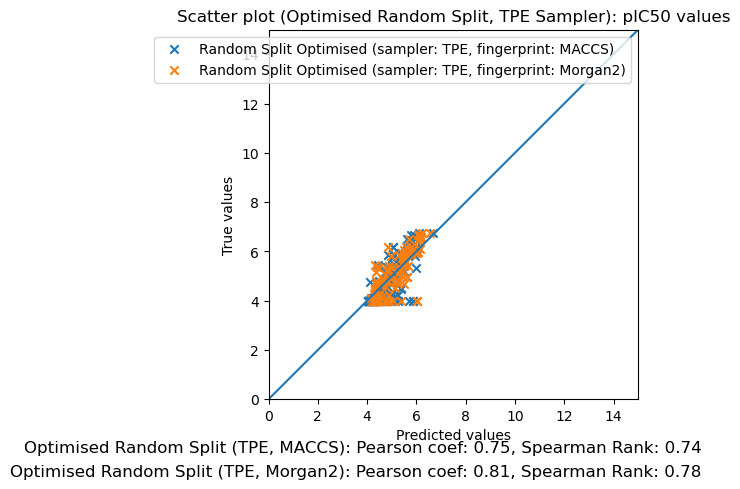

In [41]:
# Scatter plot
limits = 0, 15
fig, ax = plt.subplots()
ax.scatter(y_pred_rfr_rand_best_TPE_MACCS, y_test_rand, marker="x", label="Random Split Optimised (sampler: TPE, fingerprint: MACCS)")
ax.scatter(y_pred_rfr_rand_best_TPE_m2, y_test_rand_m2, marker="x", label="Random Split Optimised (sampler: TPE, fingerprint: Morgan2)")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot (Optimised Random Split, TPE Sampler): pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)

pearsoncoef_rfr_rand_best_TPE_MACCS = np.corrcoef(y_pred_rfr_rand_best_TPE_MACCS.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand_best_TPE_MACCS = spearmanr(y_pred_rfr_rand_best_TPE_MACCS.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand_best_TPE_m2 = np.corrcoef(y_pred_rfr_rand_best_TPE_m2.flatten(), y_test_rand_m2.values.flatten())[0,1]
spearmancoef_rfr_rand_best_TPE_m2 = spearmanr(y_pred_rfr_rand_best_TPE_m2.flatten(), y_test_rand_m2.values.flatten()).correlation
fig.text(0.9, 0, f"Optimised Random Split (TPE, MACCS): Pearson coef: {pearsoncoef_rfr_rand_best_TPE_MACCS:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best_TPE_MACCS:.2f}", horizontalalignment='right', fontsize=12)
fig.text(0.9, -0.05, f"Optimised Random Split (TPE, Morgan2): Pearson coef: {pearsoncoef_rfr_rand_best_TPE_m2:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best_TPE_m2:.2f}", horizontalalignment='right', fontsize=12)

fig.savefig(DATA / "scatter_plot_rfr_TPE_rand.png")
ax.legend()
plt.show();

### Table comparing Maccs and Morgan2, with the best parameters we have found ###

In [40]:
# Create a table comparing MAE, MSE, and R2 for MACCS and Morgan2 fingerprints after TPE fine-tuning
best_maccs_vs_morgan = {'Fingerprint': ['MACCS', 'Morgan2'],
                         'MAE': [mae_rfr_rand_best_TPE_MACCS, mae_rfr_rand_best_TPE_m2],
                         'MSE': [mse_rfr_rand_best_TPE_MACCS, mse_rfr_rand_best_TPE_m2],
                         'R2': [r2_rfr_rand_best_TPE_MACCS, r2_rfr_rand_best_TPE_m2]}

best_maccs_vs_morgan_df = pd.DataFrame(best_maccs_vs_morgan)
best_maccs_vs_morgan_df.set_index("Fingerprint", inplace=True)

# Round the values to 3 significant figures
best_maccs_vs_morgan_df = best_maccs_vs_morgan_df.applymap(lambda x: round(x, 3))
best_maccs_vs_morgan_df.to_csv(DATA / "best_maccs_vs_morgan_df.csv")
best_maccs_vs_morgan_df

,MAE,MSE,R2
Fingerprint,,,
MACCS,0.424,0.326,0.557
Morgan2,0.377,0.264,0.641


So after parameter fine-tuning we are actually gettinmg worse results from morgan2 than MACCS

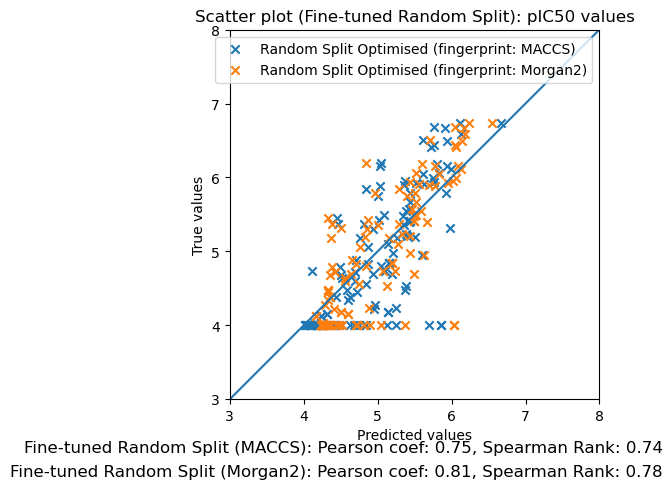

In [44]:
# Scatter plot
limits = 3, 8
fig, ax = plt.subplots()
ax.scatter(y_pred_rfr_rand_best_TPE_MACCS, y_test_rand, marker="x", label="Random Split Optimised (fingerprint: MACCS)")
ax.scatter(y_pred_rfr_rand_best_TPE_m2, y_test_rand_m2, marker="x", label="Random Split Optimised (fingerprint: Morgan2)")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot (Fine-tuned Random Split): pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)

pearsoncoef_rfr_rand_best_TPE_MACCS = np.corrcoef(y_pred_rfr_rand_best_TPE_MACCS.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand_best_TPE_MACCS = spearmanr(y_pred_rfr_rand_best_TPE_MACCS.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand_best_TPE_m2 = np.corrcoef(y_pred_rfr_rand_best_TPE_m2.flatten(), y_test_rand_m2.values.flatten())[0,1]
spearmancoef_rfr_rand_best_TPE_m2 = spearmanr(y_pred_rfr_rand_best_TPE_m2.flatten(), y_test_rand_m2.values.flatten()).correlation
fig.text(0.9, 0, f"Fine-tuned Random Split (MACCS): Pearson coef: {pearsoncoef_rfr_rand_best_TPE_MACCS:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best_TPE_MACCS:.2f}", horizontalalignment='right', fontsize=12)
fig.text(0.9, -0.05, f"Fine-tuned Random Split (Morgan2): Pearson coef: {pearsoncoef_rfr_rand_best_TPE_m2:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best_TPE_m2:.2f}", horizontalalignment='right', fontsize=12)

fig.savefig(DATA / "best_maccs_vs_morgan2_scatter.png")
ax.legend()
plt.show();